In [4]:
import ipyparallel as ipp
c = ipp.Client()
c.ids

[0, 1, 2, 3]

In [5]:
%px %matplotlib inline

In [6]:
%%px

import matplotlib.pyplot as plt
import numpy as np
from mpi4py import MPI

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

print('Rank {}/{} is alive.'.format(rank, size))

from IPython.display import display, clear_output
import gc
import sys

print("Python executable:", sys.executable)
print("Python version:", sys.version)
import matplotlib
import matplotlib.pyplot as plt

print(matplotlib.__version__)
import math

import numpy as np

[stdout:2] Rank 2/4 is alive.
Python executable: /usr/bin/python3
Python version: 3.11.2 (main, Nov 30 2024, 21:22:50) [GCC 12.2.0]
3.10.0


[stdout:0] Rank 0/4 is alive.
Python executable: /usr/bin/python3
Python version: 3.11.2 (main, Nov 30 2024, 21:22:50) [GCC 12.2.0]
3.10.0


[stdout:1] Rank 1/4 is alive.
Python executable: /usr/bin/python3
Python version: 3.11.2 (main, Nov 30 2024, 21:22:50) [GCC 12.2.0]
3.10.0


[stdout:3] Rank 3/4 is alive.
Python executable: /usr/bin/python3
Python version: 3.11.2 (main, Nov 30 2024, 21:22:50) [GCC 12.2.0]
3.10.0


In [7]:
%%px

TOTAL_TIME = 0.1
VERBOSE1=True
VERBOSE2=False

Cs=math.sqrt(1/3)
D=1e-3 #m
L=1 #m

D_nd=50 #100

Yn=D_nd #+1
Xn=200 #int(Yn*L/D)

if(VERBOSE1): print("Ny: {0}".format(Yn))
if(VERBOSE1): print("Nx: {0}".format(Xn))

dx=D/D_nd #old->5*10**(-5)
dy = dx
if(VERBOSE1): print("dx: {0}".format(dx))
#relaxation time tau, should be > 0,5
tau=0.6

dP=1e-2 #Pa
rho_0=1e3 #kg/m^3
p_in=1/3
p_out=p_in-dP
roh_in=p_in/Cs**2
roh_out=p_out/Cs**2
dRho=dP/Cs**2


if(VERBOSE1): 
    print("p_in: {0}".format(p_in))
    print("p_out: {0}".format(p_out))
    print("roh_in: {0}".format(roh_in))
    print("roh_out: {0}".format(roh_out))

nu=2.9e-6 #m^2/s 
dt=Cs**2*(tau-0.5)*(dx**2/nu)

nu_ = Cs**2*(tau-0.5)*(dx**2) * dx
dt_=Cs**2*(tau-0.5)*(dx**2/nu_)

Cs_ = math.sqrt(1/3*(dx**2/dt**2))
if(VERBOSE1): print("dt: {0}".format(dt))

#Poiseuille centerline (max) velocity
U=1/8*(rho_0/nu)*(dP/L)*(D**2)
#U=1.25

Re=D*U/nu
Ma=U/Cs 
Kn=U*D/nu
if(VERBOSE1): 
    print("U: {0}".format(U))
    print("Re: {0}".format(Re))
    print("Ma: {0}".format(Ma))
    print("Kn: {0}".format(Kn))

#we need Cl, Croh, Ct

# 1. Conversion factor Cl for length
Cl=dx #freely chosen
dx_nd=dx/Cl
if(VERBOSE1): 
    print("Cl: {0}".format(Cl))
    print("dx_nd: {0}".format(dx_nd))

#2. Conversion factor Croh for density
Croh=rho_0
roh_nd = rho_0/Croh
if(VERBOSE1): 
    print("Croh: {0}".format(Croh))
    print("roh_nd: {0}".format(roh_nd))

#3. Conversion factor Ct for time
Ct=dt
dt_nd = dt/Ct
if(VERBOSE1): 
    print("Ct: {0}".format(Ct))
    print("dt_nd: {0}".format(dt_nd))

#4. Conversion factor Cu for velocity
Cu=Cl/Ct
U_nd = U/Cu #-> limit U_nd=0.1
U_nd=0.1

if(VERBOSE1): 
    print("Cu: {0}".format(Cu))
    print("U_nd: {0}".format(U_nd))

#5. Conversion factor CF for Force
CF=Croh*Cl**4*Ct**(-2)
if(VERBOSE1): print("CF: {0}".format(CF))

#6. Conversion factor Cf for frequency
Cf=1/Ct
if(VERBOSE1): print("Cf: {0}".format(Cf))

#change nu_nd in order to achieve U_nd=0,1
nu_nd=((D_nd*U_nd)/(D*U))*nu
if(VERBOSE1): print("nu_nd: {0}".format(nu_nd))

tau_nd=(nu_nd/Cs**2)+1./2
if(VERBOSE1): print("tau_nd: {0}".format(tau_nd))
omega = dt/tau
if(VERBOSE1): print("omega: {0}".format(omega))
omega_nd = dt_nd/tau_nd
if(VERBOSE1): print("omega_nd: {0}".format(omega_nd))

[stdout:3] Ny: 50
Nx: 200
dx: 2e-05
p_in: 0.3333333333333333
p_out: 0.3233333333333333
roh_in: 1.0
roh_out: 0.97
dt: 4.597701149425287e-06
U: 0.43103448275862066
Re: 148.63258026159332
Ma: 0.7465736239521022
Kn: 148.63258026159332
Cl: 2e-05
dx_nd: 1.0
Croh: 1000.0
roh_nd: 1.0
Ct: 4.597701149425287e-06
dt_nd: 1.0
Cu: 4.350000000000001
U_nd: 0.1
CF: 7.569000000000005e-06
Cf: 217500.00000000003
nu_nd: 0.03364
tau_nd: 0.60092
omega: 7.662835249042145e-06
omega_nd: 1.6641150236304334


[stdout:2] Ny: 50
Nx: 200
dx: 2e-05
p_in: 0.3333333333333333
p_out: 0.3233333333333333
roh_in: 1.0
roh_out: 0.97
dt: 4.597701149425287e-06
U: 0.43103448275862066
Re: 148.63258026159332
Ma: 0.7465736239521022
Kn: 148.63258026159332
Cl: 2e-05
dx_nd: 1.0
Croh: 1000.0
roh_nd: 1.0
Ct: 4.597701149425287e-06
dt_nd: 1.0
Cu: 4.350000000000001
U_nd: 0.1
CF: 7.569000000000005e-06
Cf: 217500.00000000003
nu_nd: 0.03364
tau_nd: 0.60092
omega: 7.662835249042145e-06
omega_nd: 1.6641150236304334


[stdout:0] Ny: 50
Nx: 200
dx: 2e-05
p_in: 0.3333333333333333
p_out: 0.3233333333333333
roh_in: 1.0
roh_out: 0.97
dt: 4.597701149425287e-06
U: 0.43103448275862066
Re: 148.63258026159332
Ma: 0.7465736239521022
Kn: 148.63258026159332
Cl: 2e-05
dx_nd: 1.0
Croh: 1000.0
roh_nd: 1.0
Ct: 4.597701149425287e-06
dt_nd: 1.0
Cu: 4.350000000000001
U_nd: 0.1
CF: 7.569000000000005e-06
Cf: 217500.00000000003
nu_nd: 0.03364
tau_nd: 0.60092
omega: 7.662835249042145e-06
omega_nd: 1.6641150236304334


[stdout:1] Ny: 50
Nx: 200
dx: 2e-05
p_in: 0.3333333333333333
p_out: 0.3233333333333333
roh_in: 1.0
roh_out: 0.97
dt: 4.597701149425287e-06
U: 0.43103448275862066
Re: 148.63258026159332
Ma: 0.7465736239521022
Kn: 148.63258026159332
Cl: 2e-05
dx_nd: 1.0
Croh: 1000.0
roh_nd: 1.0
Ct: 4.597701149425287e-06
dt_nd: 1.0
Cu: 4.350000000000001
U_nd: 0.1
CF: 7.569000000000005e-06
Cf: 217500.00000000003
nu_nd: 0.03364
tau_nd: 0.60092
omega: 7.662835249042145e-06
omega_nd: 1.6641150236304334


In [8]:
%%px

iteration = 0

columns_to_select = [1, 2, 3, 10, 20, 50, Xn-1]
_roh_at_points_top = []
_roh_at_points_mid = []
_roh_at_points_bottom = []

#discrete velocity channels for D2Q9
discrete_velocities = np.array([[0, 0],     # i=0
                      [1, 0],               # i=1
                      [0, 1],               # i=2
                      [-1, 0],              # i=3
                      [0, -1],              # i=4
                      [1, 1],               # i=5
                      [-1, 1],              # i=6
                      [-1, -1],             # i=7
                      [1, -1]])             # i=8

if(VERBOSE1): print("Discrete velocities: {0}".format(discrete_velocities))
channel_indices = [0,1,2,3,4,5,6,7,8] #channel
antichannel_indices =[0,3,4,1,2,7,8,5,6] #anti-channel
index_mapping_top = np.array([False, False, True, False, False, True, True, False, False])
index_mapping_bottom = np.array([False, False, False, False, True, False, False, True, True])

#weights
weights = np.array([4/9,1/9,1/9,1/9,1/9,1/36,1/36,1/36,1/36])
if(VERBOSE1): print("Weights: {0}".format(weights))

[stdout:0] Discrete velocities: [[ 0  0]
 [ 1  0]
 [ 0  1]
 [-1  0]
 [ 0 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [ 1 -1]]
Weights: [0.44444444 0.11111111 0.11111111 0.11111111 0.11111111 0.02777778
 0.02777778 0.02777778 0.02777778]


[stdout:1] Discrete velocities: [[ 0  0]
 [ 1  0]
 [ 0  1]
 [-1  0]
 [ 0 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [ 1 -1]]
Weights: [0.44444444 0.11111111 0.11111111 0.11111111 0.11111111 0.02777778
 0.02777778 0.02777778 0.02777778]


[stdout:2] Discrete velocities: [[ 0  0]
 [ 1  0]
 [ 0  1]
 [-1  0]
 [ 0 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [ 1 -1]]
Weights: [0.44444444 0.11111111 0.11111111 0.11111111 0.11111111 0.02777778
 0.02777778 0.02777778 0.02777778]


[stdout:3] Discrete velocities: [[ 0  0]
 [ 1  0]
 [ 0  1]
 [-1  0]
 [ 0 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]
 [ 1 -1]]
Weights: [0.44444444 0.11111111 0.11111111 0.11111111 0.11111111 0.02777778
 0.02777778 0.02777778 0.02777778]


In [9]:
%%px

#equilibrium distribution function feq(0->8)
def f_eq_2D(_rho, _u_ckl):
    global discrete_velocities, weights
    
    _u_ckl_dot = np.dot(discrete_velocities, _u_ckl) 
    _u_ckl_product = np.einsum('ki,ki->i', _u_ckl, _u_ckl)

    _u_ckl_product_reshaped = _u_ckl_product.reshape(1, *(_u_ckl_product.shape))
    _ones = np.ones(_u_ckl_dot.shape)

    _rho_reshaped = _rho.reshape(1, *(_rho.shape))
    weights_reshaped = weights.reshape((9, 1)) * np.ones(_rho.shape)
    factors = weights_reshaped * _rho_reshaped

    f_eq = factors * (
        #_ones + 3. * _u_ckl_dot / Cs**2 + (9. / 2.) * _u_ckl_dot**2 / Cs**4 - (3. / 2.) * _u_ckl_product_reshaped / Cs**2
        _ones + _u_ckl_dot / Cs**2 + (1/2.) * _u_ckl_dot**2 / Cs**4 - (1/2.) * _u_ckl_product_reshaped / Cs**2
    )

    del _u_ckl_dot
    del _u_ckl_product
    del _u_ckl_product_reshaped
    del _ones
    del _rho_reshaped
    del weights_reshaped
    del factors
    gc.collect()

    return f_eq


def f_eq_3D(_rho, _u_ckl):
    global discrete_velocities, weights

    _u_ckl_dot = np.einsum('hk,kij->hij', discrete_velocities, _u_ckl) #(9,2) * (2,101,101002)
    _u_ckl_product = np.einsum('kij,kij->ij', _u_ckl, _u_ckl)
    _u_ckl_product_reshaped = _u_ckl_product.reshape(1, *(_u_ckl_product.shape))
    _ones = np.ones(_u_ckl_dot.shape)

    _rho_reshaped = _rho.reshape(1, *(_rho.shape))
    weights_reshaped = weights.reshape((9, 1, 1)) * np.ones(_rho.shape)
    factors = weights_reshaped * _rho_reshaped

    #Part_2_BTE_to_LBM, BTE3
    #feq = factors * (
    #    _ones + 3. * _u_ckl_dot / Cs**2 + (9. / 2.) * _u_ckl_dot**2 / Cs**4 - (3. / 2.) * _u_ckl_product_reshaped / Cs**2
    #)

    #BGK formula, Kruger pp67
    f_eq = factors * (
        _ones + _u_ckl_dot / Cs**2 + (1/2.) * _u_ckl_dot**2 / Cs**4 - (1/2.) * _u_ckl_product_reshaped / Cs**2
    )

    del _u_ckl_dot
    del _u_ckl_product
    del _u_ckl_product_reshaped
    del _ones
    del _rho_reshaped
    del weights_reshaped
    del factors
    gc.collect()

    return f_eq


#roll the lattice based on the discrete velocities
def streamLattice(_ltc):
    global discrete_velocities, weights

    #Send to the right, receive from the left
    _sendbuf = np.ascontiguousarray(_ltc[:, -2:-1, :].copy(), dtype=np.float32)
    _recvbuf = np.ascontiguousarray(_ltc[:, 0:1, :].copy(), dtype=np.float32)              
    comm.Sendrecv(_sendbuf, (rank+1)%size, recvbuf=_recvbuf, source=(rank-1)%size)
    
    #Send to the left, receive from the right
    _sendbuf = np.ascontiguousarray(_ltc[:, 1:2, :].copy(), dtype=np.float32)
    _recvbuf = np.ascontiguousarray(_ltc[:, -1:, :].copy(), dtype=np.float32)    
    comm.Sendrecv(_sendbuf, (rank-1)%size, recvbuf=_recvbuf, source=(rank+1)%size)

    
    tmpLtc = [np.roll(np.roll(_ltc[direction, :, :], shift=dx, axis=0), shift=dy, axis=1) for direction, (dx, dy) in enumerate(discrete_velocities)]
    shifted_lattice = np.stack(tmpLtc, axis=0)         

    
    del tmpLtc
    del _sendbuf
    del _recvbuf
    gc.collect()
    
    return shifted_lattice


#update the first 2 moments (density, current density, _u_ckl)
def updateMoments(_ltc):
    global discrete_velocities, weights
    
    # density:
    _roh = np.sum(_ltc, axis=0)

    # current density:
    _current_density =  np.einsum('ki,ijl->kjl', discrete_velocities.T, _ltc)

    # average velocity:
    _u_ckl = _current_density / _roh

    del _current_density
    gc.collect()    

    return _roh, _u_ckl


channel_indices = [0,1,2,3,4,5,6,7,8] #channel
antichannel_indices =[0,3,4,1,2,7,8,5,6] #anti-channel
index_mapping_top = np.array([False, False, True, False, False, True, True, False, False])
index_mapping_bottom = np.array([False, False, False, False, True, False, False, True, True])    


#apply bounce-back conditions on upper and lower boundaries of pipe
def bounceBackTopBottom0(_ltc, _ltc_pre, _index_mapping_top, _index_mapping_bottom):
    global channel_indices, antichannel_indices
    
    # row indices for top and bottom boundaries
    top_boundary = Yn
    bottom_boundary = 1

    _ltc_pre = _ltc.copy()

    # swaps on the top boundary
    for i, swap_needed in enumerate(_index_mapping_top):
        if swap_needed:
            _ltc[channel_indices[i], :, top_boundary] = _ltc_pre[antichannel_indices[i], :, top_boundary]
    
    # swaps on the bottom boundary
    for i, swap_needed in enumerate(_index_mapping_bottom):
        if swap_needed:
            _ltc[channel_indices[i], :, bottom_boundary] = _ltc_pre[antichannel_indices[i], :, bottom_boundary]

    return _ltc


def bounceBackTopBottom1(f, nx, ny):
    '''Performs the bounce back step
    
    Arguements
    -----------
    f: np.array (nx, ny, 9)
        probability density function
    nx: int
        number of grid points in x direction
    ny: int
        number of grid points in y direction
    
    Returns
    ---------
    f: np.array (nx, ny, 9)
        probability density function after the bounce back step
    '''
    top_boundary = ny
    bottom_boundary = 1
     
    # rigid lower wall 
    f[2, 1, 1 : nx + 1] = f[4, 0, 1 : nx + 1]
    f[5, 1, 1 : nx + 1] = np.roll(f[7, 0, 1 : nx + 1], 1)
    f[6, 1, 1 : nx + 1] = np.roll(f[8, 0, 1 : nx + 1], -1)
    
    # rigid upper wall
    f[4, ny, 1 : nx + 1] = f[2, ny + 1, 1 : nx + 1]
    f[7, ny, 1 : nx + 1] = np.roll(f[5, ny + 1, 1 : nx + 1], -1)
    f[8, ny, 1 : nx + 1] = np.roll(f[6, ny + 1, 1 : nx + 1], 1)

    return f    


#calulate boundary nodes X(0) and X(N+1) for periodic BC with presssure difference
def calcPeriodicBC(_roh_N, _u_cNl, _roh_in, _roh_1, _u_c1l, _roh_out, _ltc_prestream): 

    fi_x = None

    if rank == (size-1):    
        f_eq_in = f_eq_2D(_roh_in, _u_cNl)
        #fi_xN_prestream = _ltc_prestream[:,Xn,:]
        fi_xN_prestream = _ltc_prestream[:,-2,:]
        fi_eq_N = f_eq_2D(_roh_N, _u_cNl)
        fi_x0 = f_eq_in + (fi_xN_prestream - fi_eq_N)
        fi_x = fi_x0

        del f_eq_in
        del fi_xN_prestream
        del fi_eq_N
        gc.collect()

    if rank == 0:    
        f_eq_out = f_eq_2D(_roh_out, _u_c1l)
        fi_x0_prestream = _ltc_prestream[:,1,:]
        fi_eq_1 = f_eq_2D(_roh_1, _u_c1l)
        fi_xNplus1 = f_eq_out + (fi_x0_prestream - fi_eq_1) 
        fi_x = fi_xNplus1        
    
        del f_eq_out
        del fi_x0_prestream
        del fi_eq_1
        gc.collect()

    return fi_x #fi_x0, fi_xNplus1


#2D Poiseuille inlet velocity u(y) for comparison with numerical result
def Poiseuille2DUy(y):
    u_poiseuille = np.zeros((2), dtype=float)
    u_y = U * (1 - ((y - D/2)/(D/2))**2)
    u_poiseuille[0] = u_y
    u_poiseuille[1] = 0

    return u_poiseuille   


def Poiseuille2DUy2(y, U, D):
    """
    Returns the velocity profile for Poiseuille flow in a pipe.
    :param y: Array of radial distances (y values).
    :param U: Maximum velocity at the center of the pipe.
    :param D: Diameter of the pipe.
    :return: Velocity profile at each y position.
    """
    R = D / 2  # Pipe radius
    u_poiseuille = U * (1 - (y / R) ** 2)
    return u_poiseuille  


def get_adjusted_velocity_y_values4Poiseuille2D(num_nodes1, D):
    # Define the spacing factor for this array as well
    delta = D / (num_nodes1 - 1)
    R = D / 2.0
    
    # Initialize the velocity_y_values array with proper non-uniform spacing
    velocity_y_values4Poiseuille2D = np.zeros(num_nodes1)
    
    # Middle points
    velocity_y_values4Poiseuille2D = np.linspace(-R, R, num_nodes1)
    
    return velocity_y_values4Poiseuille2D   


def collect(iteration, __pdf, _u_ckl):
    VERBOSE = False

    if VERBOSE:
        print(f"collect") 

    __pdf = np.ascontiguousarray(__pdf)    
    __u_ckl = np.ascontiguousarray(_u_ckl)    
    
    _pdf_full_range = np.zeros((9, Xn, Yn+2), dtype=np.float32)
    _pdf_full_range = np.ascontiguousarray(_pdf_full_range, dtype=np.float32)

    _u_ckl_full_range = np.zeros((2, Xn, Yn+2), dtype=np.float32)
    _u_ckl_full_range = np.ascontiguousarray(_u_ckl_full_range, dtype=np.float32)

    _sendBuf_pdf = np.ascontiguousarray(__pdf[:, 1:-1, :].copy(), dtype=np.float32)
    _sendBuf_u_ckl = np.ascontiguousarray(_u_ckl[:, 1:-1, :].copy(), dtype=np.float32)
    
    if VERBOSE:
        print(f"Rank {rank}: __pdf.shape={__pdf.shape}, __pdf.size={__pdf.nbytes} bytes")        
        print(f"Rank {rank}: _sendBuf_pdf.shape={_sendBuf_pdf.shape}, _sendBuf_pdf.size={_sendBuf_pdf.nbytes} bytes")       
        print(f"Rank {rank}: _pdf_full_range.shape={_pdf_full_range.shape}, _pdf_full_range.size={_pdf_full_range.nbytes} bytes")

        print(f"Rank {rank}: __u_ckl.shape={__u_ckl.shape}, __u_ckl.size={__u_ckl.nbytes} bytes")        
        print(f"Rank {rank}: _sendBuf_u_ckl.shape={_sendBuf_u_ckl.shape}, _sendBuf_u_ckl.size={_sendBuf_u_ckl.nbytes} bytes")       
        print(f"Rank {rank}: _u_ckl_full_range.shape={_u_ckl_full_range.shape}, _pdf_full_range.size={_u_ckl_full_range.nbytes} bytes")

    # Allocate _pdf_full_range correctly
    assert _pdf_full_range.flags['C_CONTIGUOUS']  
    assert _u_ckl_full_range.flags['C_CONTIGUOUS']  
        
    comm.Gather(_sendBuf_pdf, _pdf_full_range, root=0)
    comm.Gather(_sendBuf_u_ckl, _u_ckl_full_range, root=0)   

    print(f"-------- collect {iteration} --------") 
    print(f"Rank {rank}: __pdf.shape={__pdf.shape}, __pdf.size={__pdf.nbytes} bytes") 
    print(f"Rank {rank}: _pdf_full_range.shape={_pdf_full_range.shape}, _pdf_full_range.size={_pdf_full_range.nbytes} bytes") 

    del __pdf
    del _sendBuf_pdf
    del __u_ckl
    del _sendBuf_u_ckl
    gc.collect()    

    return _pdf_full_range, _u_ckl_full_range


def updatePlots(iteration, n, scaled_x, _pdf_full_range, _u_ckl_full_range, velocity_y_values4Poiseuille2D, poiseuille_velocities_0):

    VERBOSE = False
        
    __roh = np.sum(_pdf_full_range, axis=0)
    
    # Get the specific row from the 2D array
    row = __roh[:,Yn//2]  # Select every 100th point along the x-axis
    if VERBOSE: print(row)
    num_columns = len(row)
    # If the number of columns is more than 100, select 100 evenly spaced points
    if num_columns > 100:
        # Generate 100 evenly spaced indices
        indices = np.linspace(0, num_columns - 1, Xn, dtype=int)
        if VERBOSE: 
            print("indices:")
            print(indices)
        density_y = row[indices]
        density_x = np.linspace(0, __roh.shape[0], len(density_y), dtype=int)
    else:
        # If there are fewer than 100 points, return the whole row
        density_y = row
        density_x = np.linspace(0, __roh.shape[0], len(row), dtype=int)
        

    maxRoh.append(np.max(__roh))
    iterations.append(iteration)

    if VERBOSE: 
        print(f"iterations: {iterations}")
        print(f"maxRoh: {maxRoh}")
    ax[0].cla()
    ax[0].plot(iterations, maxRoh, label="Max density per iteration", color="red")        
    ax[0].set_title("Max Density per iteration")
    ax[0].set_ylabel("Max Density")
    ax[0].set_xlabel("Iteration")

    
    # Add the Poiseuille velocity profile to ax[3]
    U = np.max(_u_ckl_full_range[0, 1, :])
    if VERBOSE: 
        print("Velocity profile inlet:")
        print("U: ")
        print(U)
    #print("velocity_y_values4Poiseuille2D: ")
    #print(velocity_y_values4Poiseuille2D)
    #poiseuille_velocities = np.array([Poiseuille2DUy2(y, U, D) for y in velocity_y_values4Poiseuille2D])  # Get velocity profile
        print("poiseuille_velocities: ")
        print(poiseuille_velocities_0)        
    ax[1].cla()  # Clear the previous plot on ax[3]
    ax[1].plot(velocity_y_values, _u_ckl_full_range[0, 1, 1:Yn+1], label="Numerical velocity profile - inlet", color="purple")
    ax[1].plot(velocity_y_values, poiseuille_velocities_0, label="Analytical Poiseuille profile - inlet", color="red", linestyle="--")
    ax[1].set_title("Velocity profile inlet")
    ax[1].set_xlabel("Node Index")
    ax[1].set_ylabel("Velocity")
    ax[1].legend()

    
    # Add the Poiseuille velocity profile to ax[4]
    U = np.max(_u_ckl_full_range[0, -1, :])
    ax[2].cla()  # Clear the previous plot on ax[3]
    ax[2].plot(velocity_y_values, _u_ckl_full_range[0, -1, 1:Yn+1], label="Numerical velocity profile - outlet", color="orange")
    ax[2].plot(velocity_y_values4Poiseuille2D, poiseuille_velocities_0, label="Analytical Poiseuille profile - outlet", color="red", linestyle="--")
    ax[2].set_title("Velocity profile outlet")
    ax[2].set_xlabel("Node Index")
    ax[2].set_ylabel("Velocity")
    ax[2].legend()


    ax[3].cla()
    X, Y = np.meshgrid(np.arange(0, Xn, 1), np.arange(0, Yn, 1))
    #X, Y = np.meshgrid(np.arange(0, Yn, 1), np.arange(0, Xn, 1))
    #im = ax[4].imshow(__roh, interpolation='nearest', origin = "upper")
    im = ax[3].imshow(__roh.T, interpolation='nearest', origin = "upper")
    ax[3].set_aspect('auto')


    del _pdf_full_range
    del _u_ckl_full_range
    gc.collect()

    # Adjust plot limits dynamically
    for i, axis in enumerate(ax):
        axis.relim()
        axis.autoscale_view()

    # Redraw the entire figure canvas to prevent blank areas
    # Ensure only Rank 0 updates the plot
    clear_output(wait=True)  # Clears previous output instead of stacking
    display(fig)  # Show the updated figure
    fig.canvas.flush_events()  # Force immediate refresh (instead of plt.pause)        

    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Adjust these values as needed

    # Pause to allow plot to update
    plt.pause(0.1)        

[stdout:0] -------- collect 0 --------
Rank 0: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 0: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 100 --------
Rank 0: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 0: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 200 --------
Rank 0: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 0: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 300 --------
Rank 0: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 0: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 400 --------
Rank 0: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 0: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 500 --------
Rank 0: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 0: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-

[stdout:3] -------- collect 0 --------
Rank 3: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 3: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 100 --------
Rank 3: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 3: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 200 --------
Rank 3: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 3: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 300 --------
Rank 3: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 3: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 400 --------
Rank 3: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 3: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 500 --------
Rank 3: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 3: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-

[stdout:2] -------- collect 0 --------
Rank 2: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 2: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 100 --------
Rank 2: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 2: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 200 --------
Rank 2: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 2: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 300 --------
Rank 2: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 2: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 400 --------
Rank 2: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 2: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 500 --------
Rank 2: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 2: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-

[stdout:1] -------- collect 0 --------
Rank 1: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 1: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 100 --------
Rank 1: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 1: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 200 --------
Rank 1: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 1: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 300 --------
Rank 1: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 1: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 400 --------
Rank 1: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 1: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-------- collect 500 --------
Rank 1: __pdf.shape=(9, 52, 52), __pdf.size=194688 bytes
Rank 1: _pdf_full_range.shape=(9, 200, 52), _pdf_full_range.size=374400 bytes
-

[output:0]

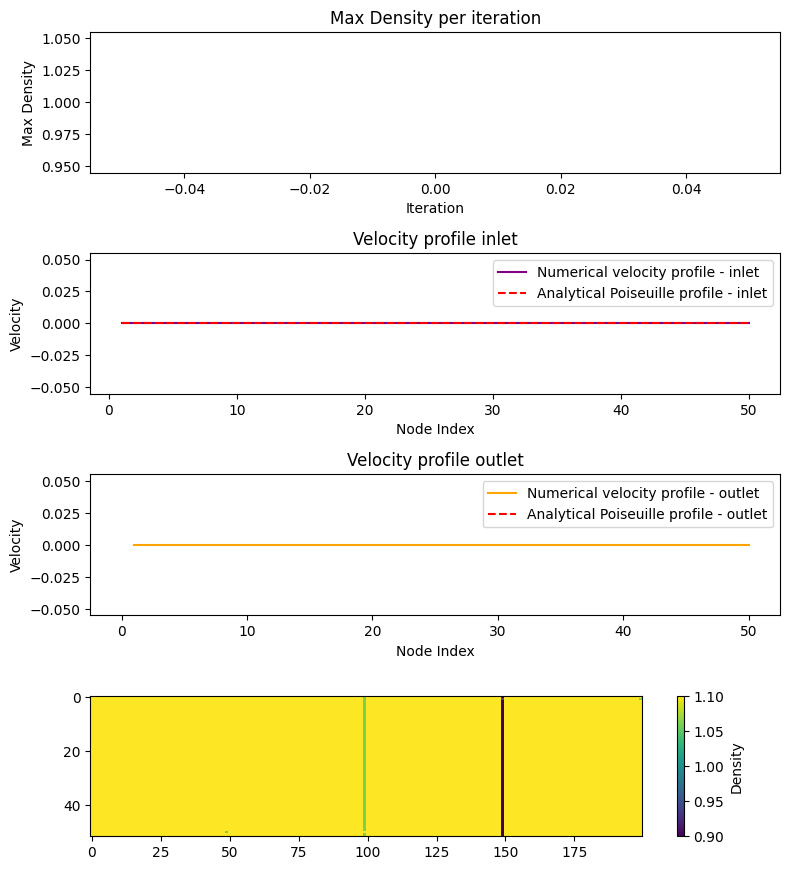

[output:0]

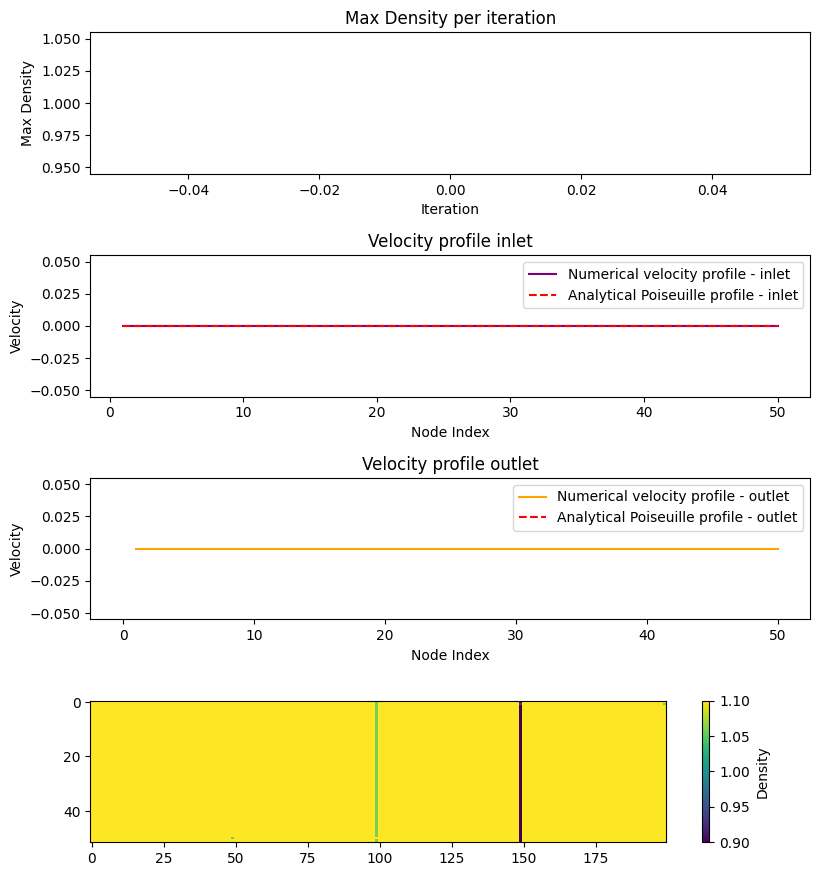

%px:   0%|          | 0/4 [00:00<?, ?tasks/s]

[output:0]

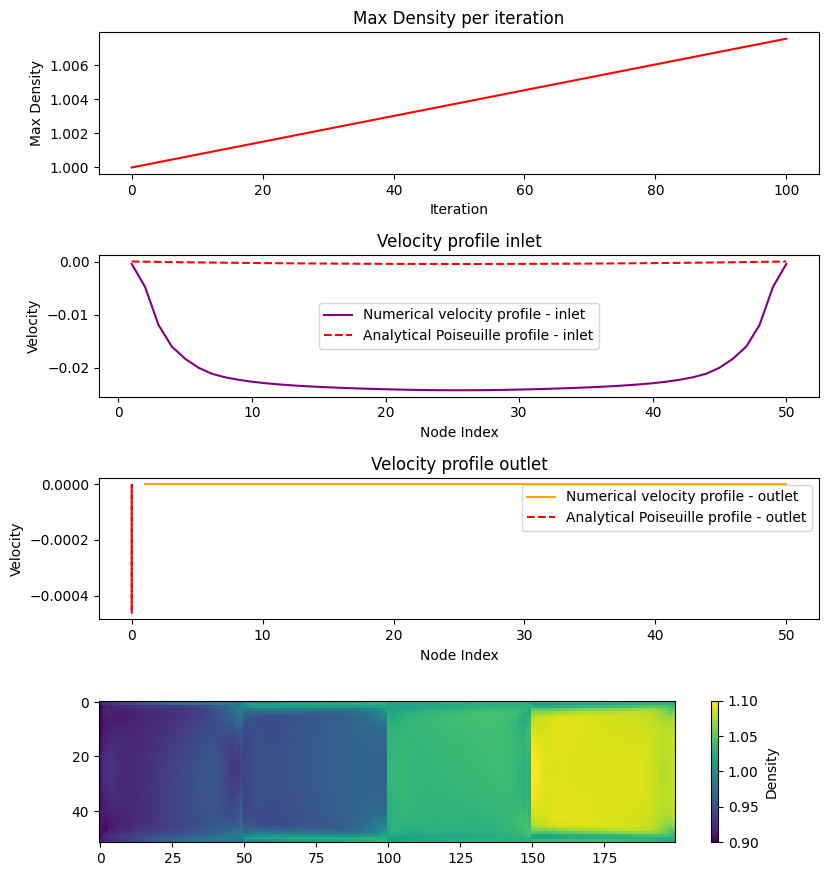

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

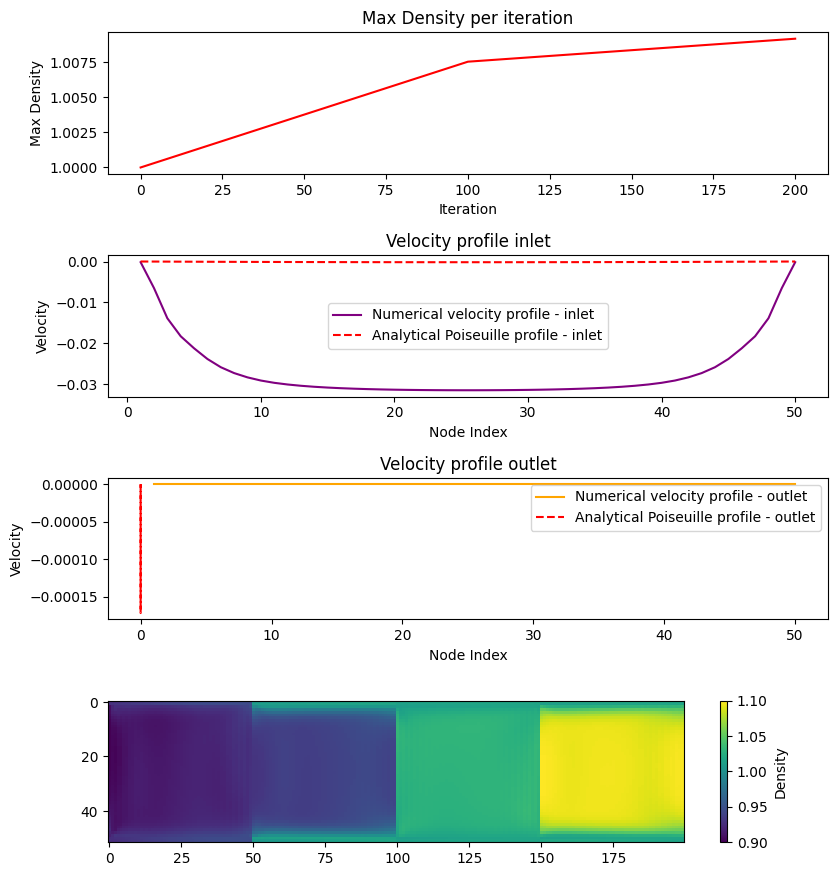

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

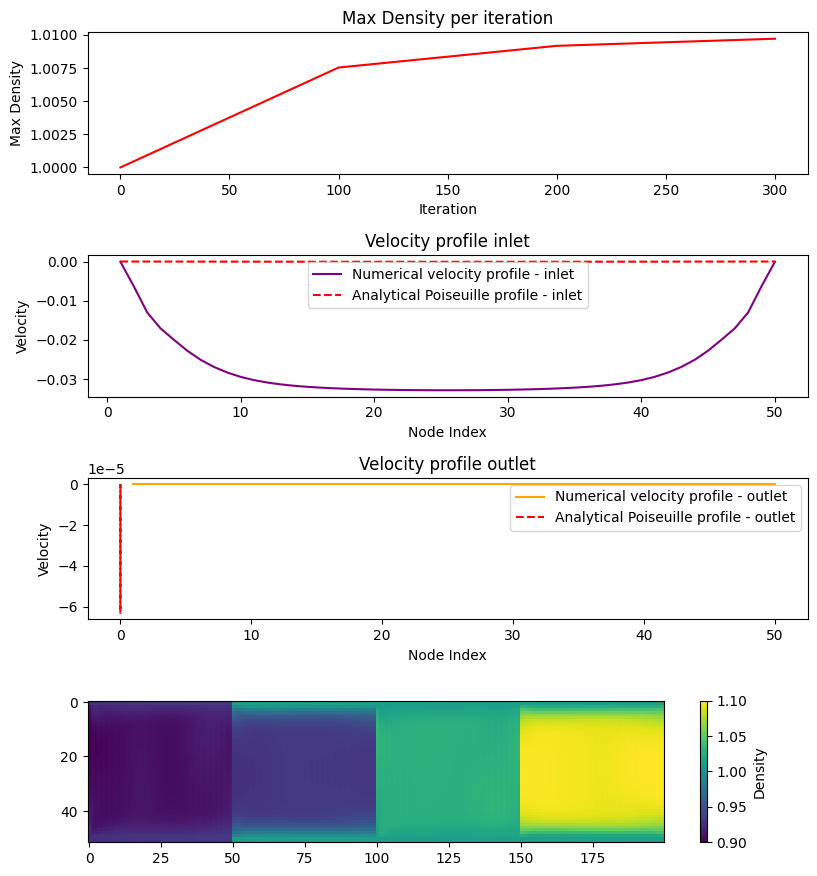

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

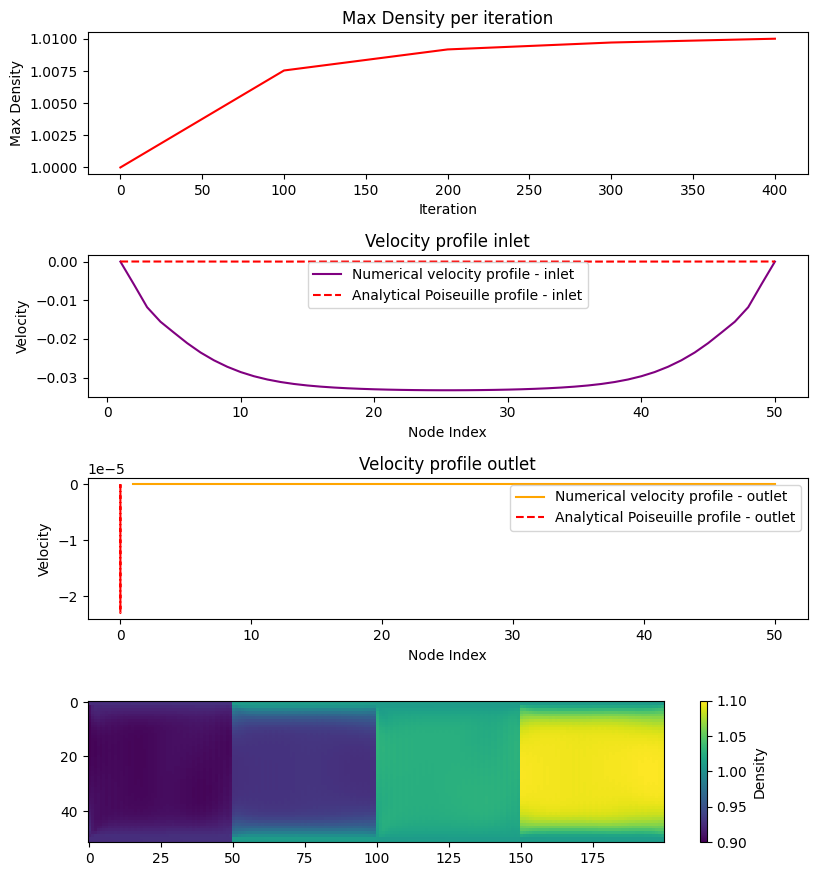

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

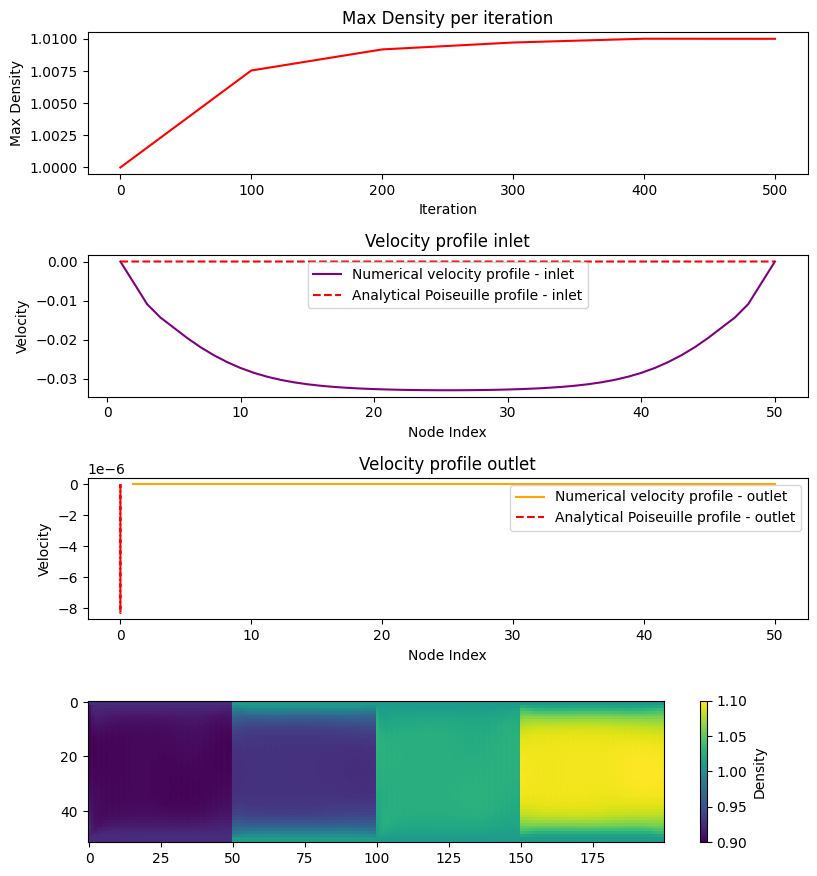

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

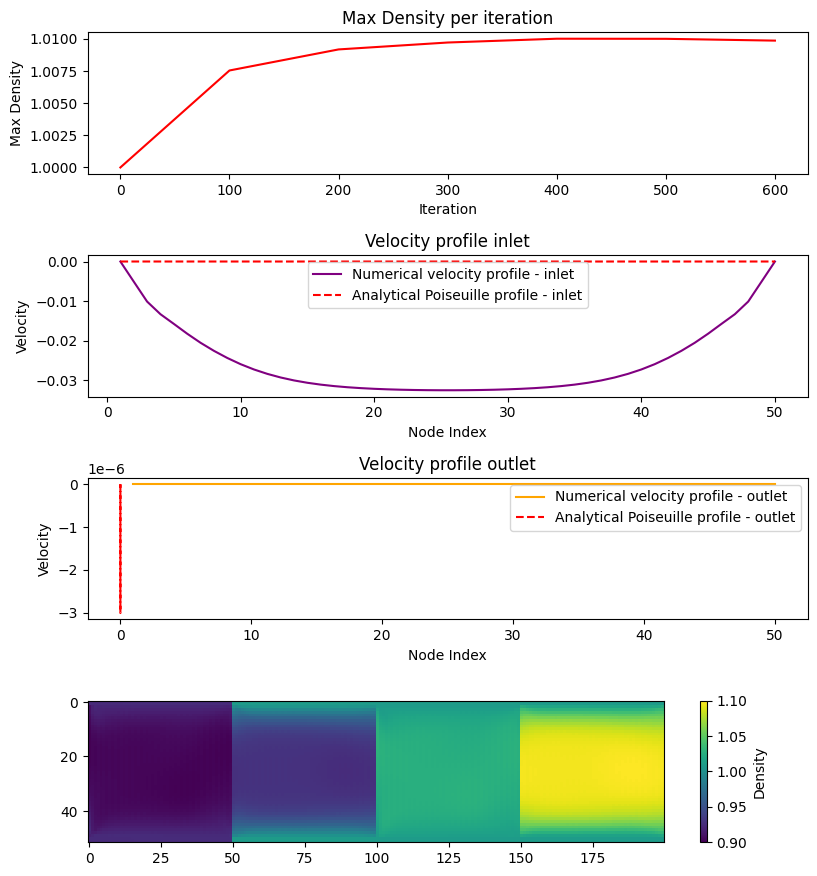

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

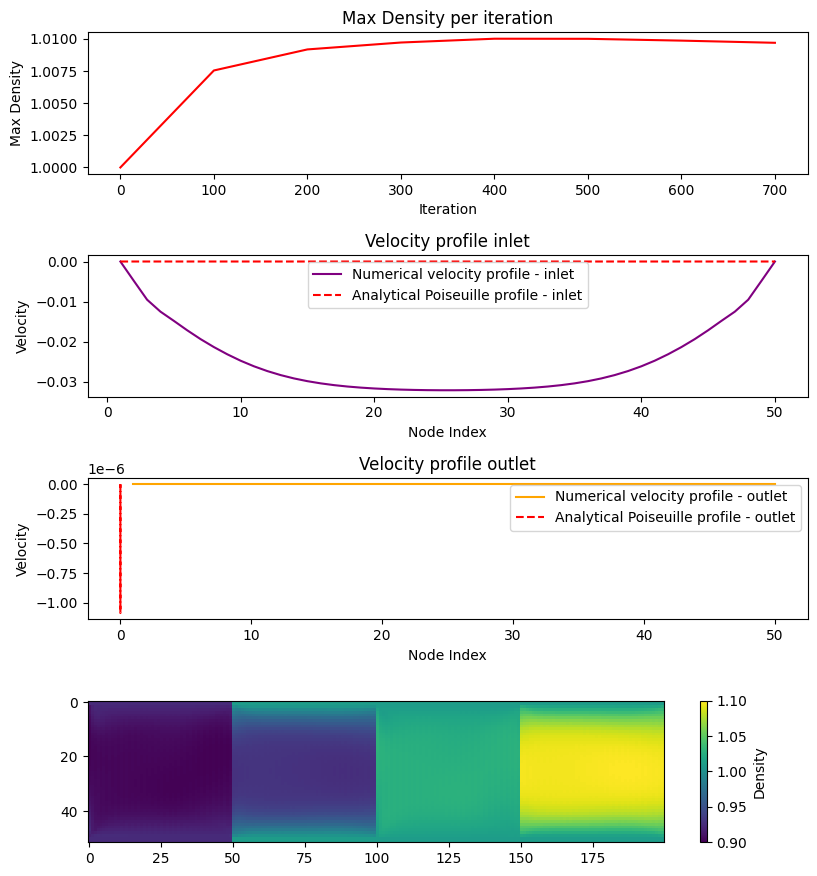

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

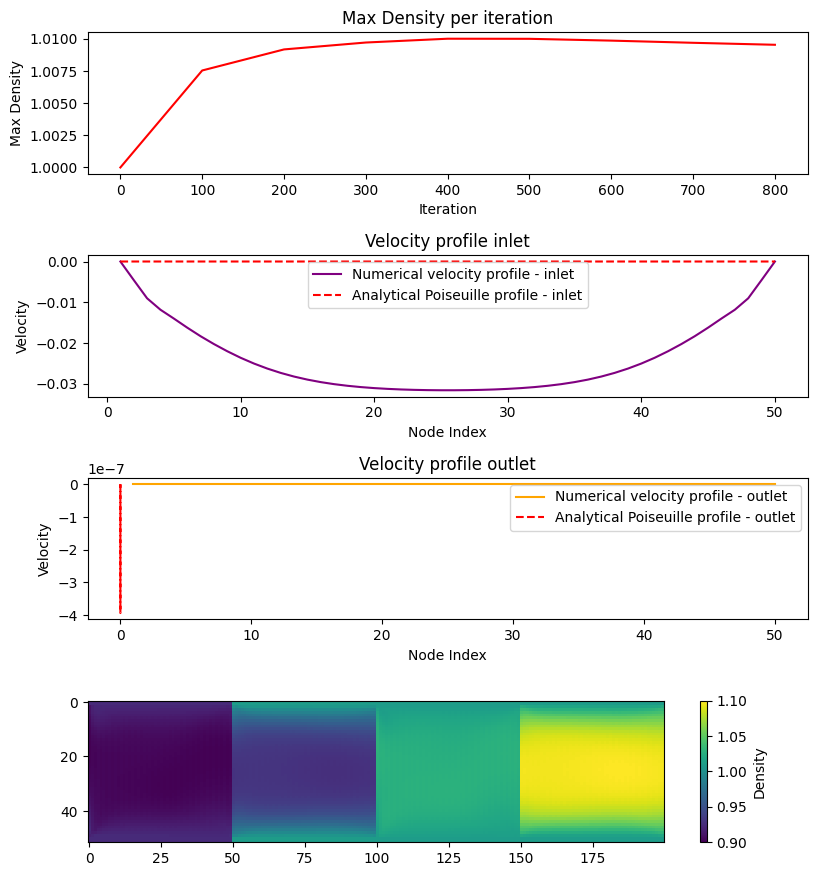

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

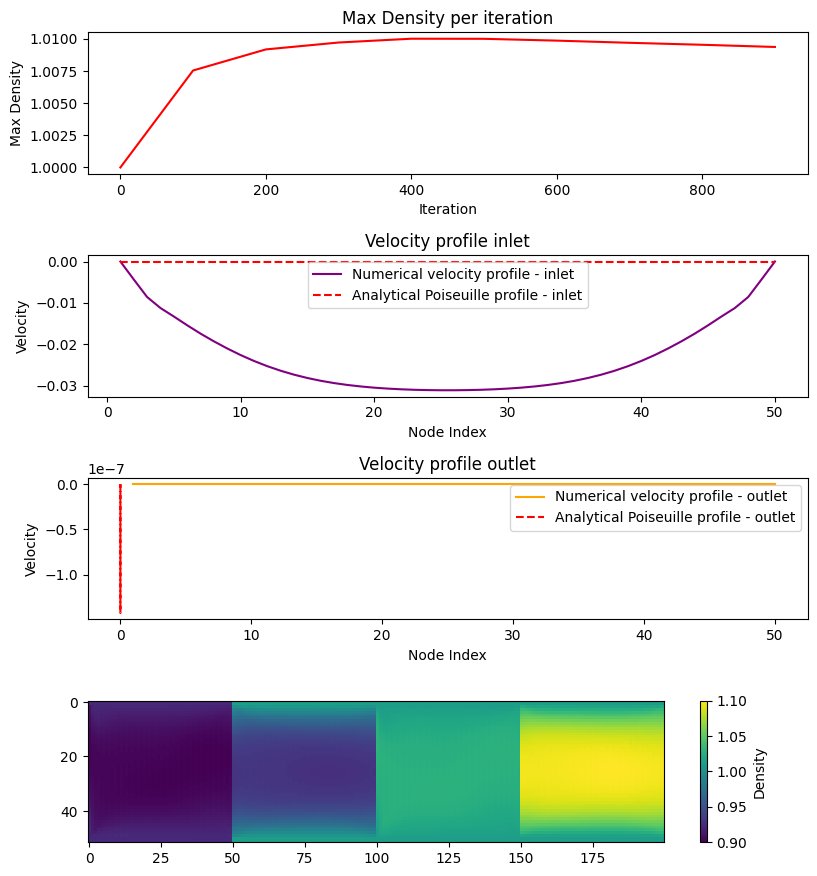

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

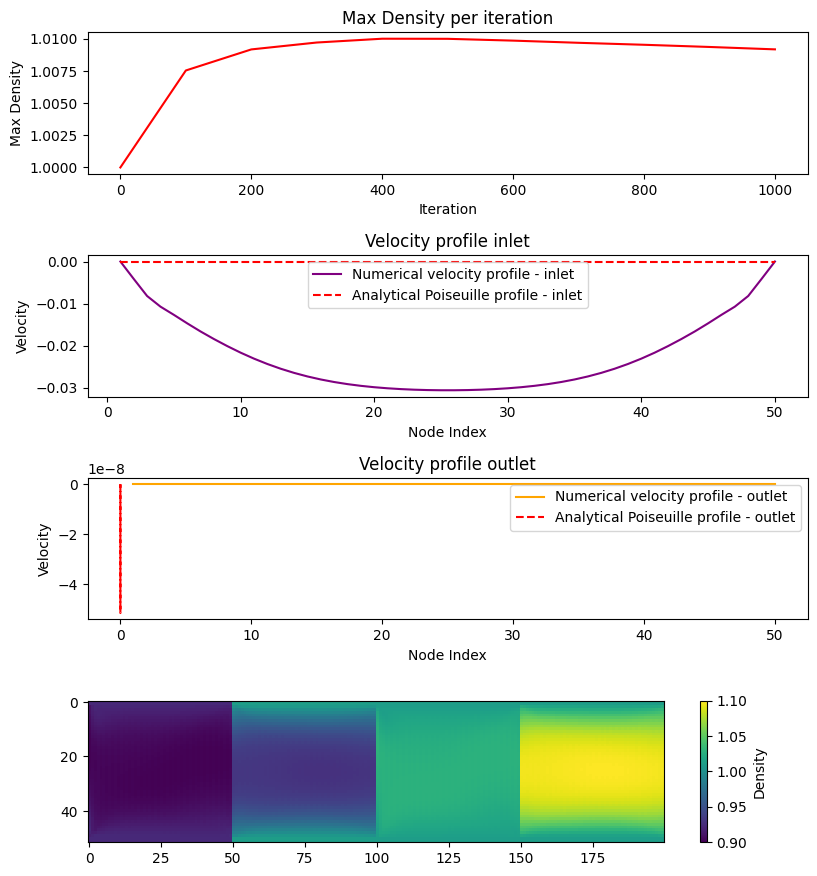

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

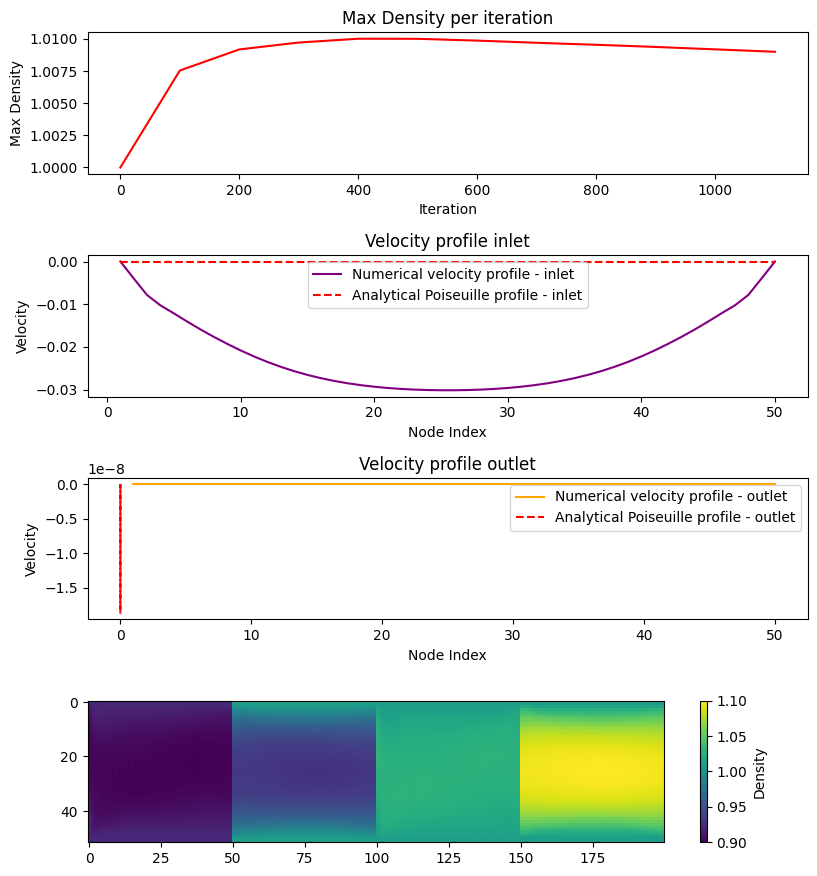

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

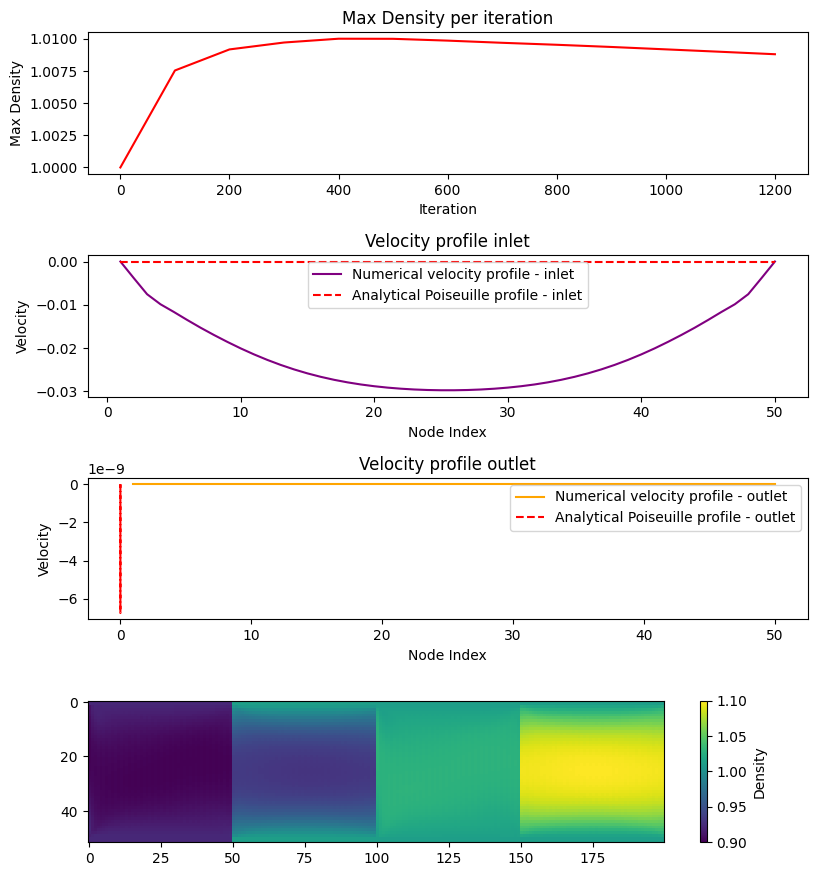

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

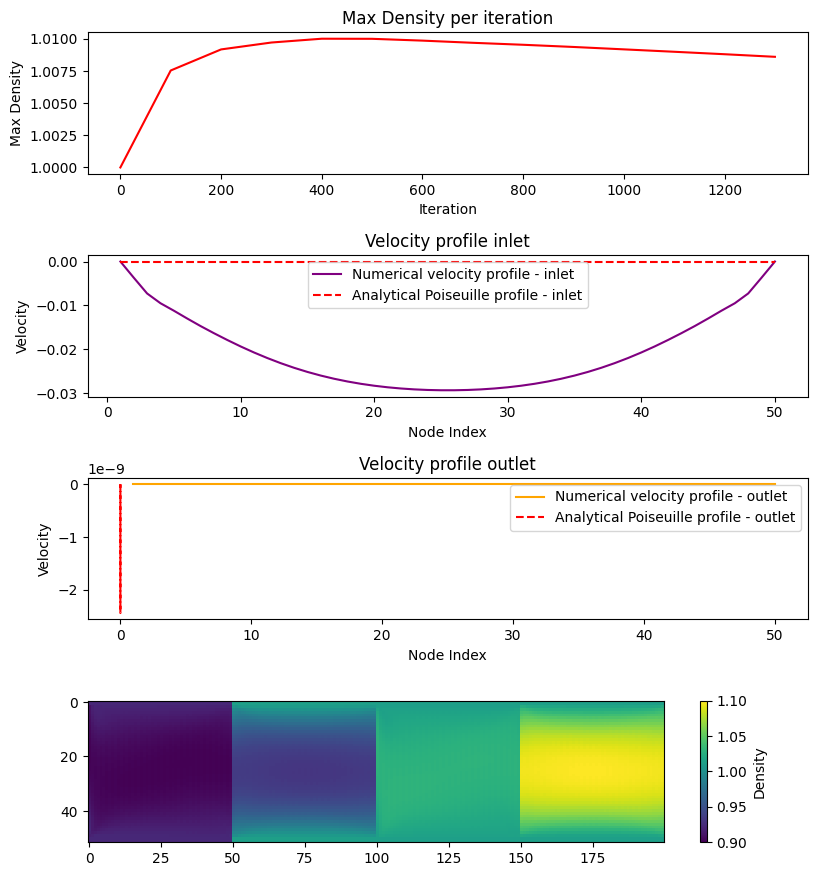

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

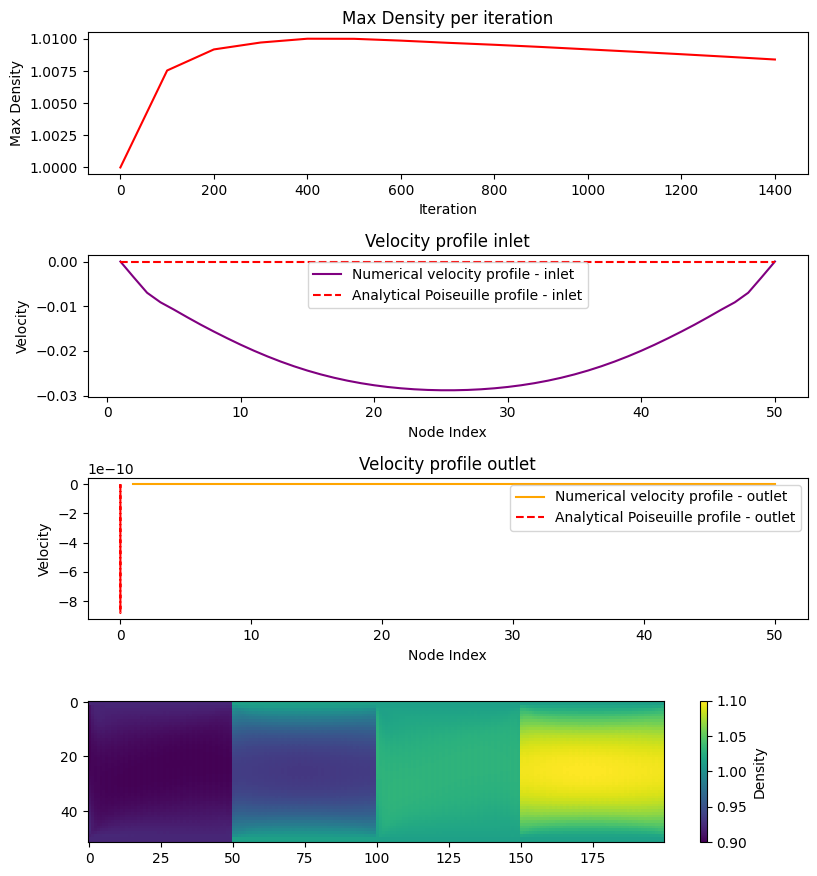

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

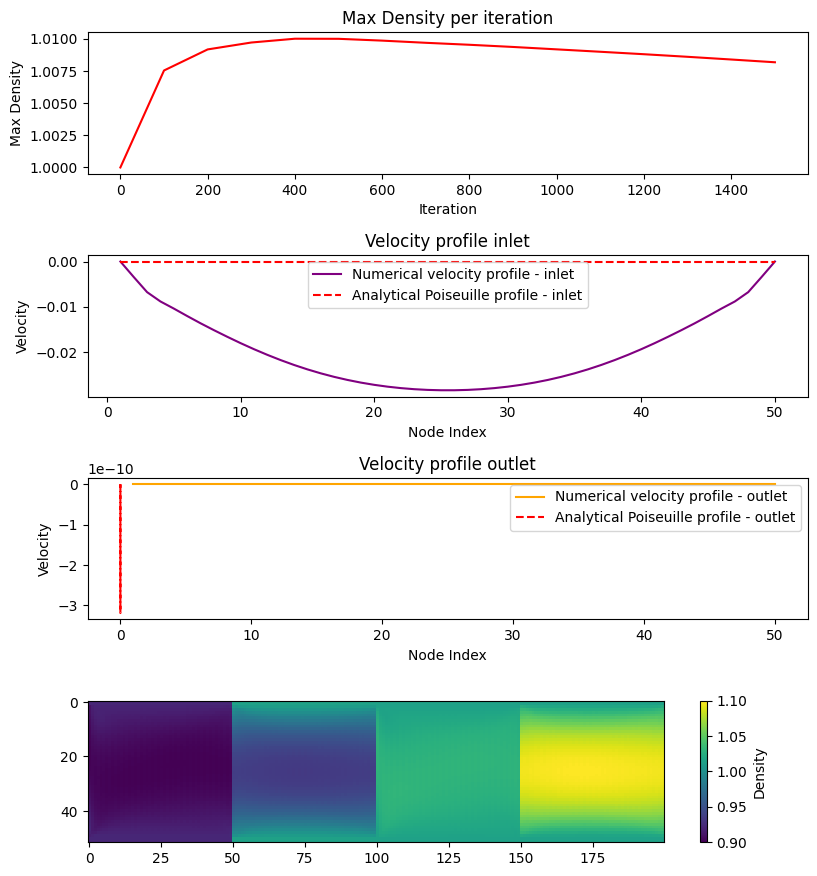

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

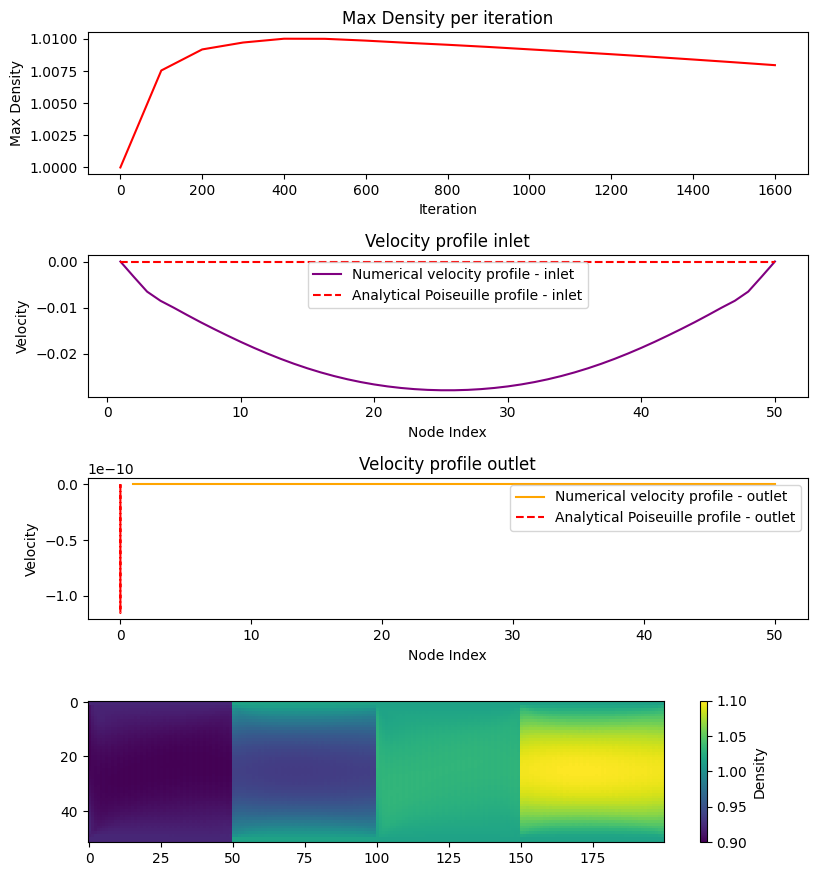

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

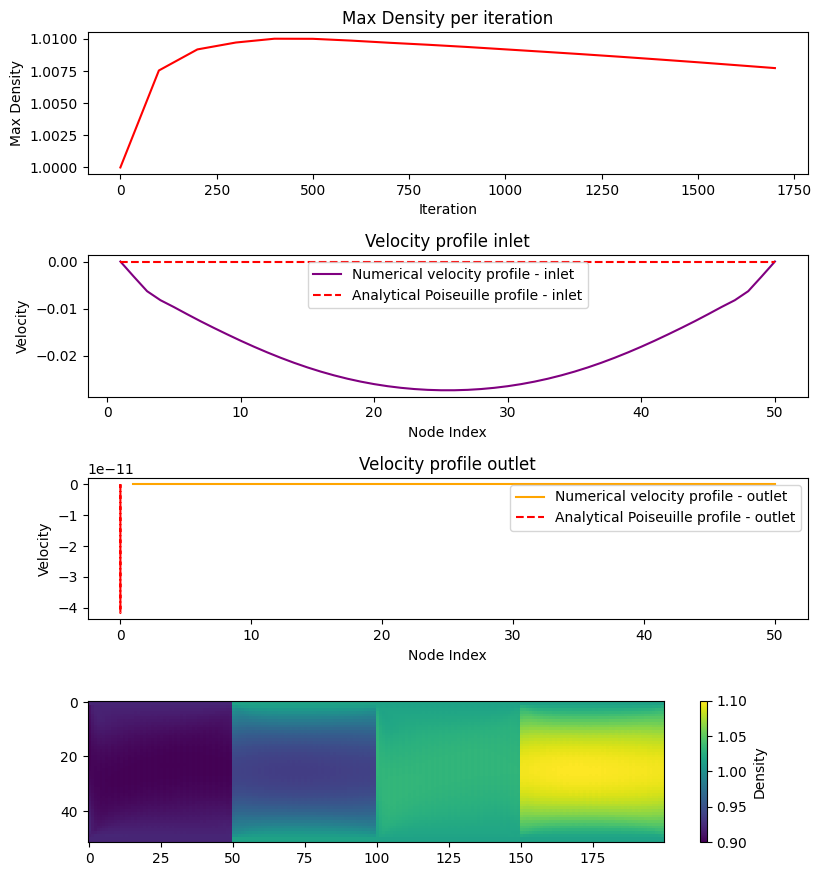

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

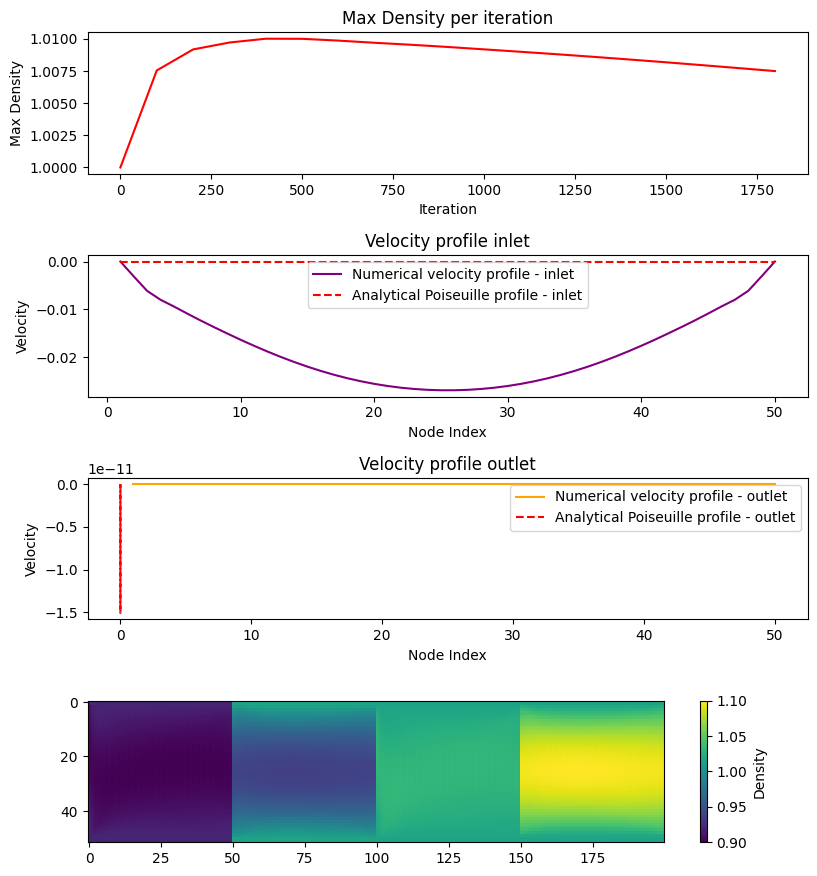

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

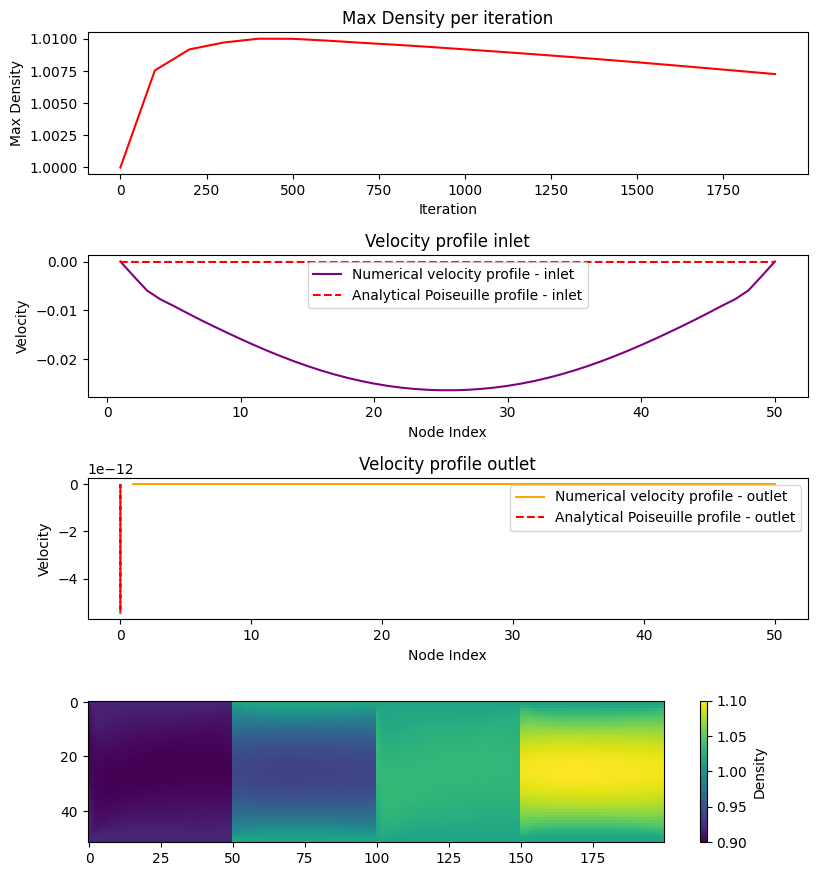

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

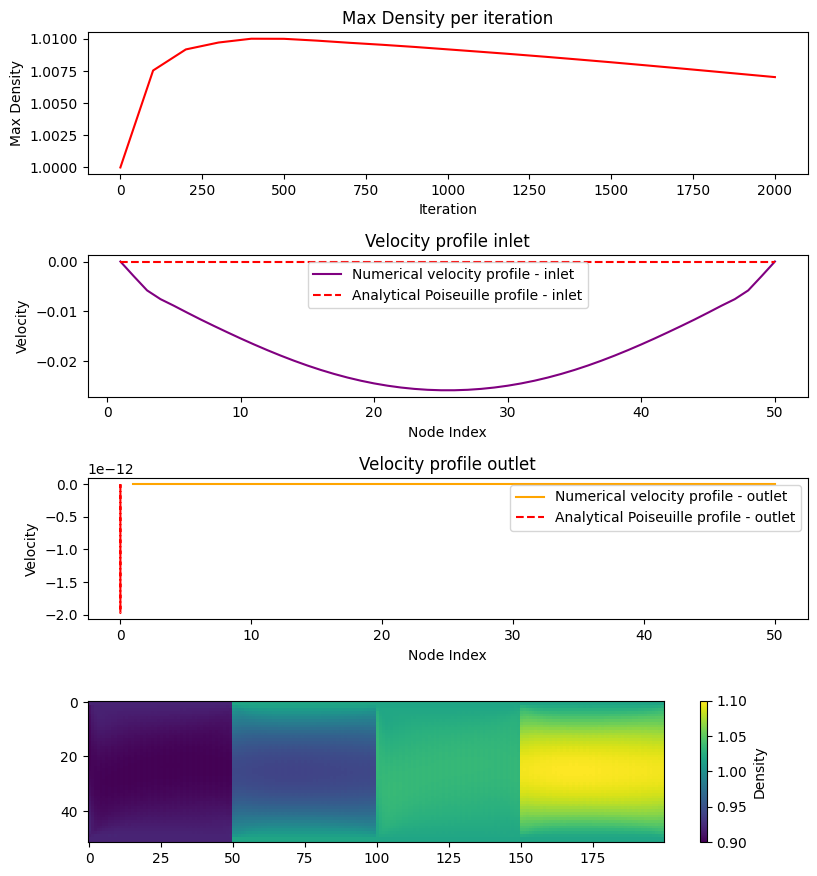

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

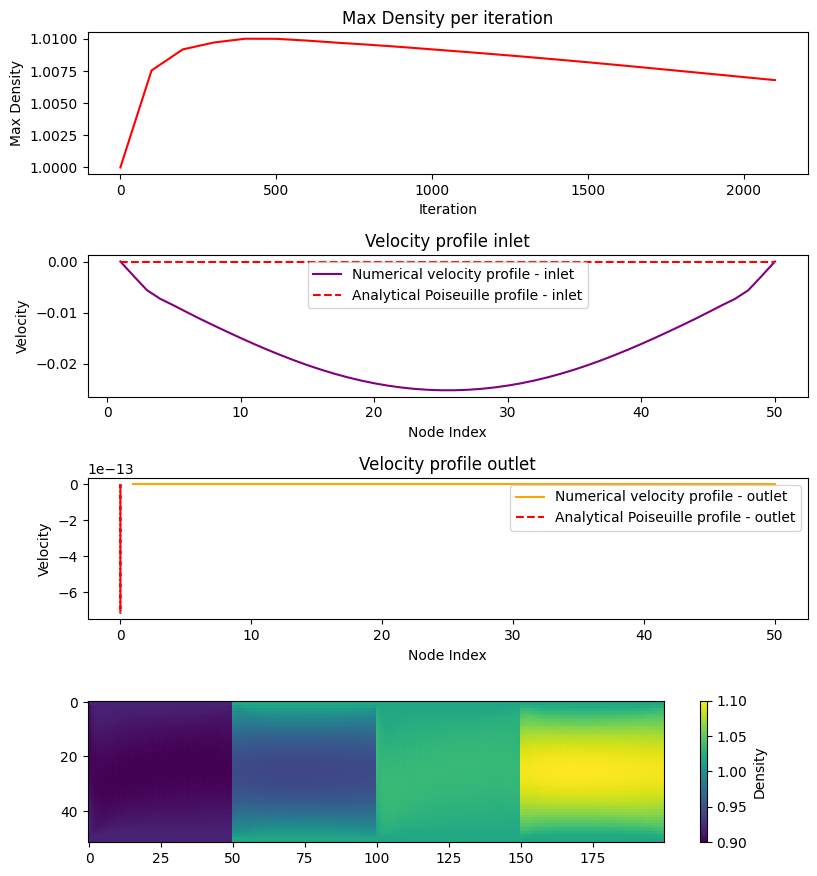

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

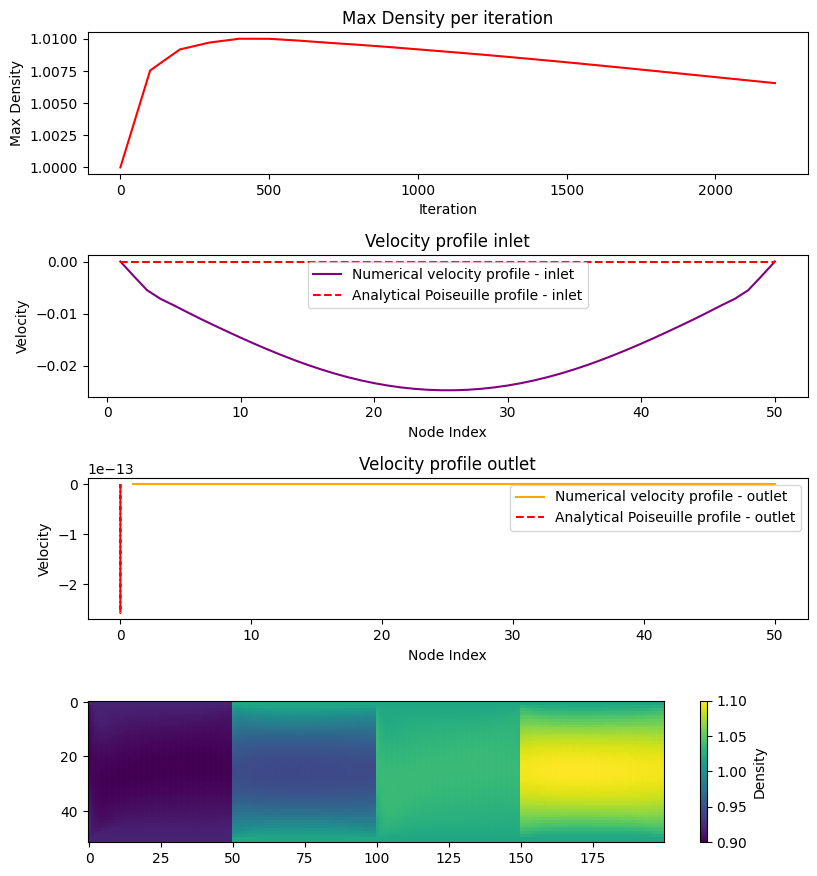

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

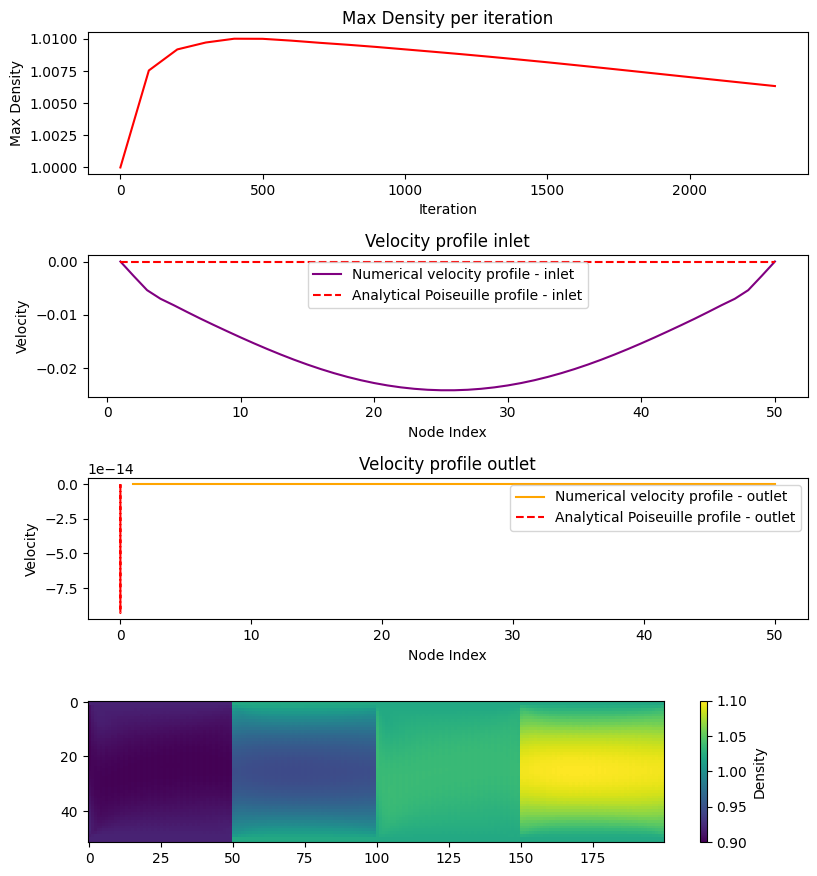

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

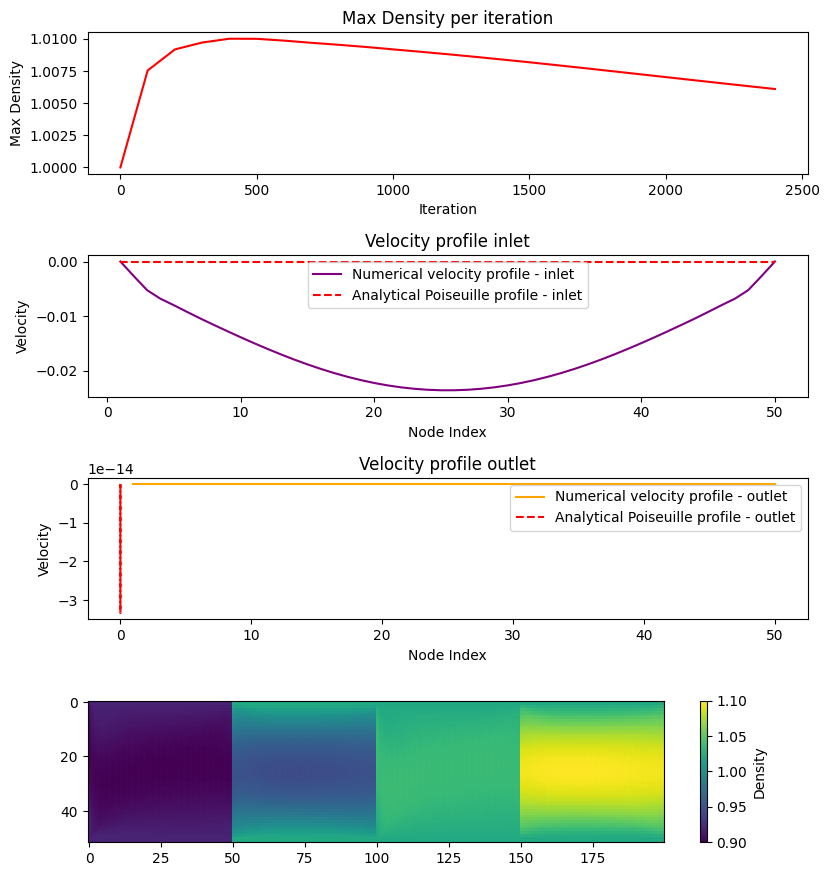

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

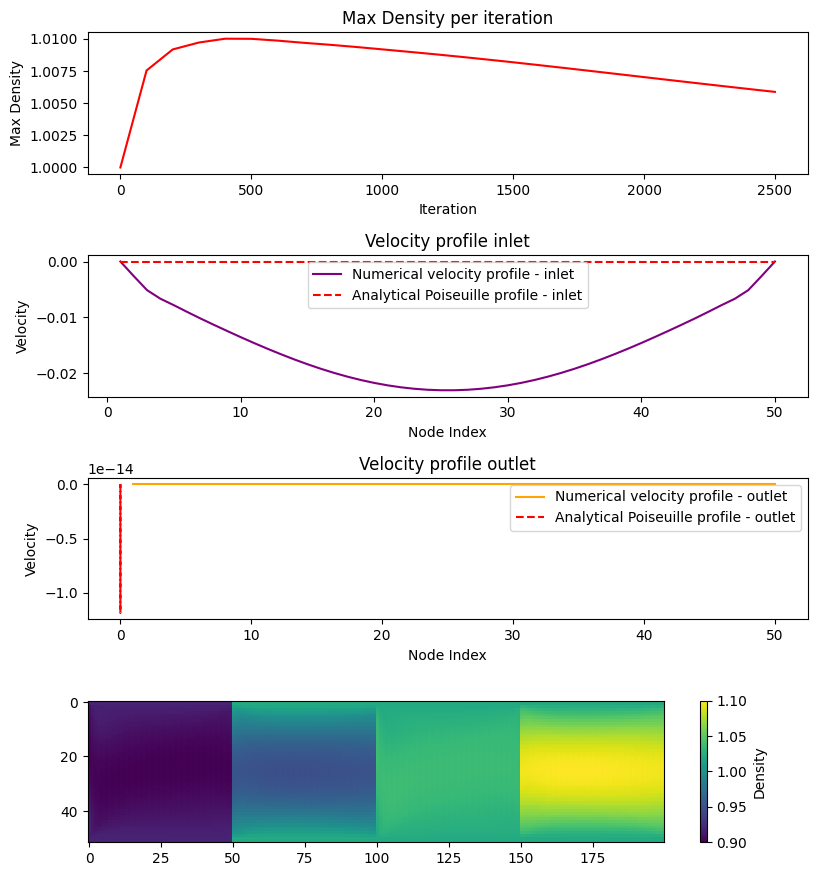

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

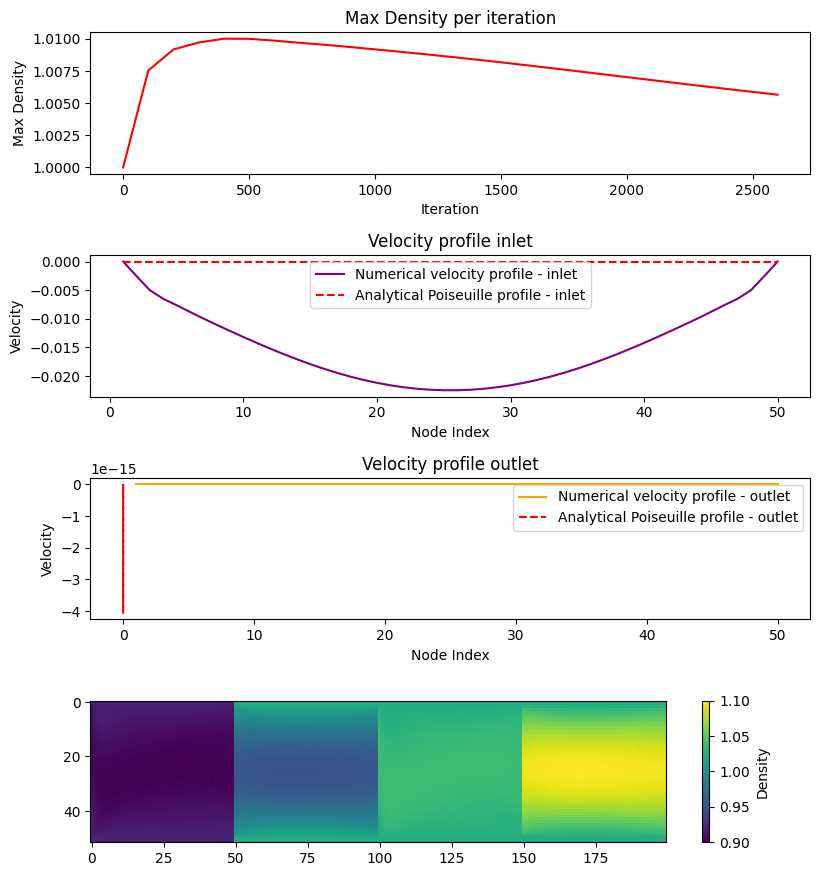

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

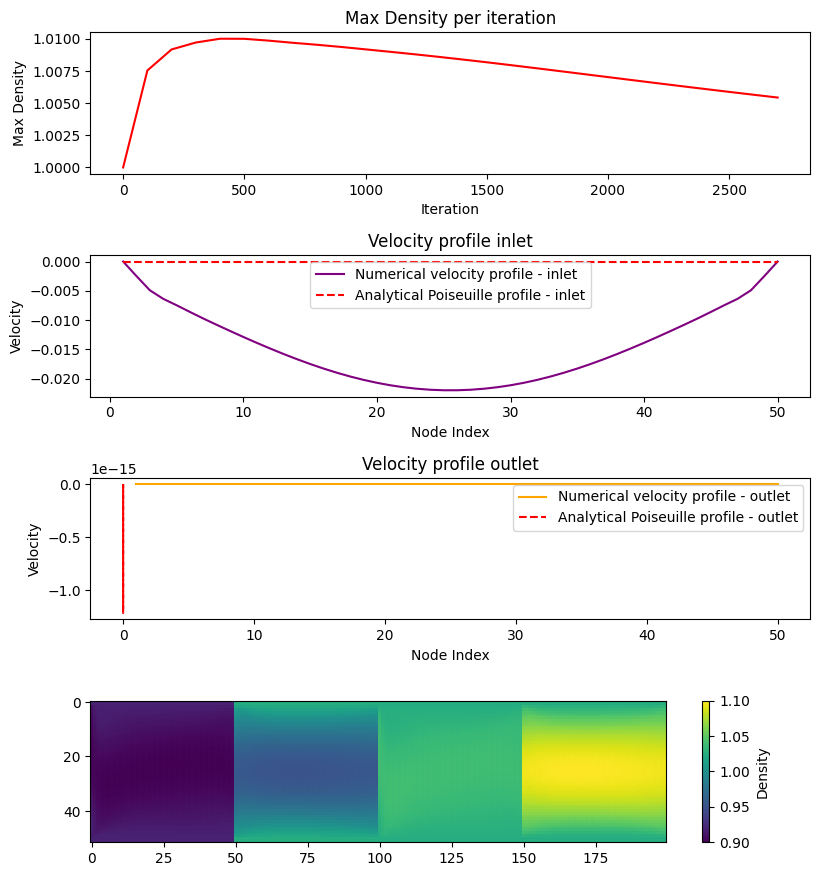

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

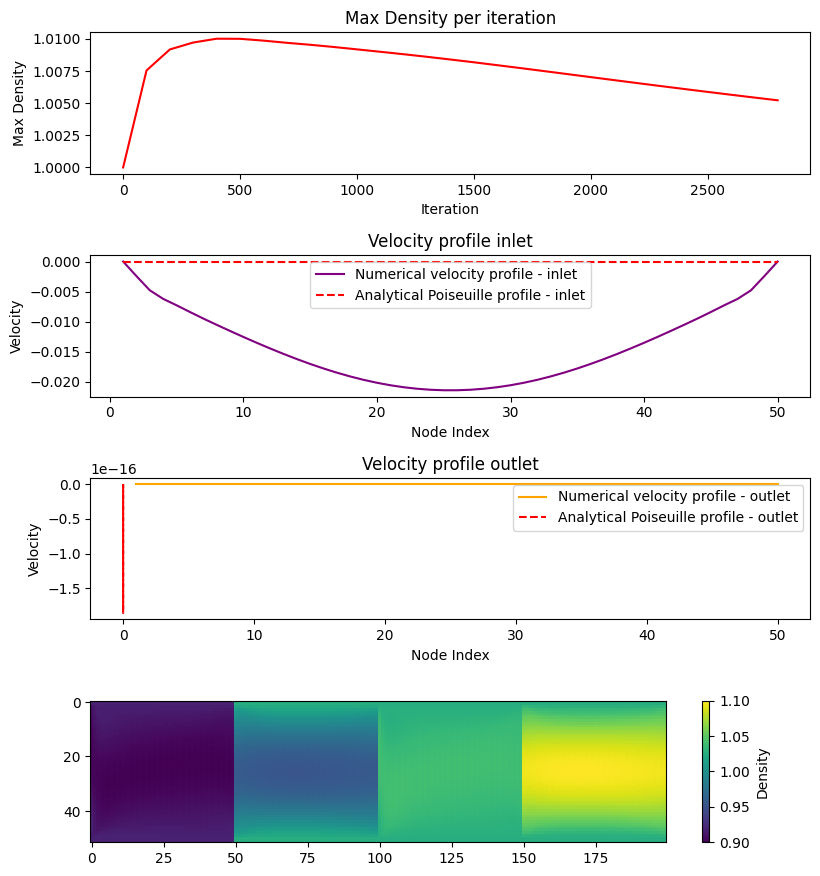

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

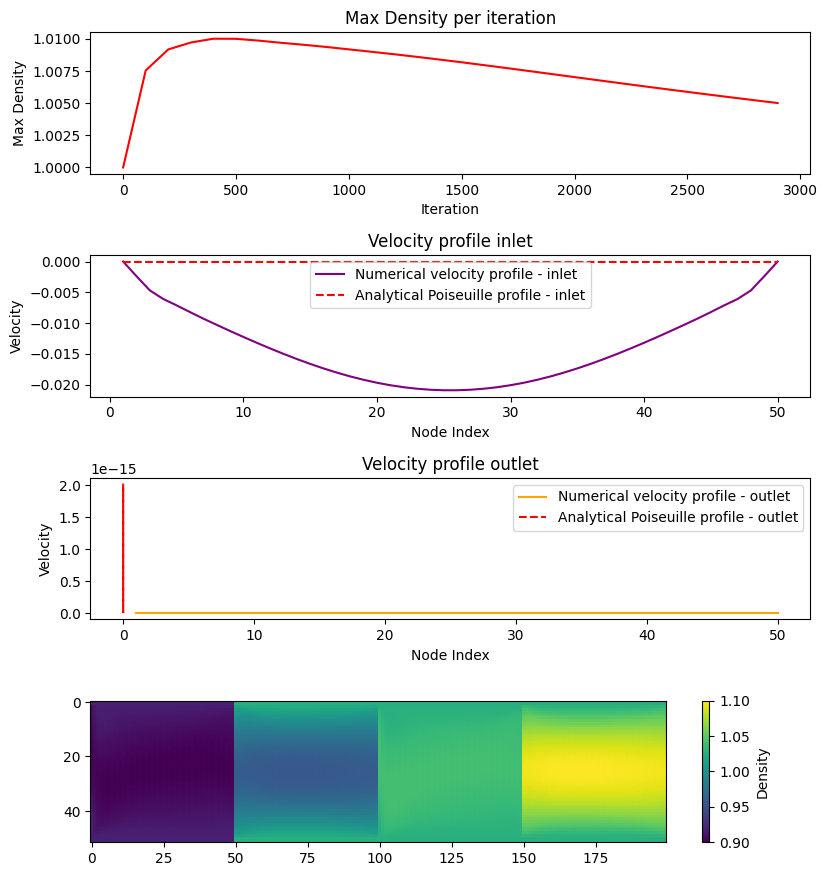

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

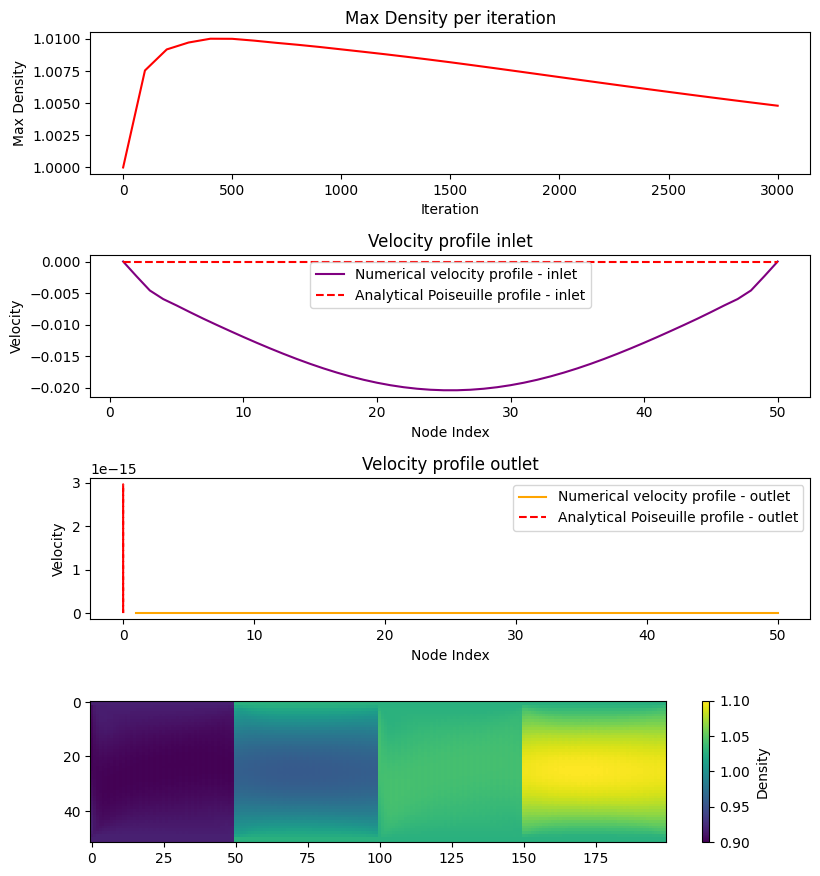

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

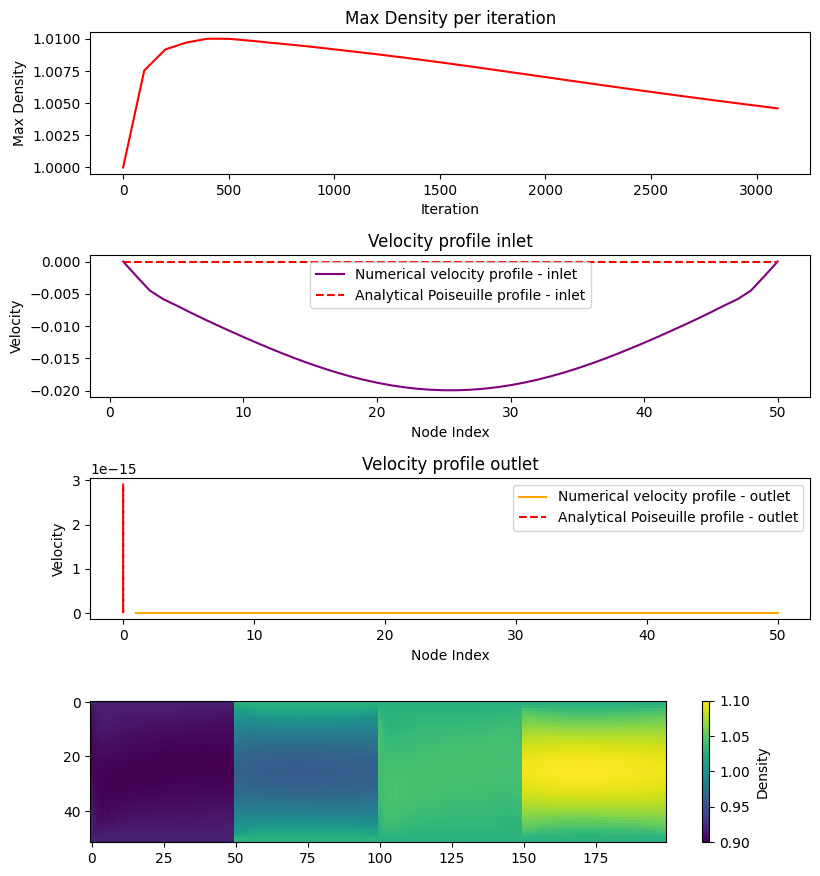

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

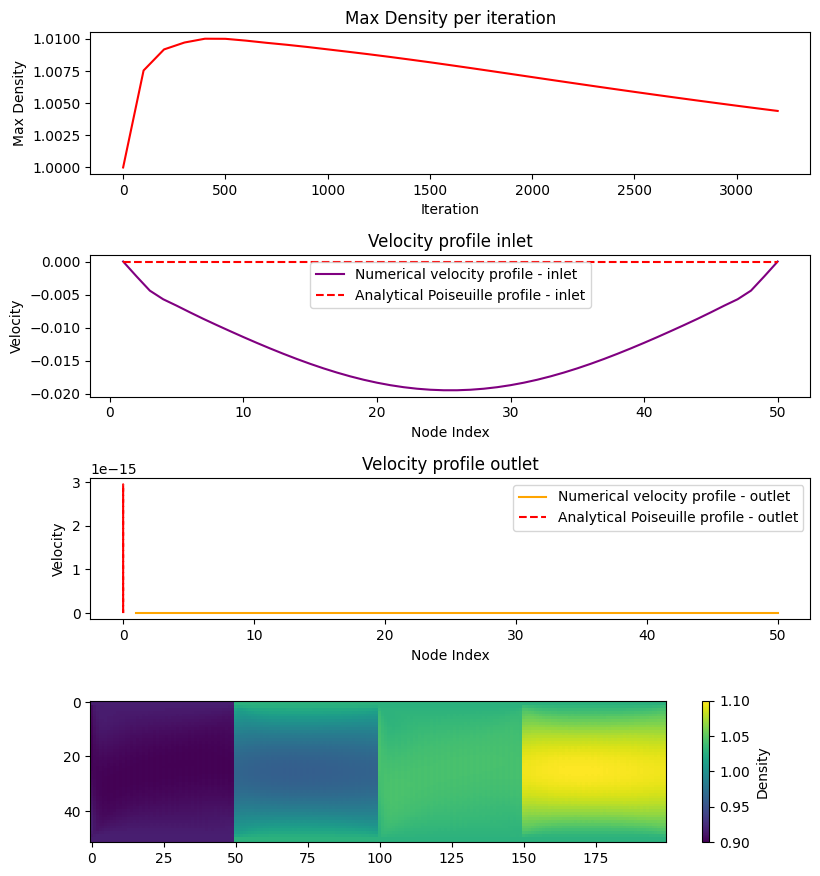

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

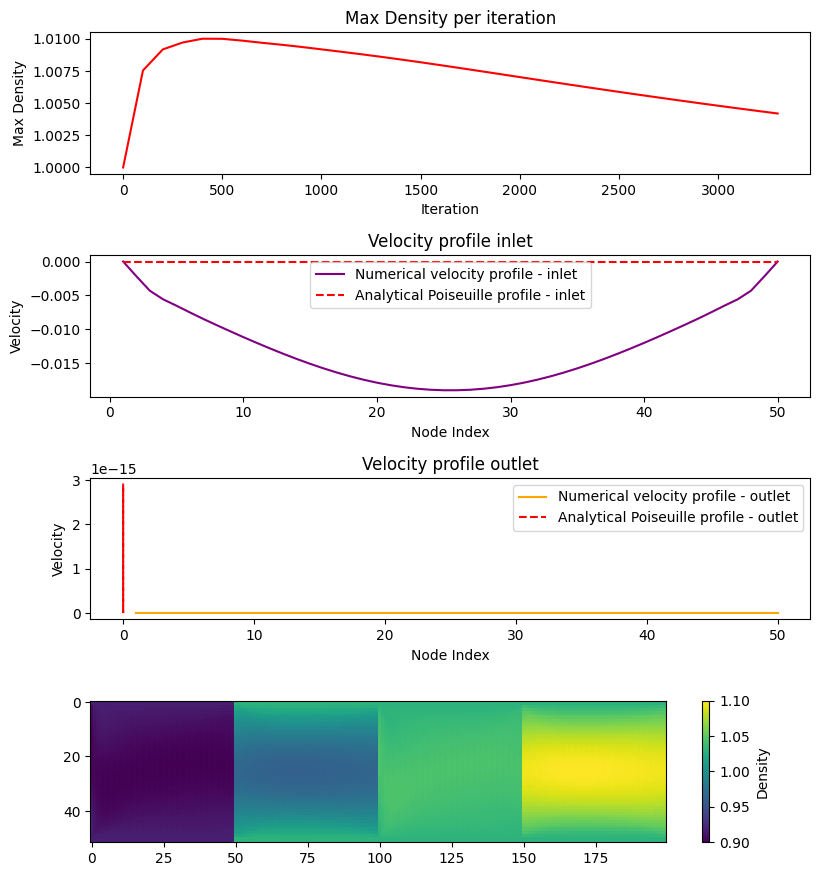

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

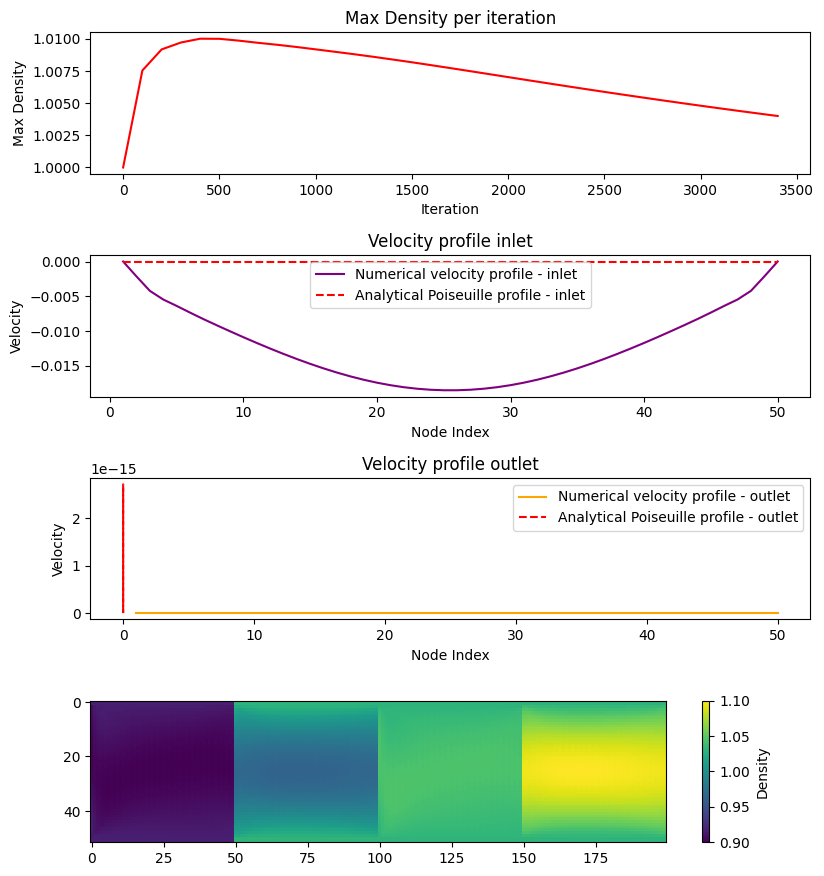

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

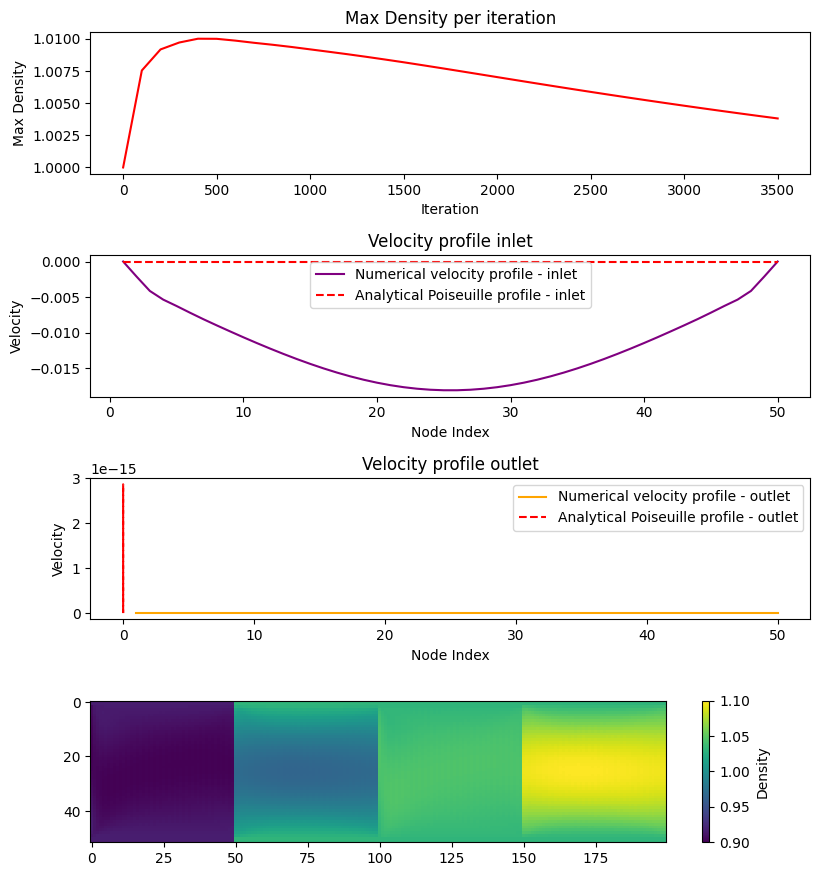

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

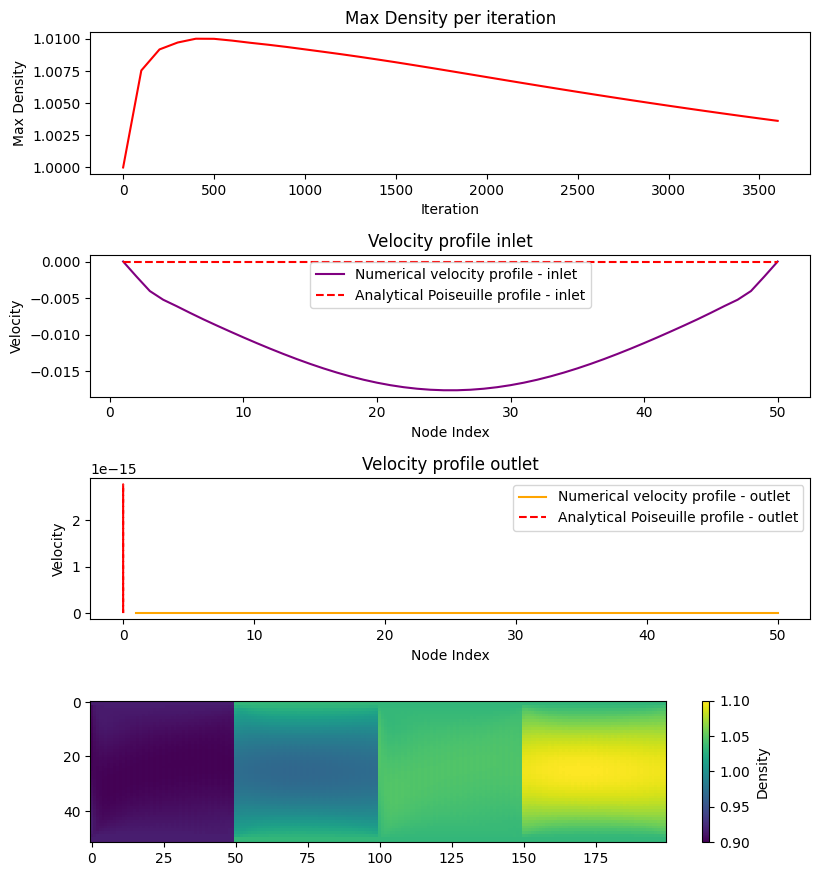

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

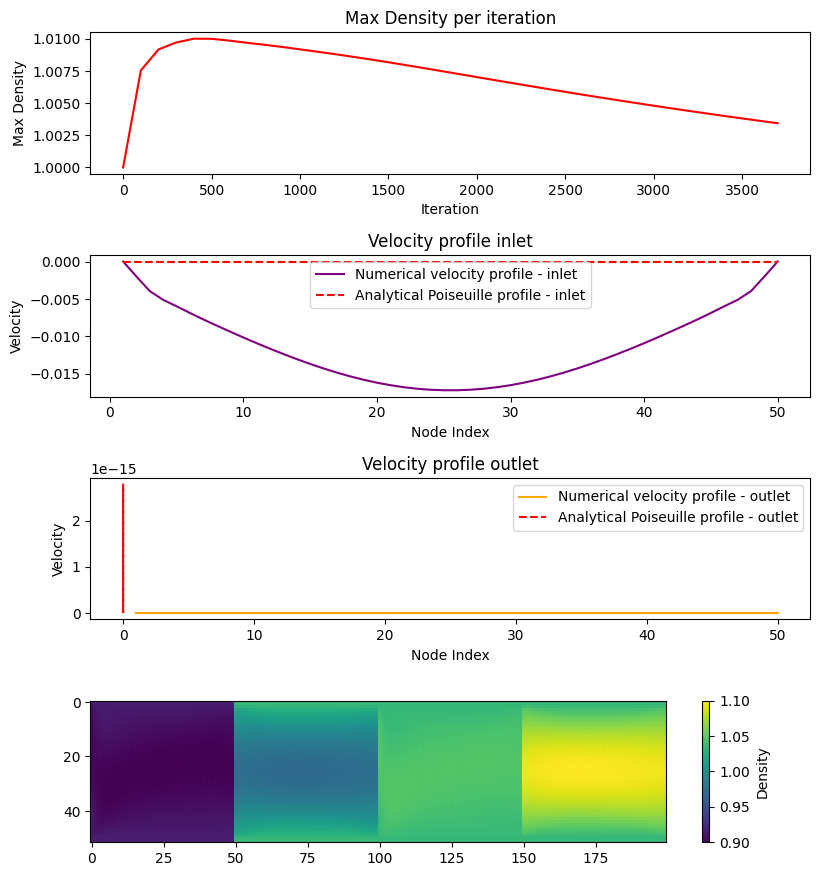

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

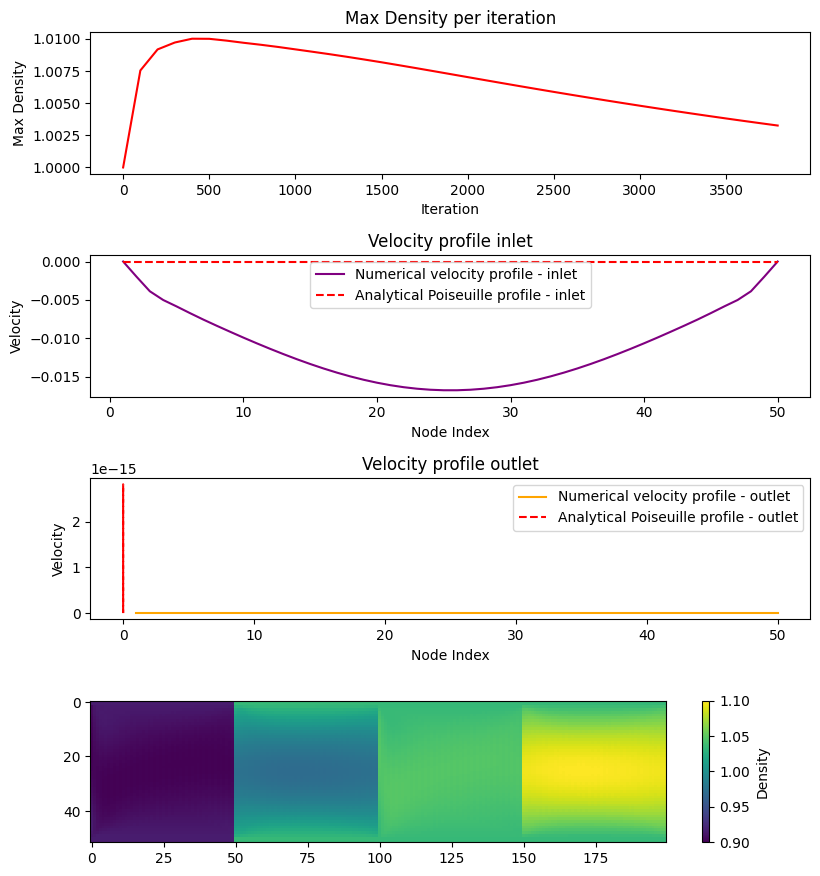

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

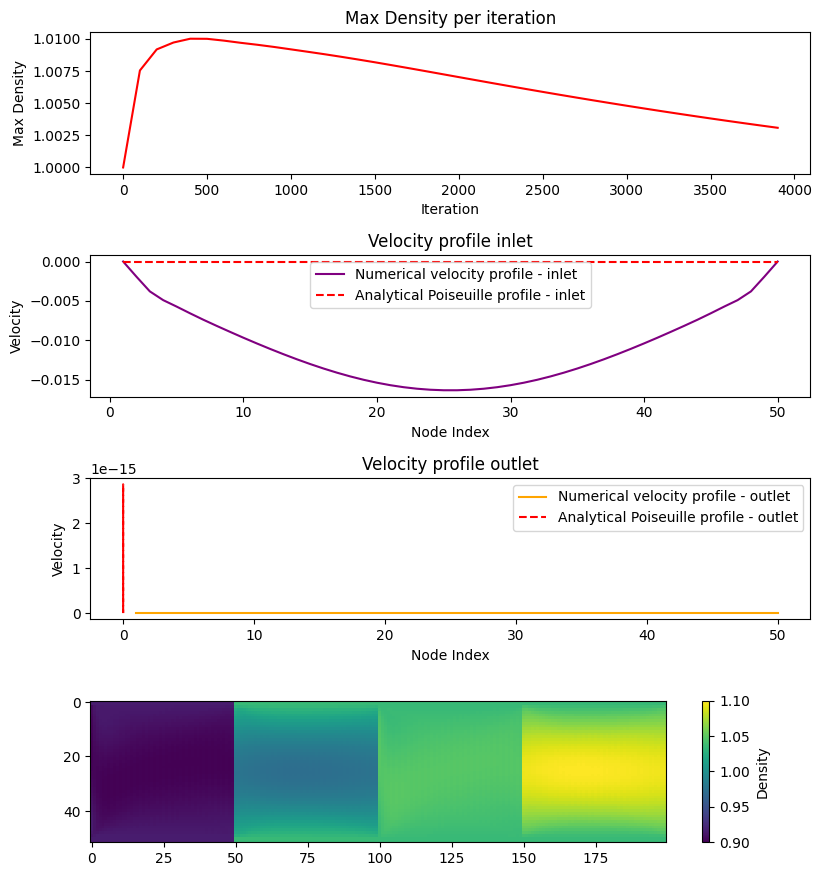

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

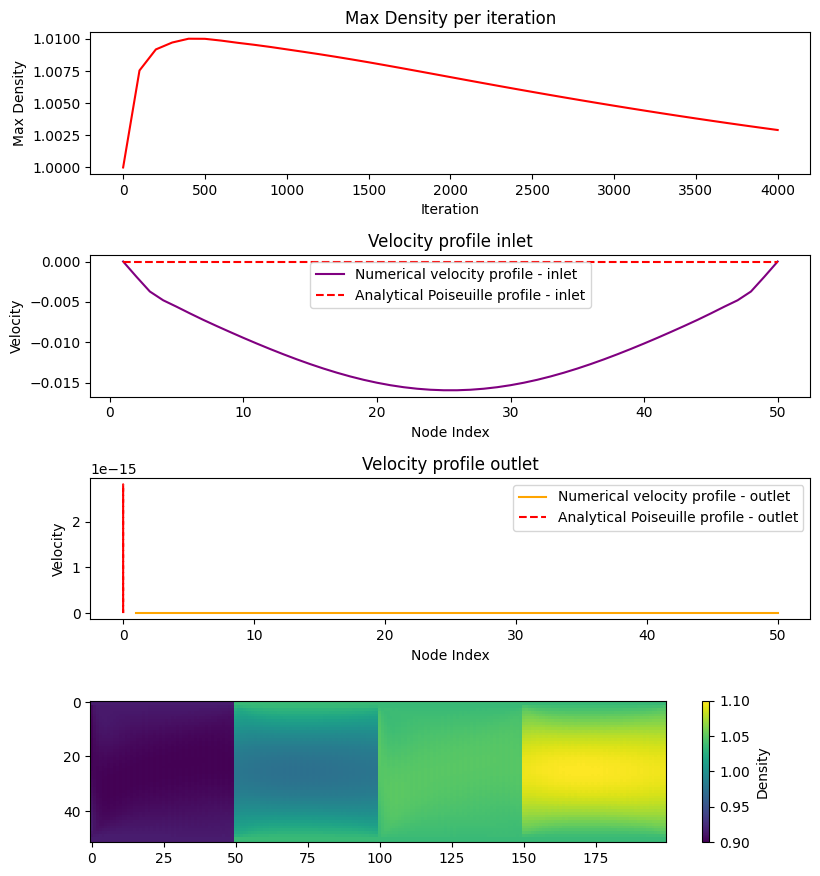

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

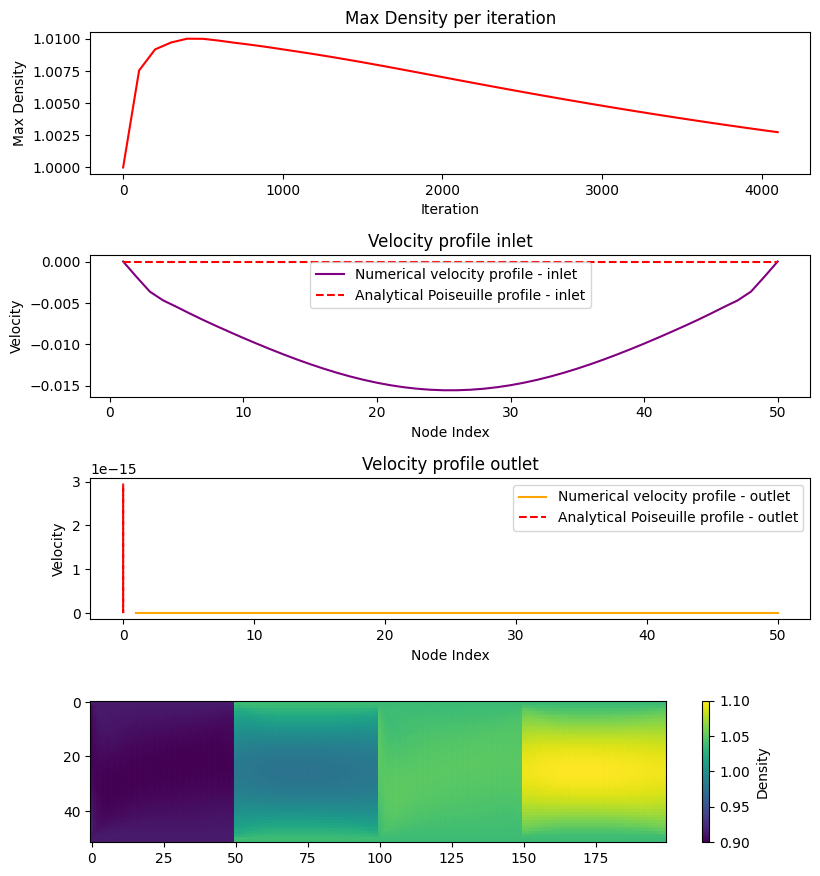

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

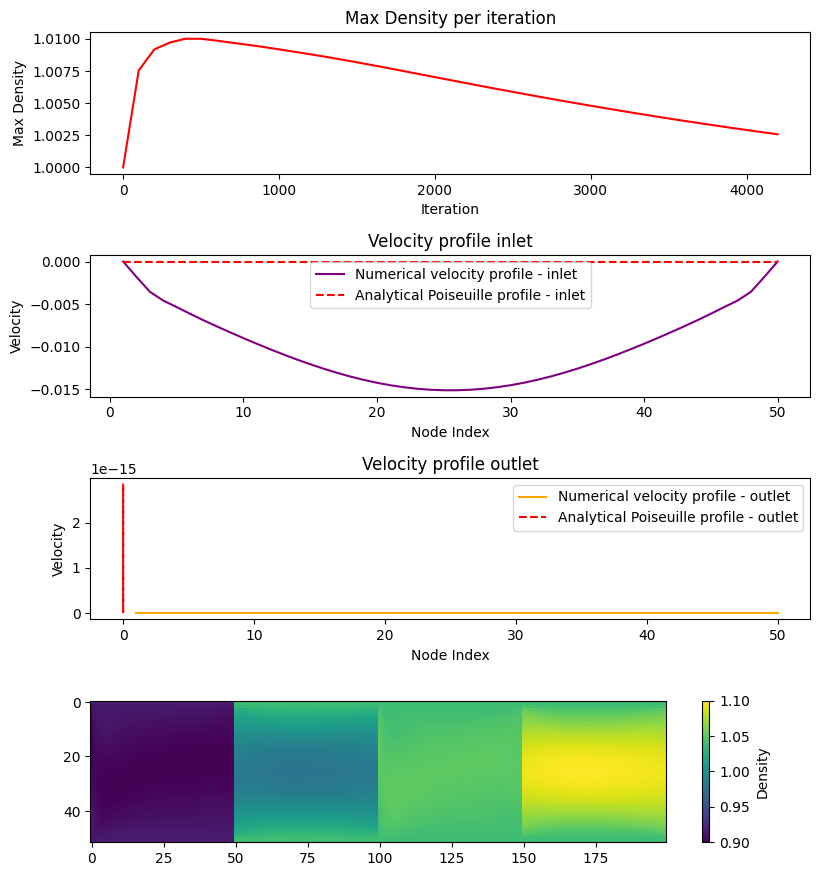

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

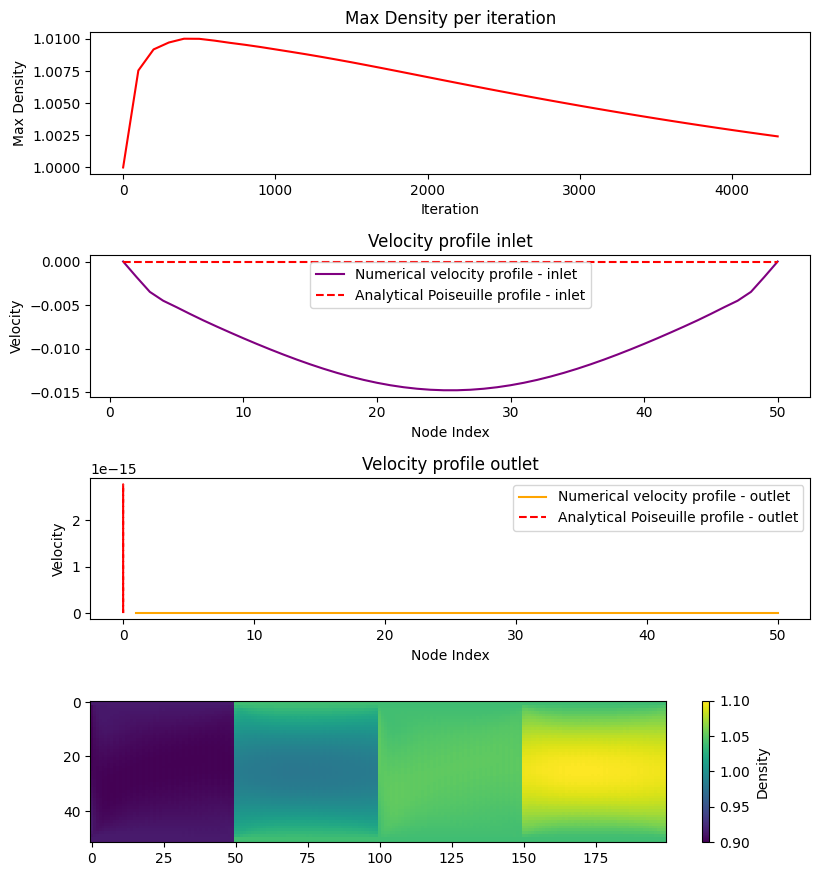

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

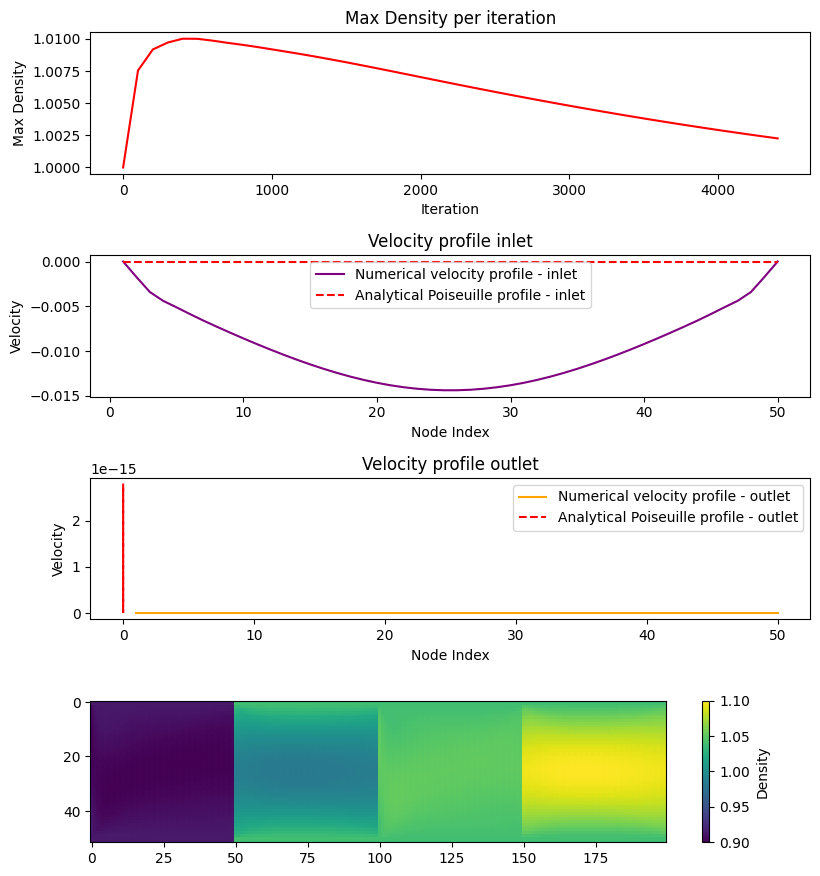

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

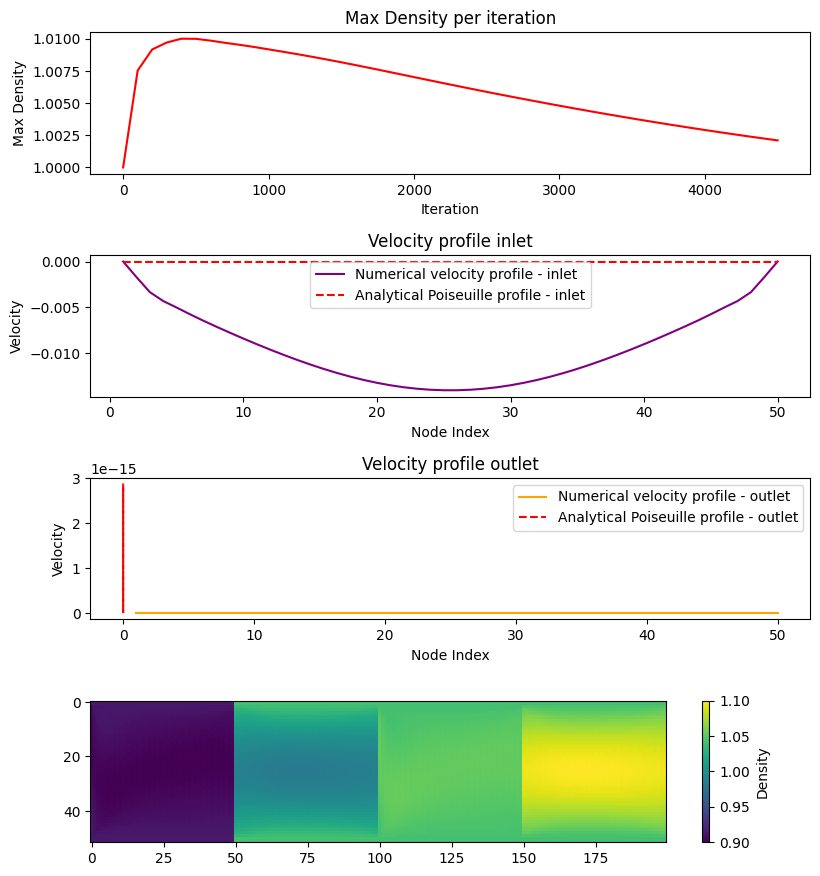

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

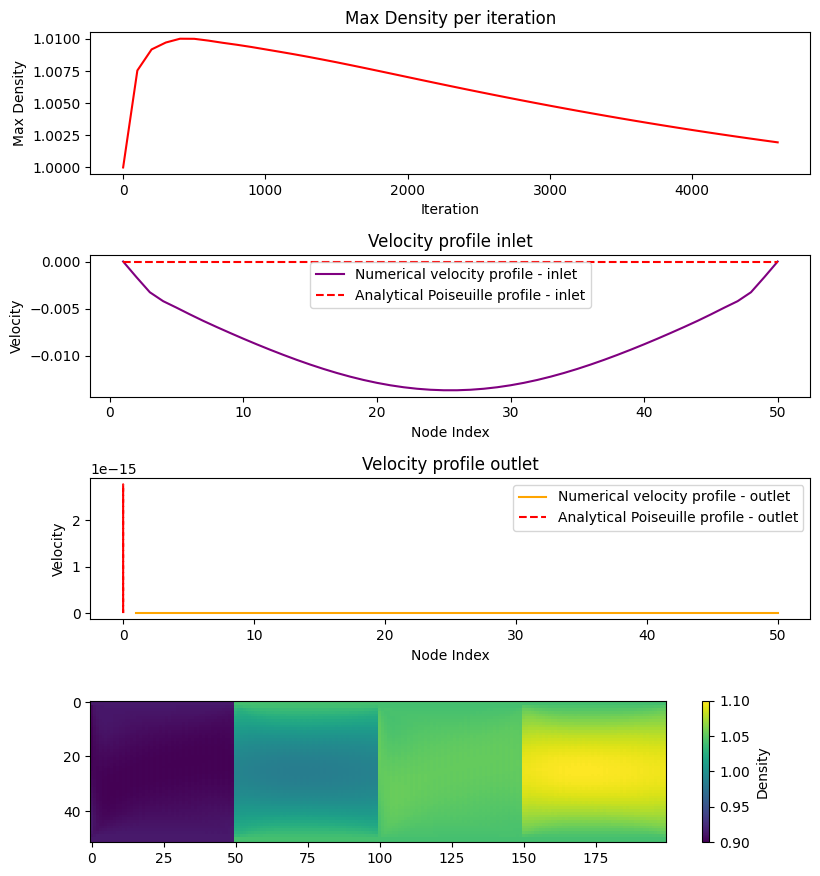

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

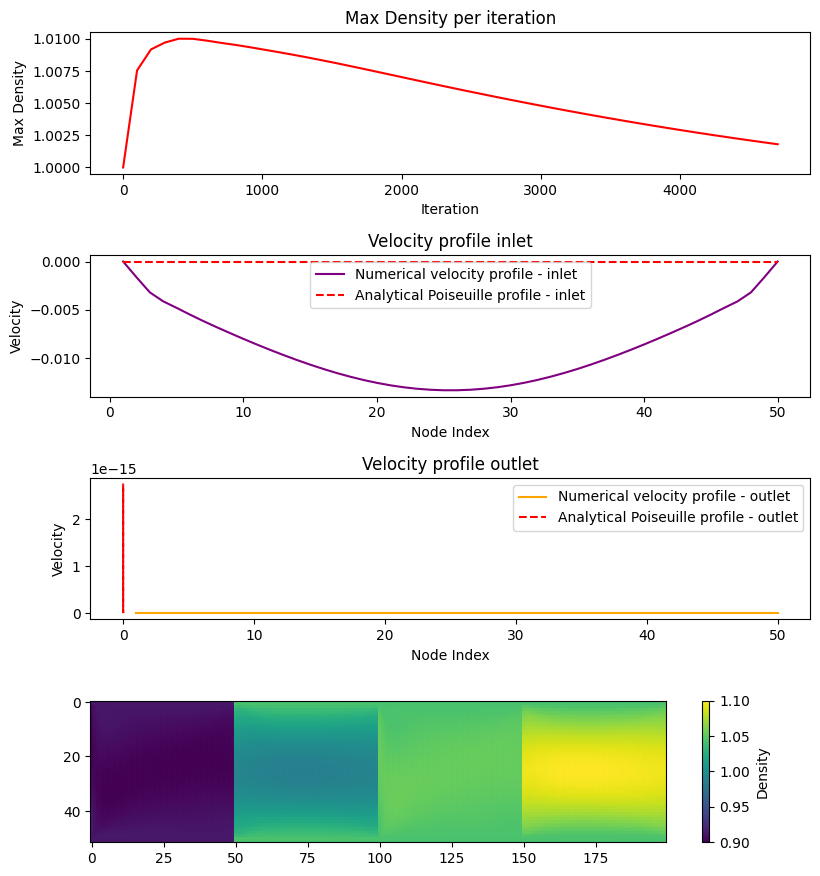

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

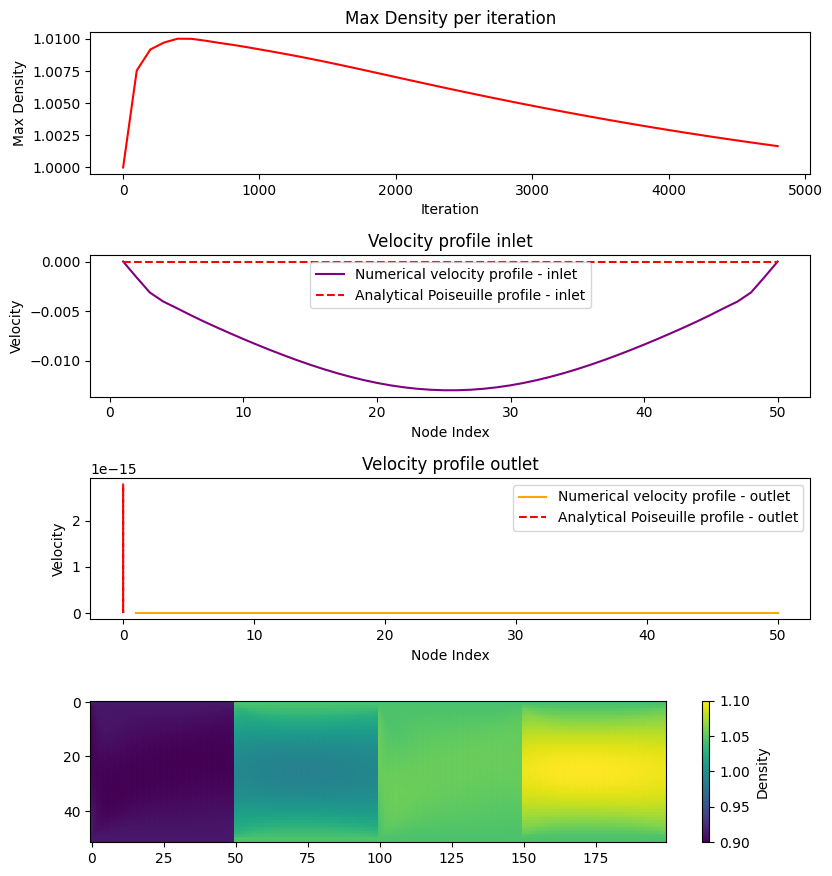

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

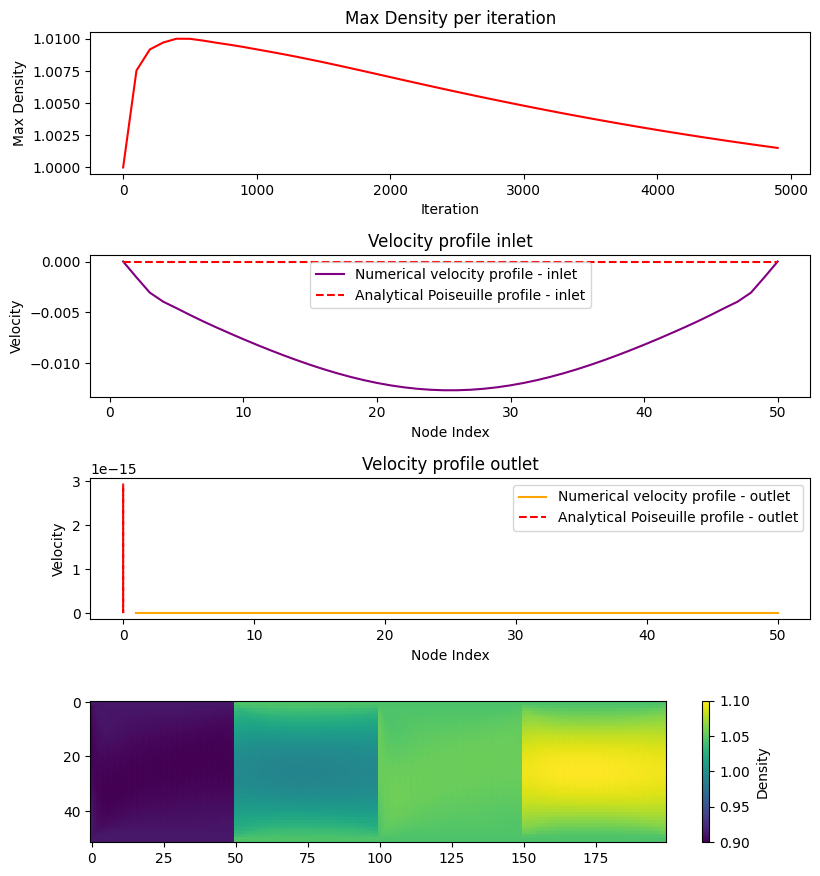

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

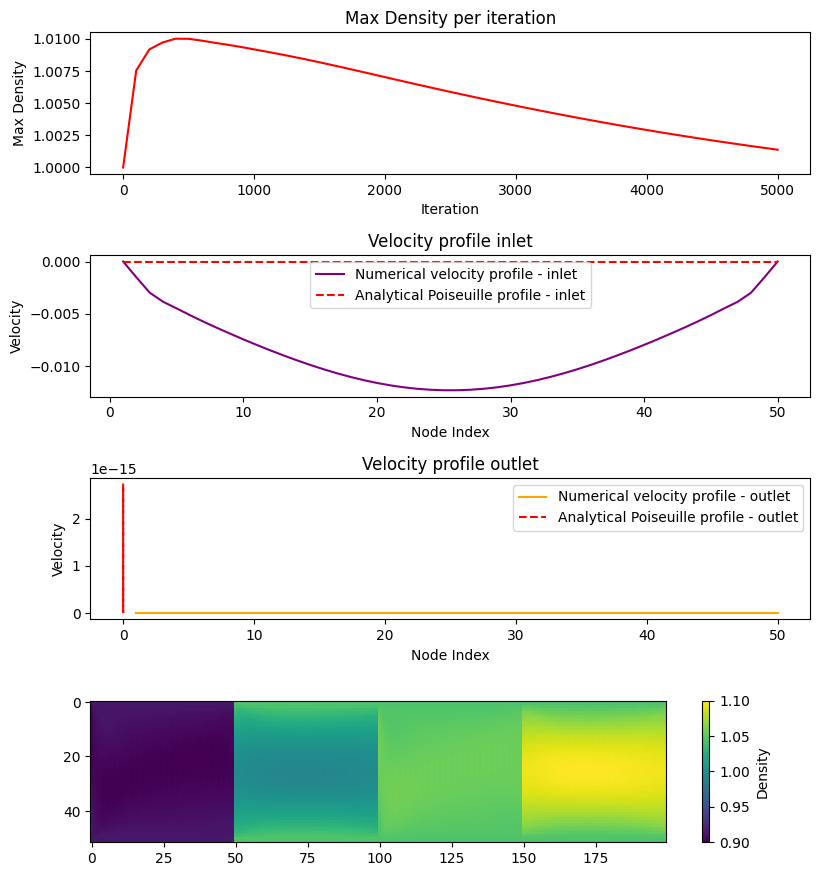

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

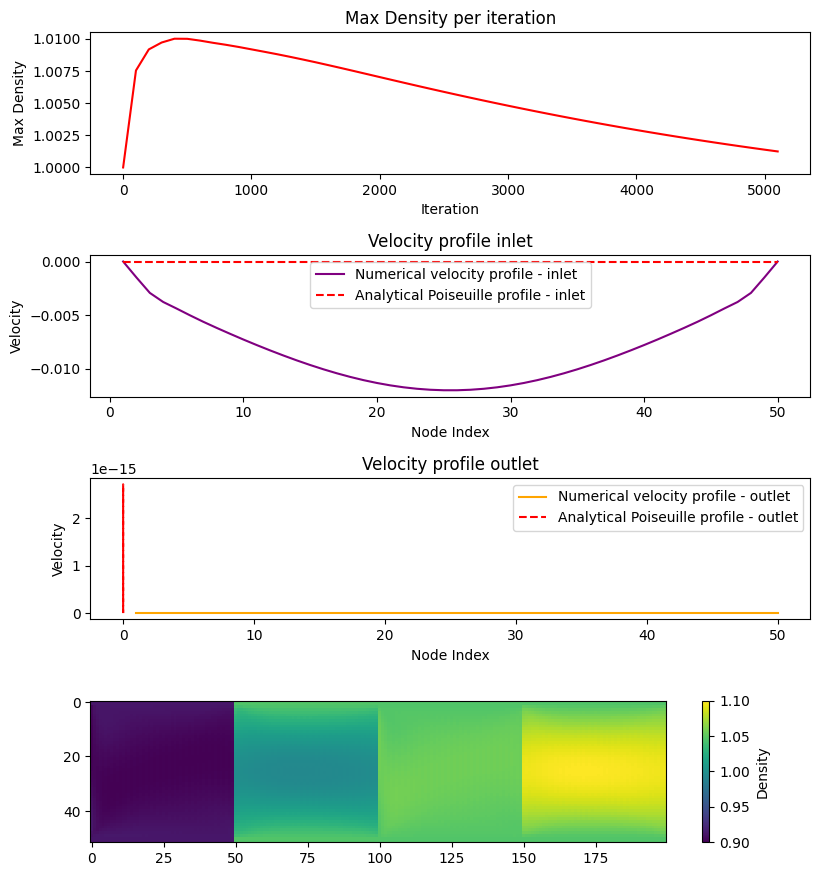

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

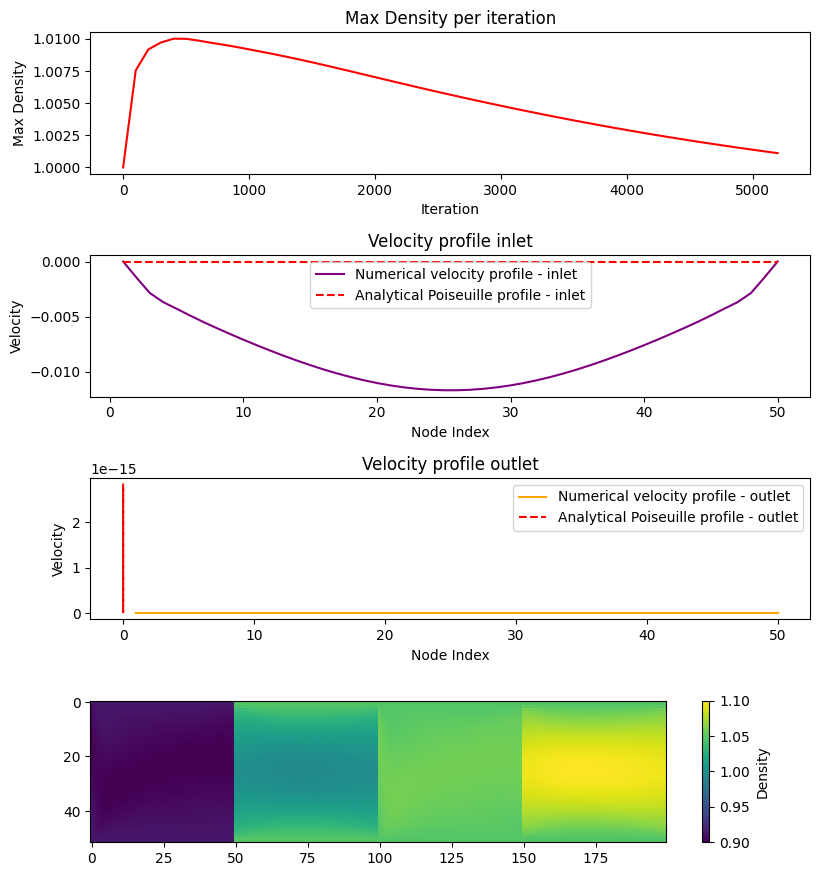

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

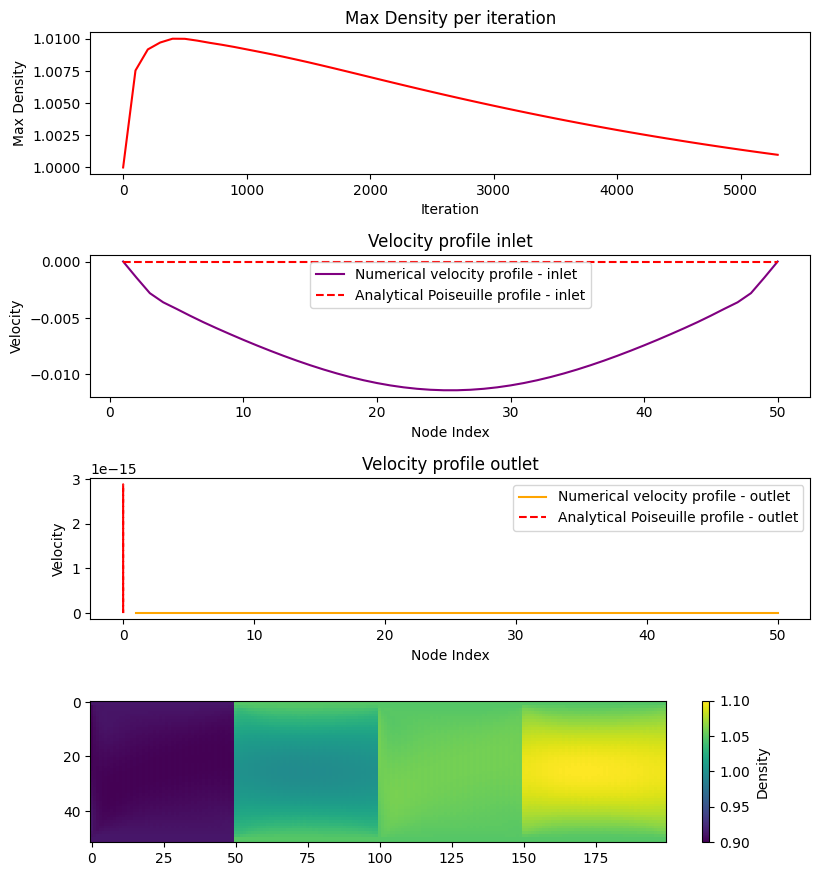

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

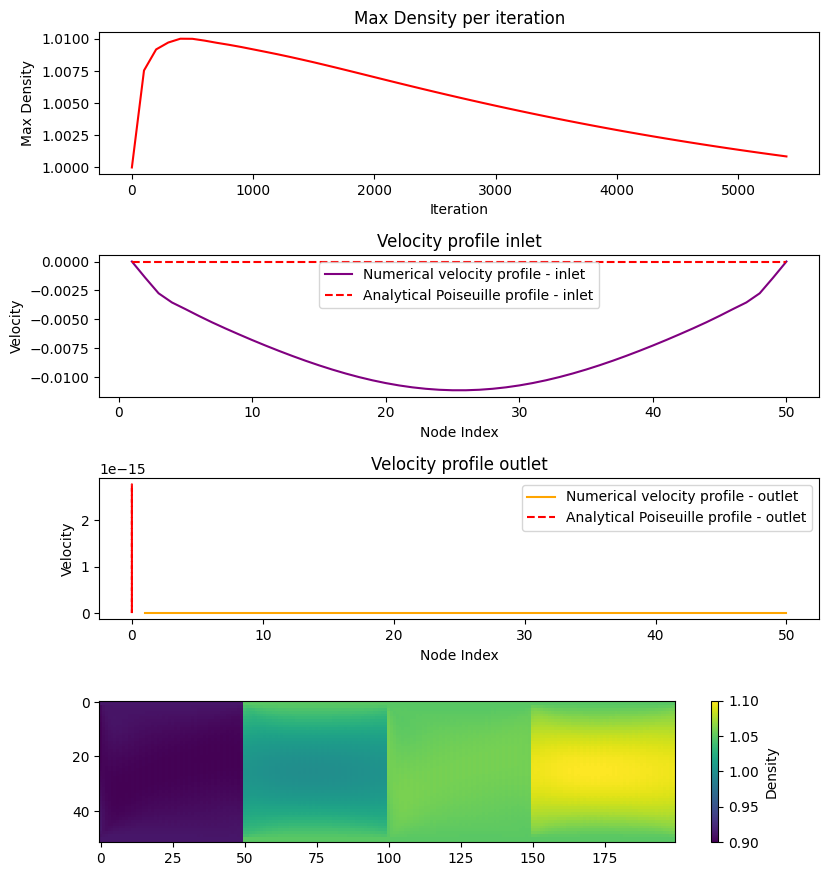

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

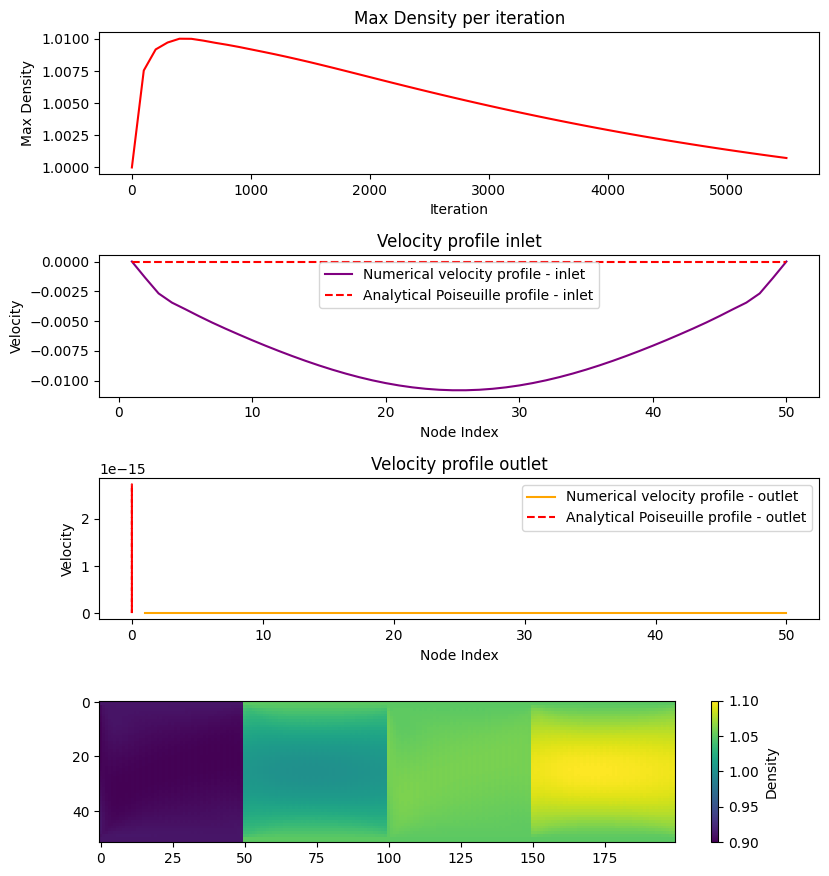

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

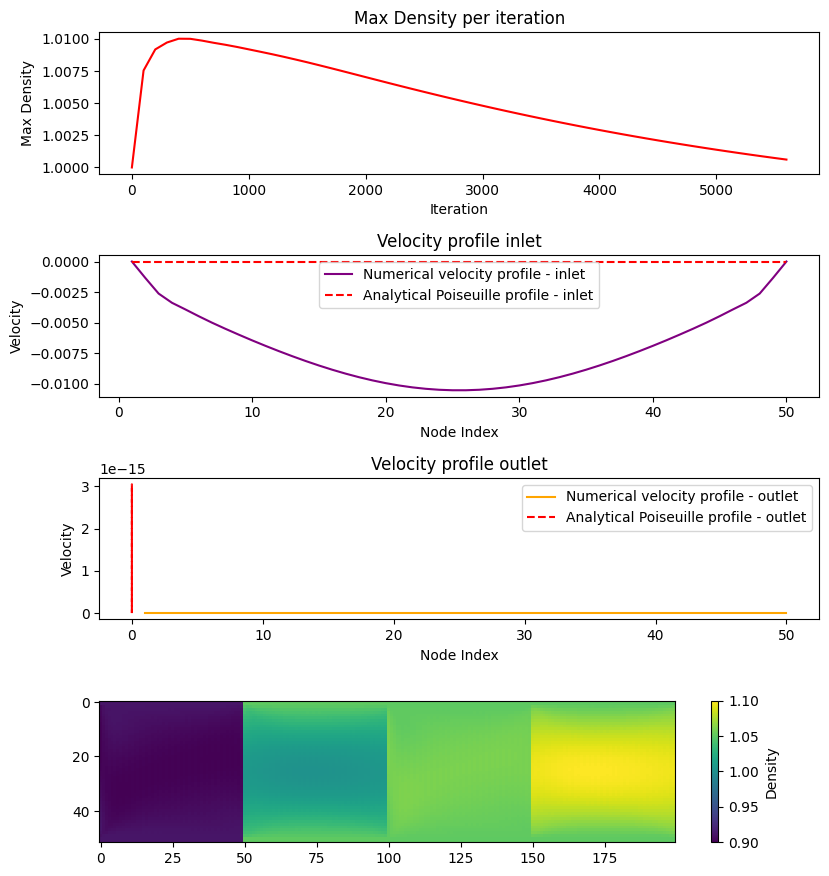

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

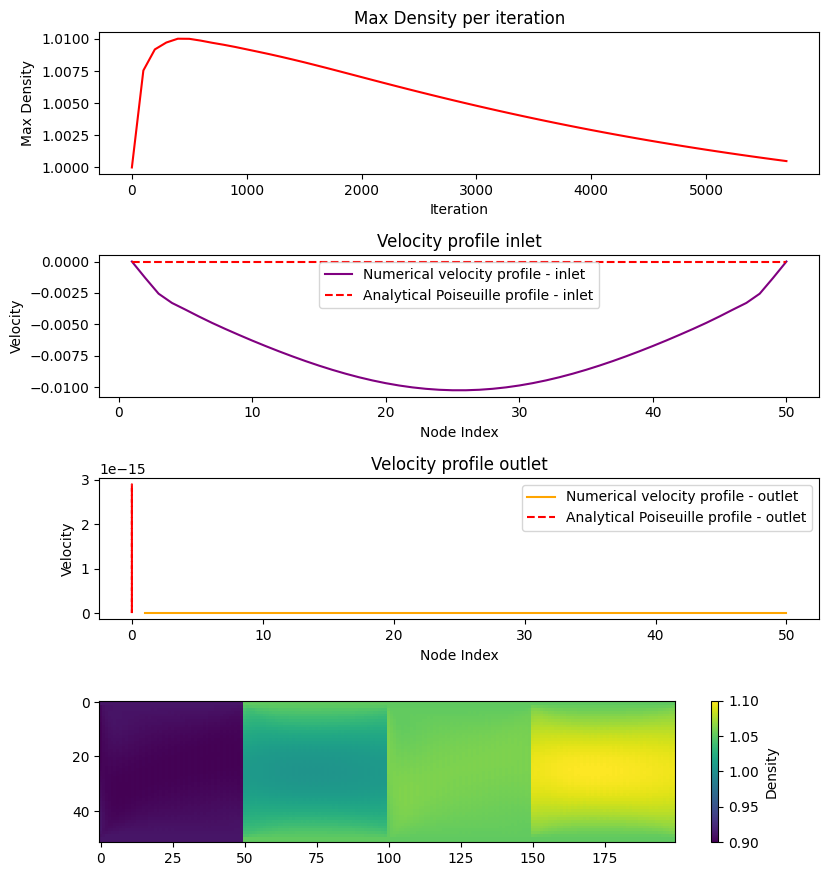

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

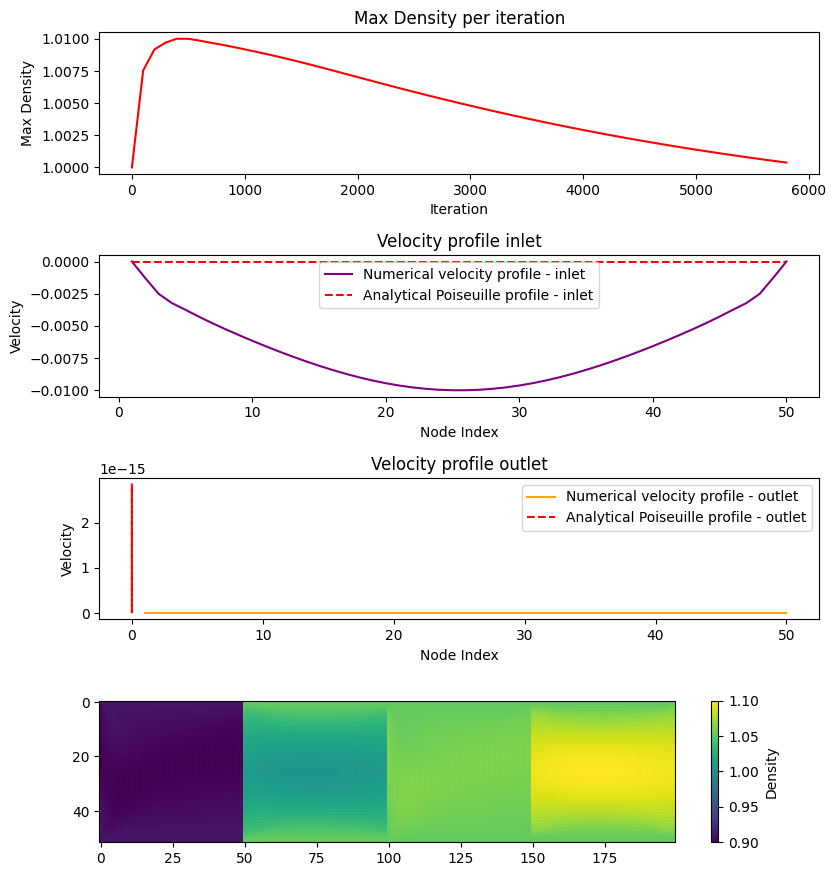

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

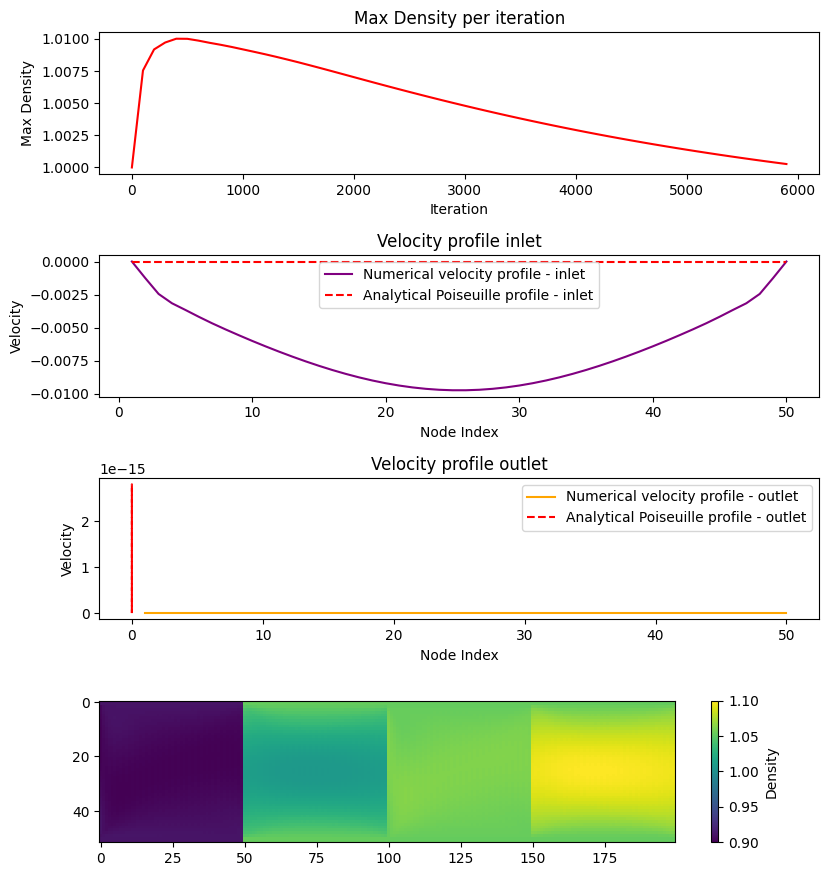

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

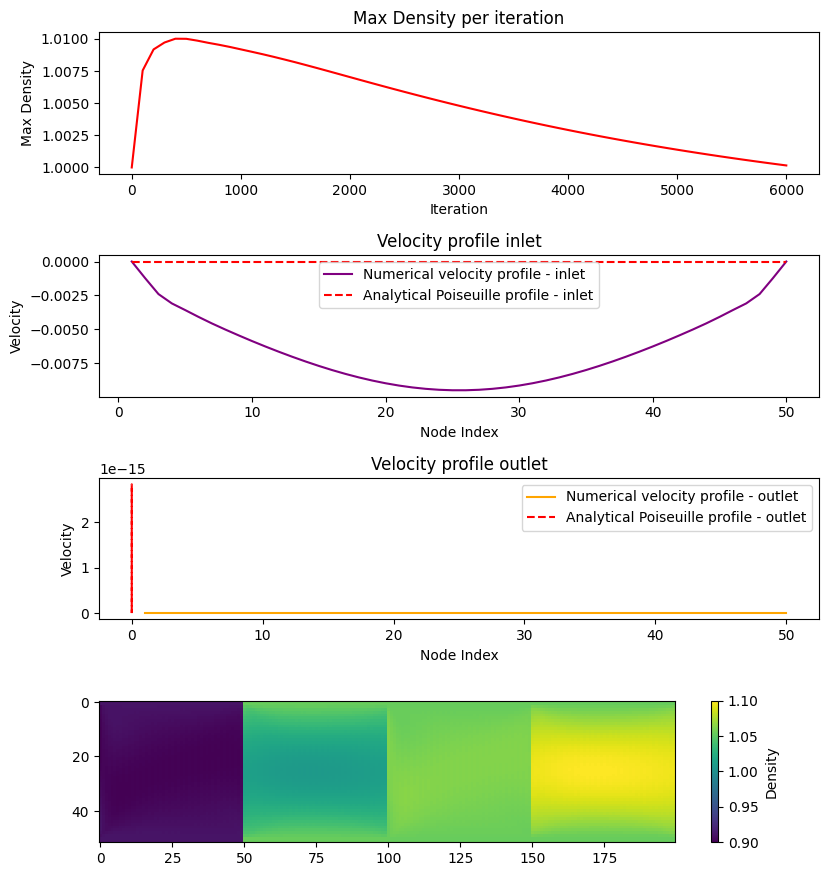

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

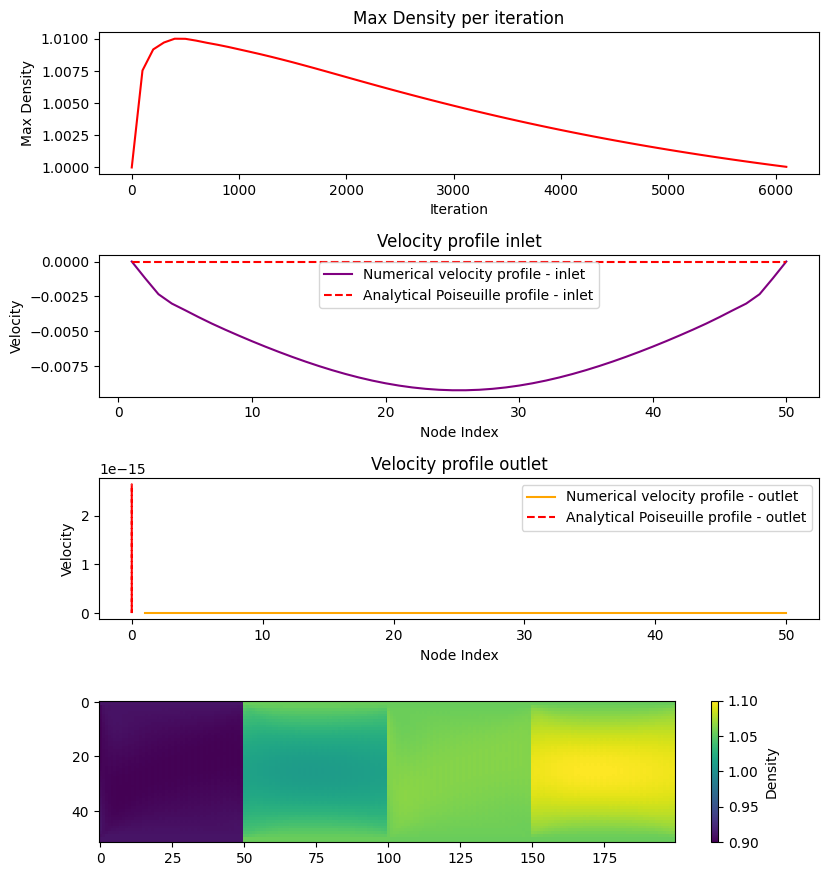

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

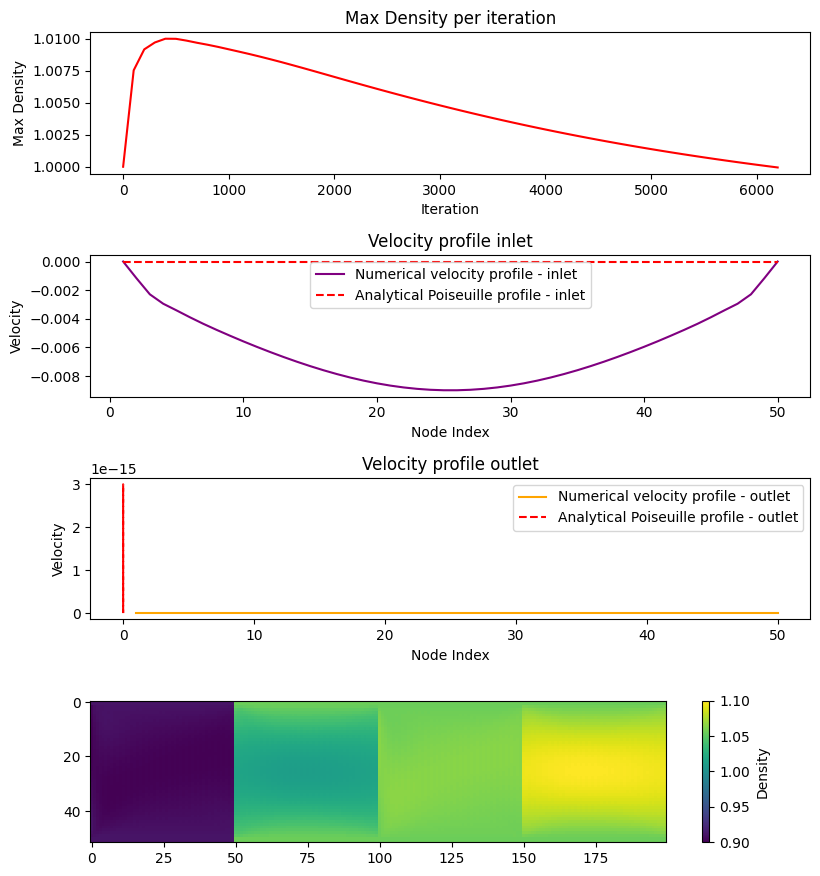

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

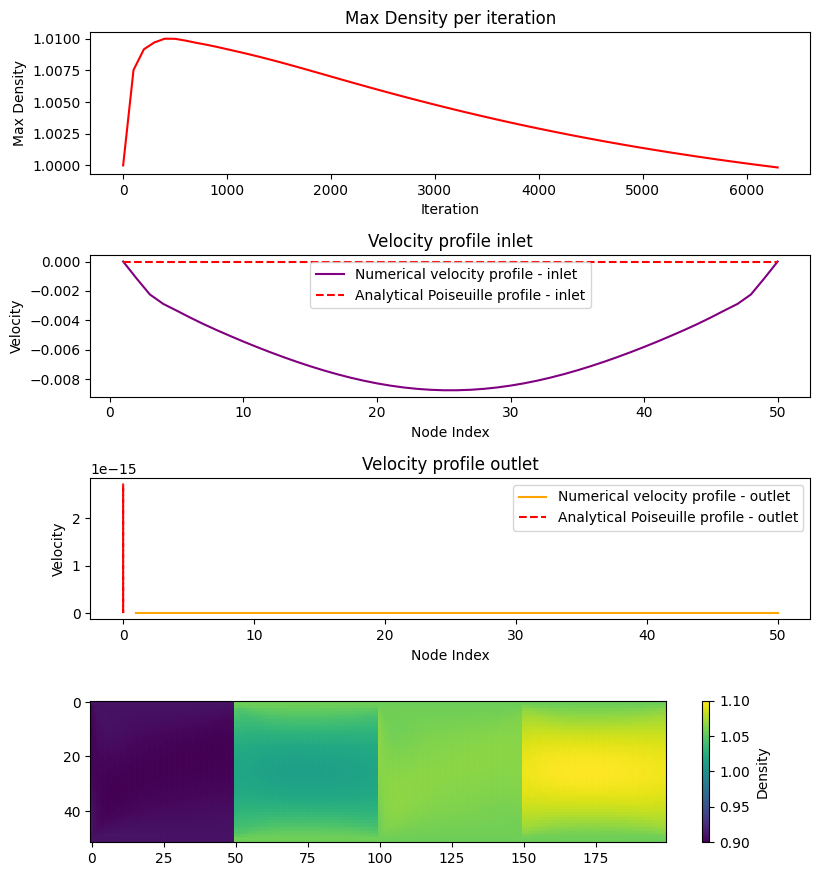

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

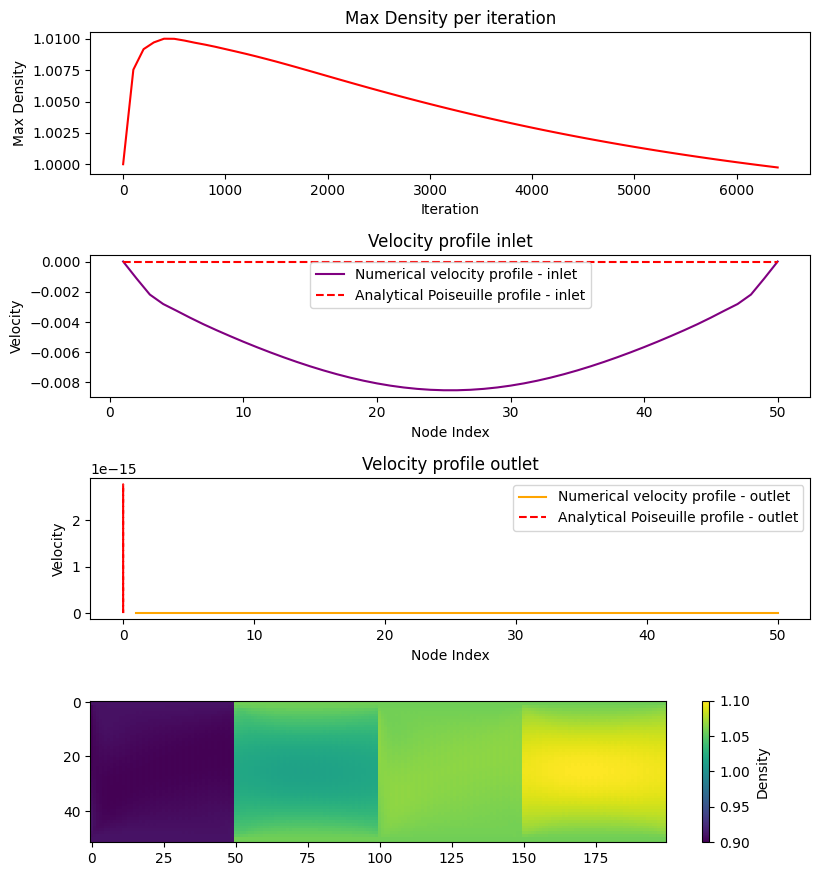

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

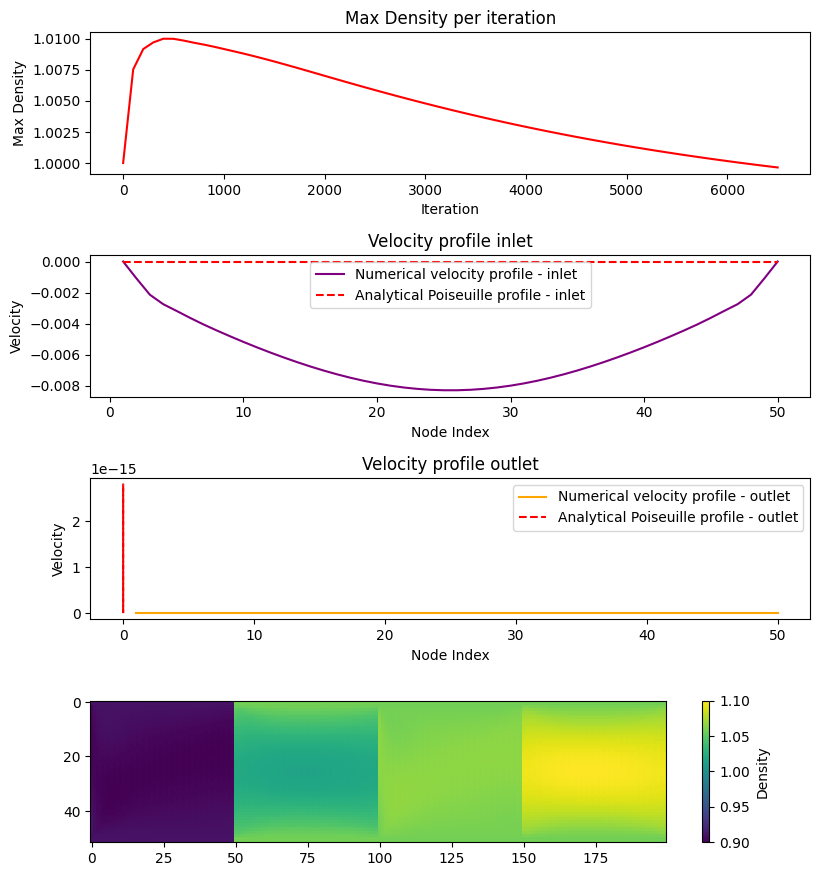

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

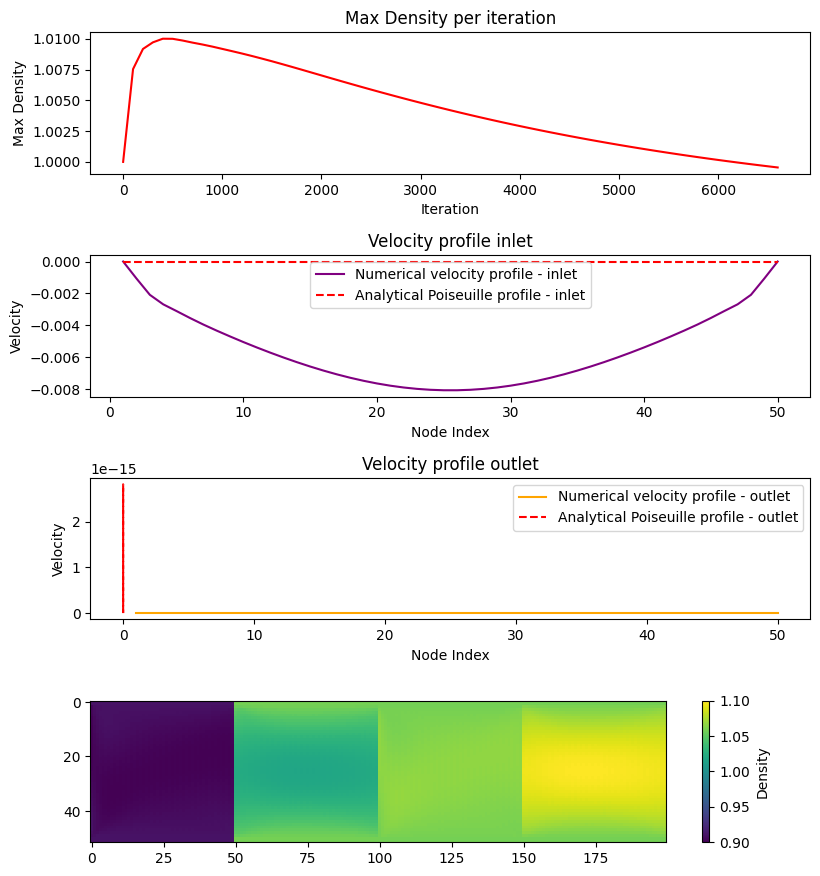

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

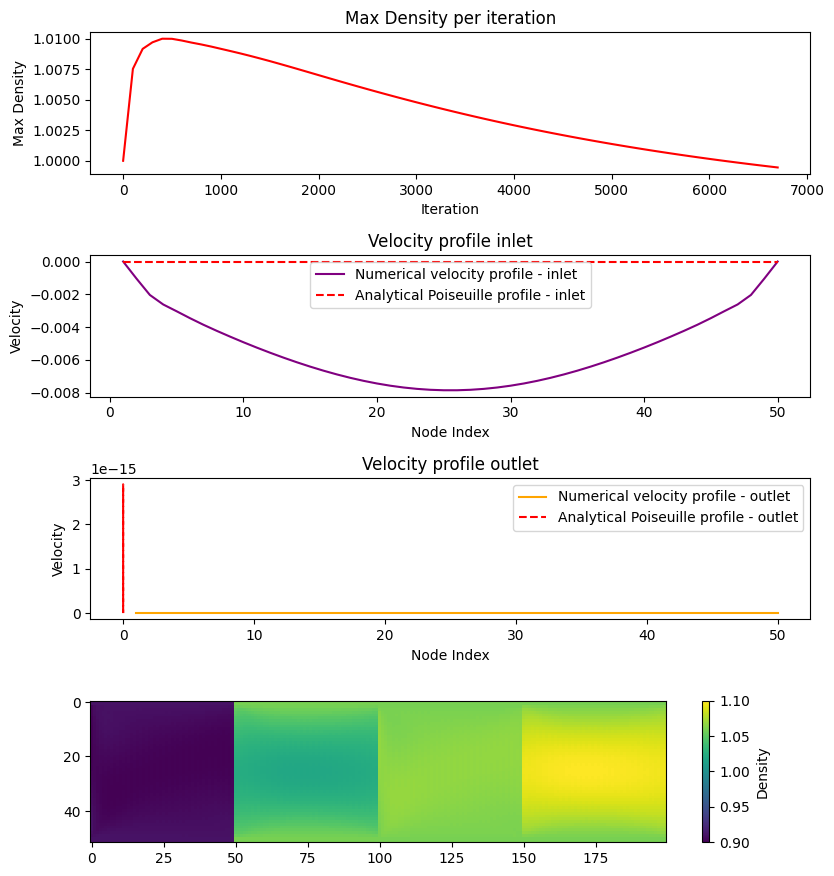

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

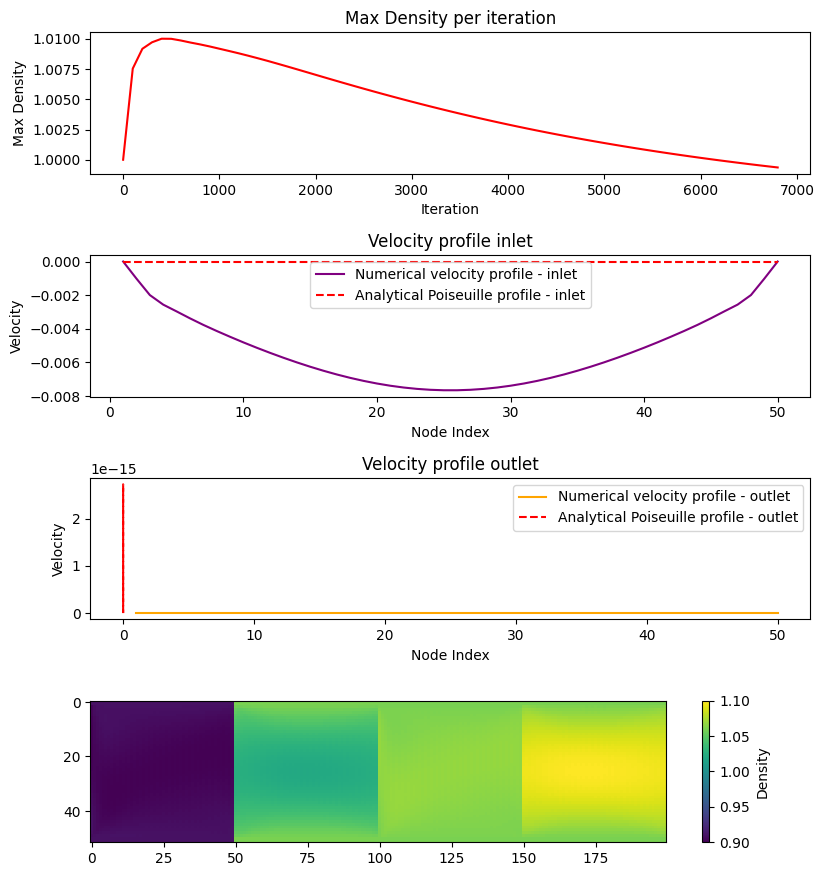

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

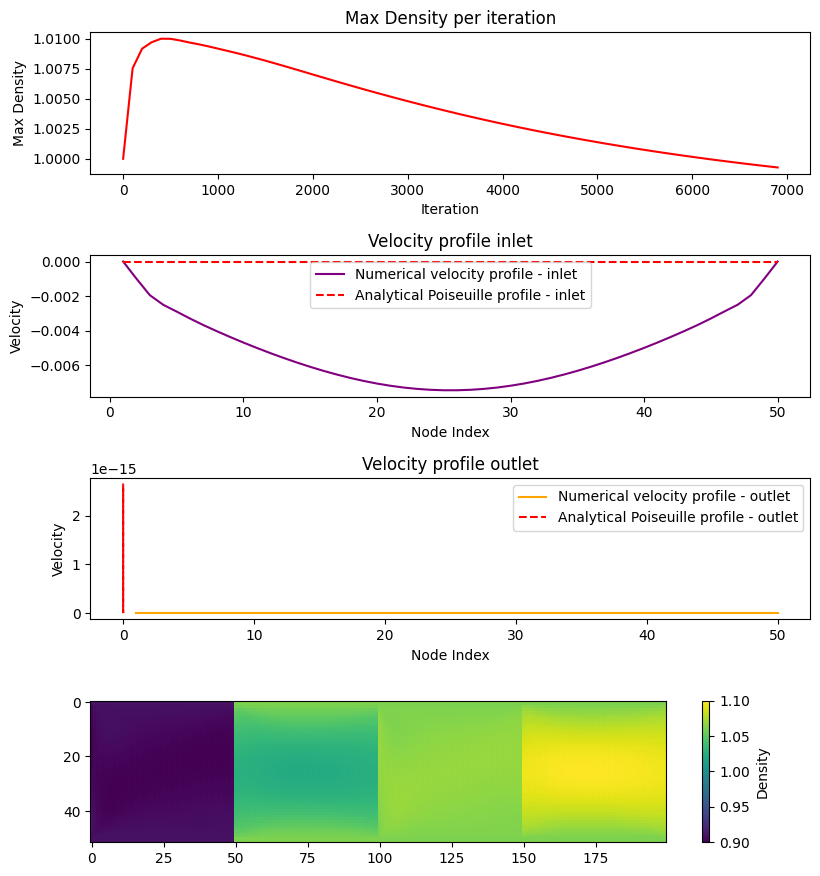

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

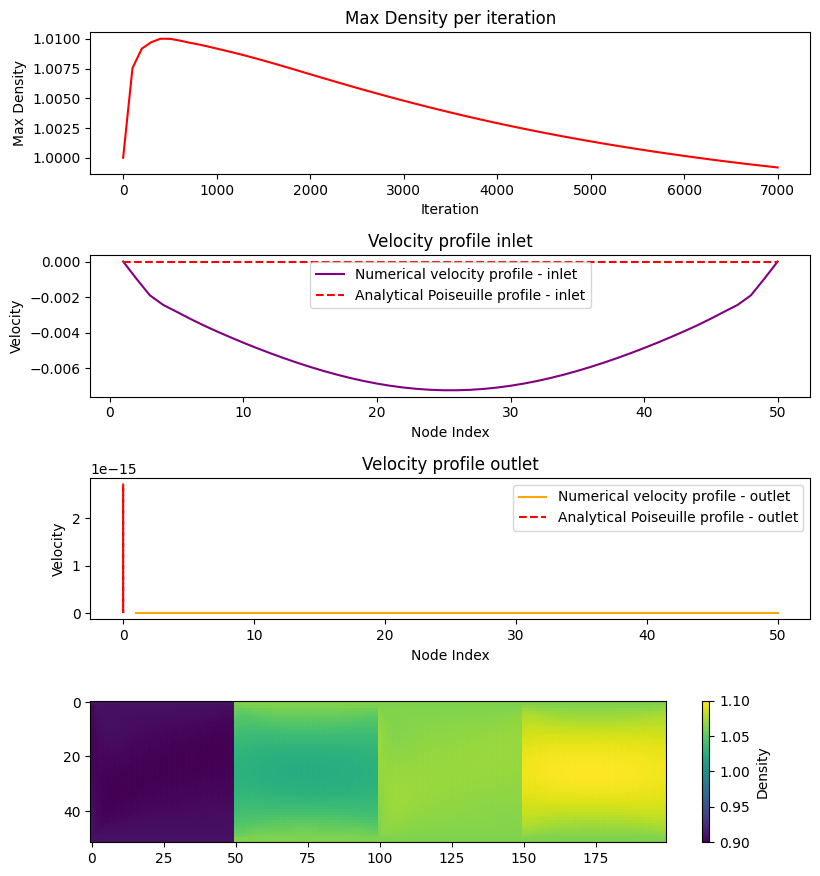

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

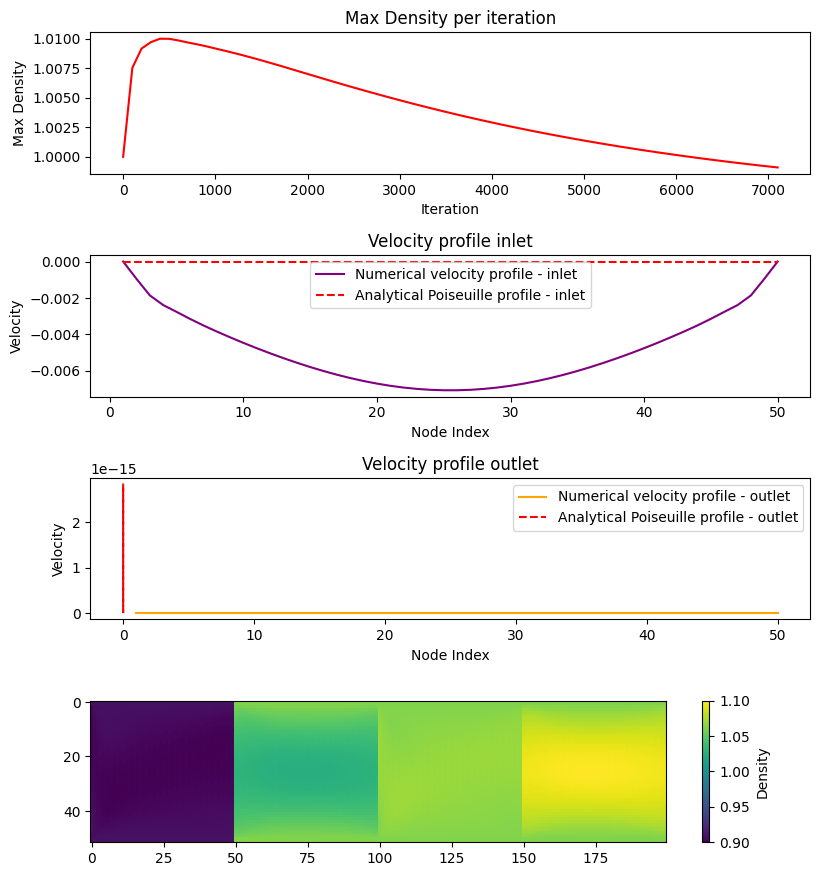

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

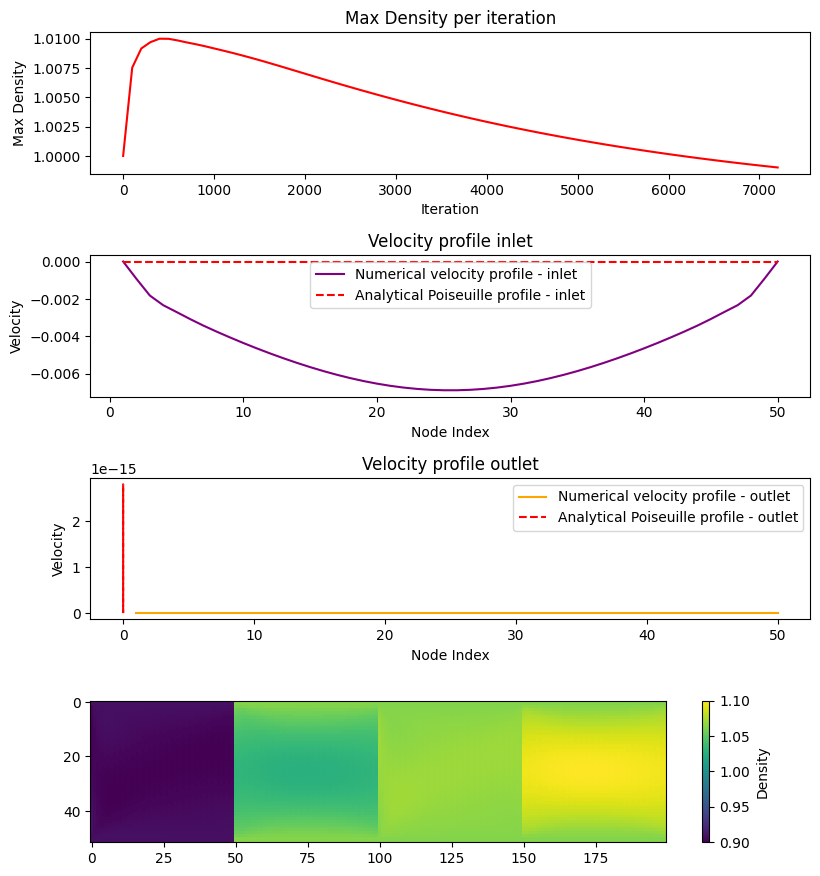

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

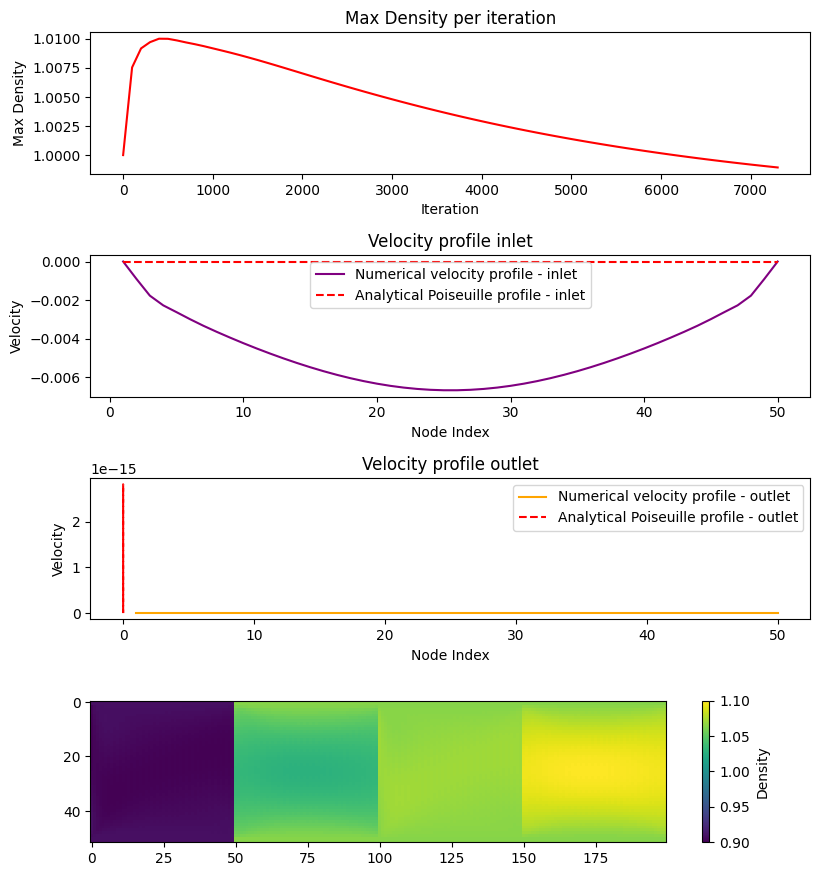

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

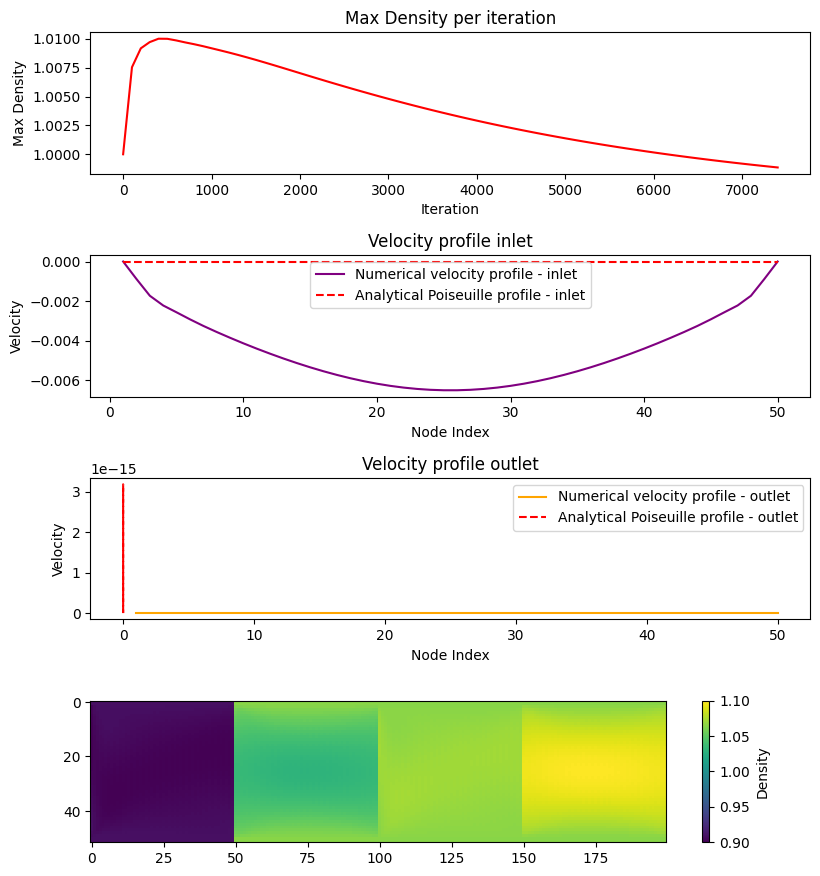

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

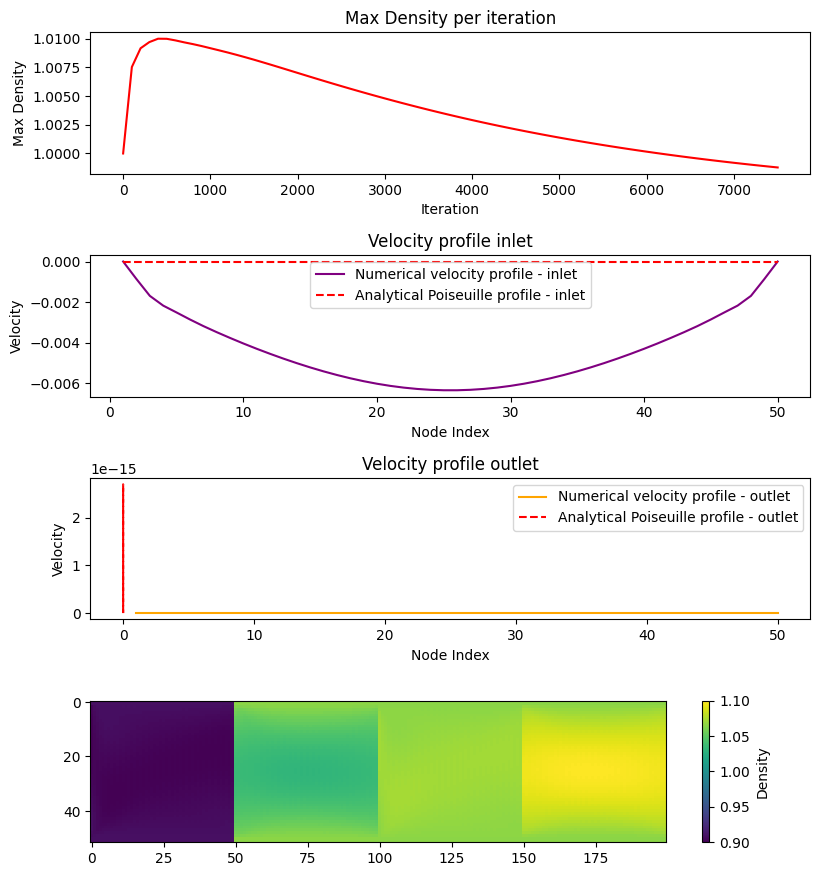

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

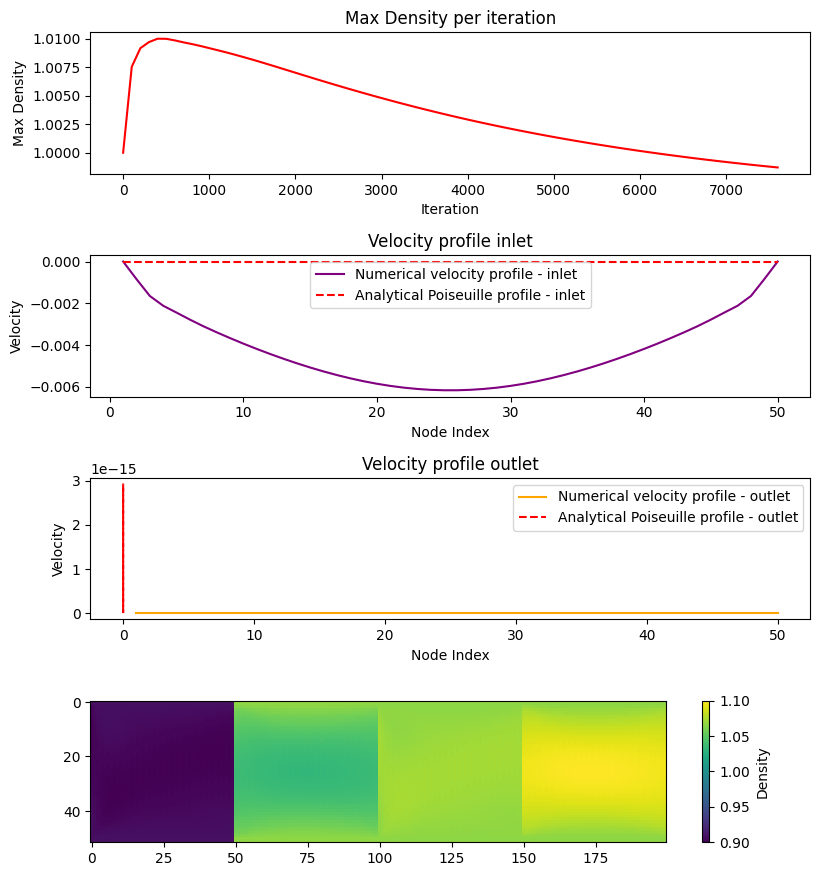

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

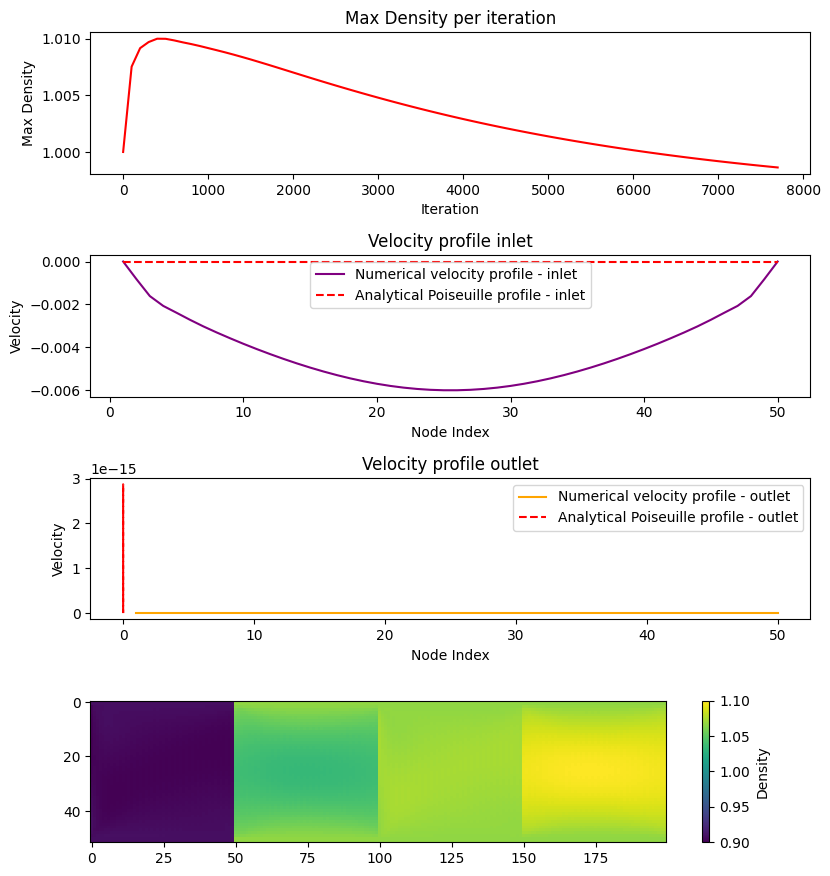

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

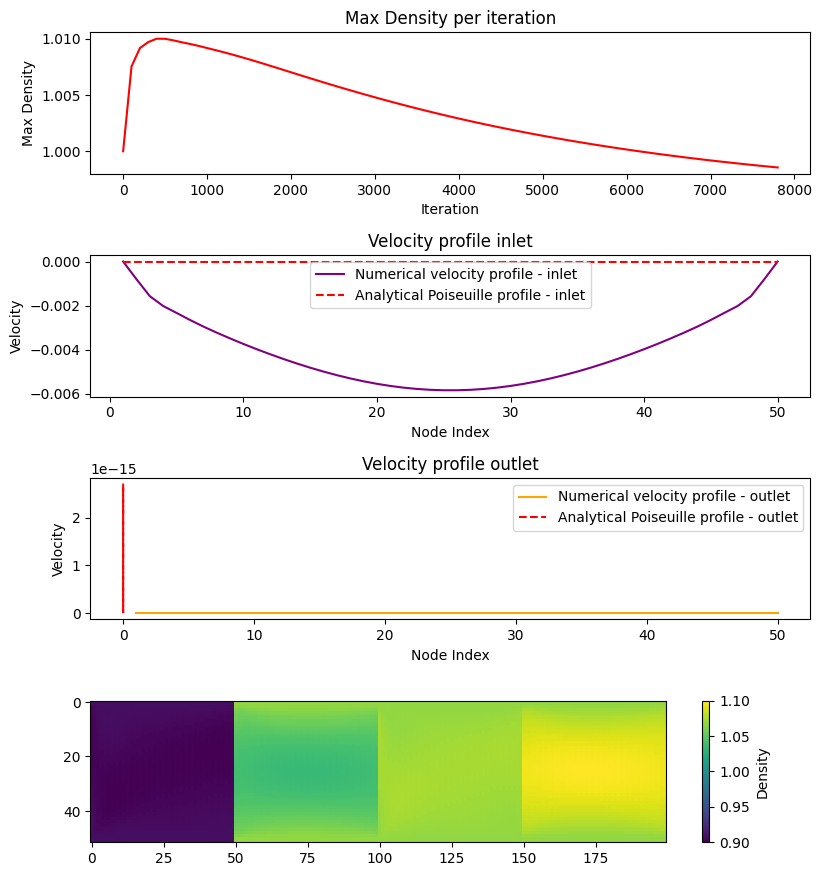

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

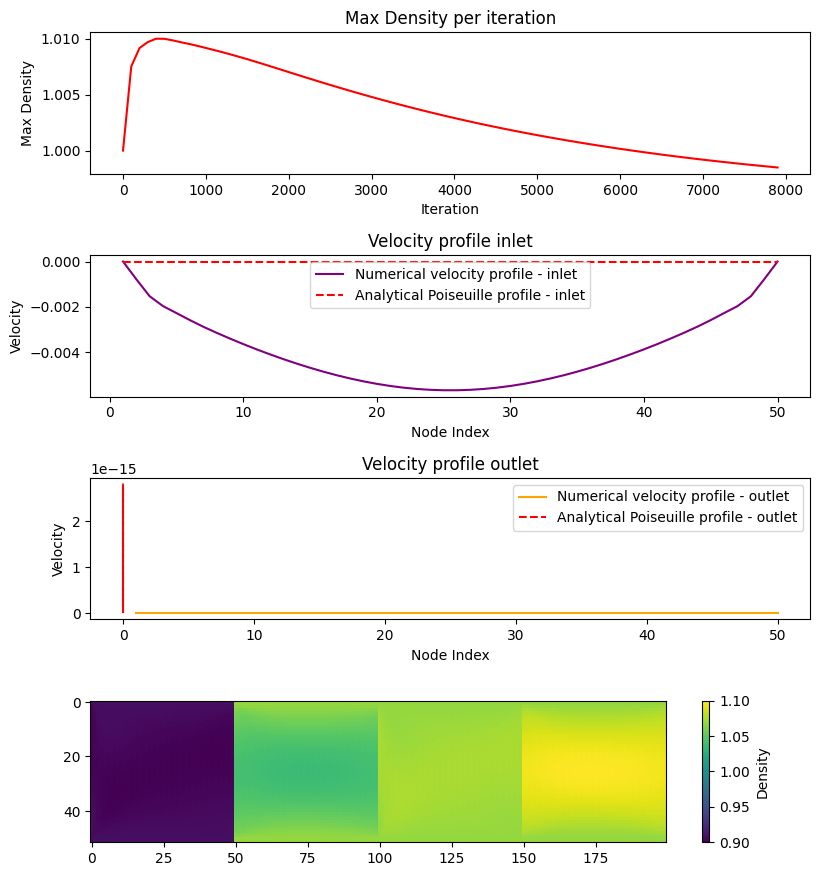

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

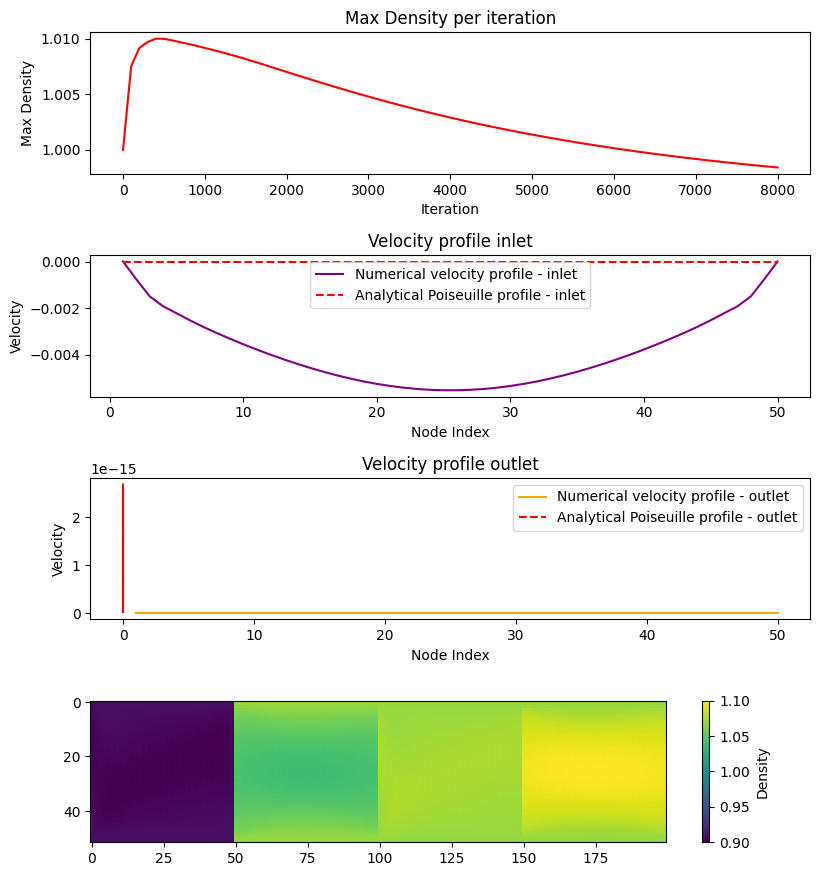

[output:0]

<Figure size 640x480 with 0 Axes>

[output:0]

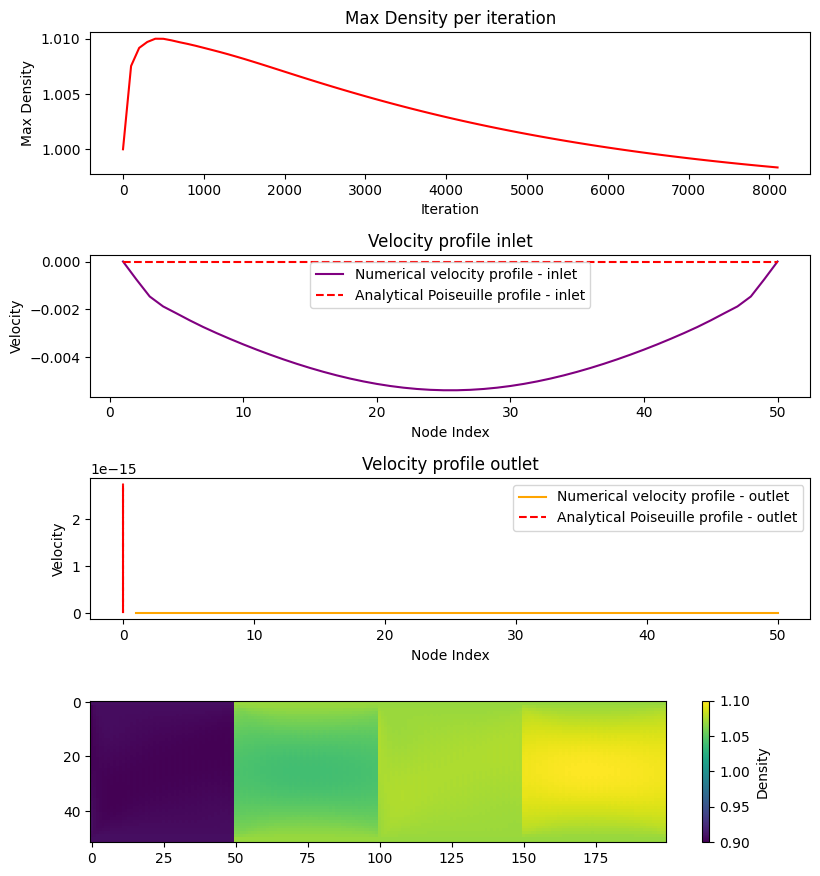

[output:0]

<Figure size 640x480 with 0 Axes>

In [ ]:
%%px

VERBOSE = False

#Xn=200
nlocal = Xn//size
if rank == size-1:
    nlocal = Xn - nlocal*(size-1)
nx1 = nlocal*rank
nx2 = nlocal*(rank+1)
if rank==size-1:
    nx2 = Xn
x = np.arange(nx1-1,nx2+1)
if VERBOSE:
    print("x: ")
    print(x)

#preliminary
#lattice for phase space; Nx+3 is due to periodic boundary conditions
#Nx is the number of divisions in the x-direction, thus there are Nx+3 points when including the extra nodes 0 and N+1 in x-direction
#lattice columns start with 0 and end with Nx+2, X(0) = X(0) and X(N+1) = X(Nx+2)

#initialise
#average velocity, cartesion x,y-directions, k is y-position, l is x-position
INIT_ROH = 1 #0.001

roh_in_k = np.full((Yn+2), roh_in, dtype=np.float32)
roh_out_k = np.full((Yn+2), roh_out, dtype=np.float32)

u_ckl = np.zeros((2, len(x), Yn+2), dtype=np.float32)    
roh = np.full((len(x), Yn+2), INIT_ROH, dtype=np.float32)

if rank == 0:
    roh[0,:] = roh_in_k    
elif rank == (size-1):    
    roh[-1,:] = roh_out_k    

pdf = f_eq_3D(roh, u_ckl)

# Simulation parameters
num_iterations = int(TOTAL_TIME / dt) + 1
num_nodes1 = Yn #int(D/dy) + 1  # Number of nodes in inlet/outlet
R = D / 2  # Radius of the pipe
num_nodes2 = columns_to_select

# Enable interactive mode
n = 10  # Update the graph every 10 iterations
plt.ion()
fig, ax = plt.subplots(4, 1, figsize=(8, 9))

scaled_x = None
if rank == 0:
    num_x_values = Xn+2 #roh.shape[0]
    x_all = np.linspace(0, L, num_x_values)  # Example of all possible x-values
    scaled_x = x_all[columns_to_select]  # Get true x-values for selected columns

if rank == 0:
    velocity_y_values = range(1, Yn+1)    
    
if VERBOSE:
    print("num_nodes1:")
    print(num_nodes1)
    print("velocity_y_values:")
    print(velocity_y_values)
if rank == 0:
    velocity_y_values4Poiseuille2D = get_adjusted_velocity_y_values4Poiseuille2D(num_nodes1, D)
    if VERBOSE:
        print("velocity_y_values4Poiseuille2D:")
        print(velocity_y_values4Poiseuille2D)

x_labels = [1, 2, 3, 10, 20, 50, Xn]
min_value = 0
density_max = 1.5

if rank == 0:
    # Initial plots
    max_density_plot, = ax[0].plot([], [], label="Max Density", color="red")
    full_density_plot, = ax[1].plot([], [], label="Full Density Plot", color="red")
    velocity_inlet_plot_in, = ax[2].plot([], [], label="Velocity inlet profile", color="purple")
    velocity_profile_plot_out, = ax[3].plot([], [], label="Velocity outlet profile", color="orange")
    
    
    # Set titles, labels, and legends
    ax[0].set_title("Max Density per iteration")
    ax[0].set_ylabel("Max Density")
    ax[0].set_xlabel("Iteration")
    ax[0].legend()
    
    ax[1].set_title("Velocity profile inlet")
    ax[1].set_ylabel("Velocity")
    ax[1].set_xlabel("Node Index")
    ax[1].legend()
    
    ax[2].set_title("Velocity profile outlet")
    ax[2].set_ylabel("Velocity")
    ax[2].set_xlabel("Node Index")
    ax[2].legend()
    
    X, Y = np.meshgrid(np.arange(0, Xn, 1), np.arange(0, Yn, 1))
    im = ax[3].imshow(roh.T, interpolation='nearest', origin="upper")
    cbar = fig.colorbar(im, ax=ax[3])
    cbar.set_label("Density")
    ax[3].set_xlabel("x axis")
    ax[3].set_ylabel("y axis")
    ax[3].set_aspect('auto')
    
    plt.tight_layout()

    iterations = []
    maxRoh = []

idt = None
if rank == 0:
    idt = int(TOTAL_TIME / dt) + 1  # Compute number of steps
else:
    idt = None
# Broadcast idt from rank 0 to all other ranks
idt = comm.bcast(idt, root=0)
# Generate the time range (each process gets the same range)
t_range = np.linspace(0, TOTAL_TIME, idt)

_roh_kN = None
_roh_k1 = None
u_cNl = None
u_c1l = None

VERBOSE1 = False

#while t < TOTAL_TIME:
for t in t_range:
    if VERBOSE1 and rank == 0:
        print("\n\nindex: {0} ------------------------------------------------".format(iteration))

    iteration = comm.bcast(iteration, root=0)        

    #1. moment update
    if iteration > 0:
        roh, u_ckl = updateMoments(pdf)

    # Get the maximum density and its location
    max_density = np.max(roh)
    max_location = np.unravel_index(np.argmax(roh), roh.shape)
    if np.any(roh > 1):
        if VERBOSE1 and rank == 0:
            print(f"Instability detected at iteration {iteration + 1}")
    if VERBOSE1 and rank == 0:
        print(f"Maximum density: {max_density} at location {max_location}")

    #2. compute equilibrium
    f_eq = f_eq_3D(roh, u_ckl)

    #3. collision term
    pdf = pdf * (1 - omega_nd) + omega_nd * f_eq
    del f_eq
    gc.collect()

    #4.1a Periodic Boundary conditions inlet/outlet with pressure difference
    if rank == 0:
        #u_ckl profile at inlet        
        u_c1l = u_ckl[:, 1, :]
        #update extra node layers 0 and N+1 -> A) & B) acc. to Script: Boundary Conditions for the Lattice Boltzmann Method        
        _roh_k1 = roh[1, :]          
    elif rank == (size-1):    
        #u_ckl profile at outlet
        #u_cNl = u_ckl[:, Xn, :]    
        u_cNl = u_ckl[:, -2, :]
        #update extra node layers 0 and N+1 -> A) & B) acc. to Script: Boundary Conditions for the Lattice Boltzmann Method        
        #_roh_kN = roh[Xn, :]
        _roh_kN = roh[-2, :]

    #assign inlet and outlet boundary values -> A)    
    fi_x0 = calcPeriodicBC(_roh_kN, u_cNl, roh_in_k, _roh_k1, u_c1l, roh_out_k, pdf)
    fi_xNplus1 = calcPeriodicBC(_roh_kN, u_cNl, roh_in_k, _roh_k1, u_c1l, roh_out_k, pdf)

    #5. stream lattice 
    #store pre-stream boundary top and bottom values
    _ltc_pre = pdf.copy()
    pdf = streamLattice(pdf)
    

    #4.2 Bounce-Back Top and Bottom
    pdf = bounceBackTopBottom0(pdf, _ltc_pre, index_mapping_top, index_mapping_bottom)
    del _ltc_pre
    gc.collect()

    #4.1b. assign inlet boundary values -> B)
    if rank == 0:
        pdf[:, 0, :] = fi_x0    
    elif rank == (size-1):    
        pdf[:, -1, :] = fi_xNplus1

    # Update plots
    if (iteration % 100) == 0:
        _pdf_full_range, _u_ckl_full_range = collect(iteration, pdf, u_ckl)

        _U = None
        if rank == 0:
            _U = np.max(_u_ckl_full_range[0, 1, :])
            velocity_y_values4Poiseuille2D = get_adjusted_velocity_y_values4Poiseuille2D(num_nodes1, D)
            if VERBOSE1: 
                print("velocity_y_values4Poiseuille2D: {}".format(len(velocity_y_values4Poiseuille2D)))
                print(velocity_y_values4Poiseuille2D)
            poiseuille_velocities_0 = np.array([Poiseuille2DUy2(y, _U, D) for y in velocity_y_values4Poiseuille2D])  # Get velocity profile
            if VERBOSE1: 
                print("poiseuille_velocities_0: {}".format(len(poiseuille_velocities_0)))
                print(poiseuille_velocities_0)            
            updatePlots(iteration, n, scaled_x, _pdf_full_range, _u_ckl_full_range, velocity_y_values4Poiseuille2D, poiseuille_velocities_0)
            
    #if rank == 0 and (iteration%100)==0:
    #    updatePlots(iteration, n, scaled_x, poiseuille_velocities_0, _pdf_full_range, _u_ckl_full_range)
    #if rank == 0 and (iteration%100)==0:
    #    _pdf_full_range, _u_ckl_full_range, velocity_y_values4Poiseuille2D, poiseuille_velocities_0 = collect(num_nodes1, D, pdf, u_ckl)
    #    plt.plot(velocity_y_values4Poiseuille2D, poiseuille_velocities_0, '-', label='$t={}$'.format(t))

    if rank == 0:
        #t += dt
        iteration += 1
    if VERBOSE1 and rank == 0:
        print(f"Simulation Execution -> TOTAL_TIME: {TOTAL_TIME}; t: {t}; %: {(t/TOTAL_TIME)*100.0}")
    gc.collect()

# Turn off interactive mode and display the final plot
plt.ioff()
plt.show()